In [2]:
import requests
from urllib.request import urlopen
from urllib.parse import urlencode,unquote,quote_plus
import urllib
import lxml
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import time
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

In [3]:
판례목록_df = pd.read_html("법령검색목록.html")
판례목록_df = 판례목록_df[0]
# # 판례목록_df = 판례목록_df[(판례목록_df["판결유형"] == "민사") | (판례목록_df["판결유형"] == "일반행정") | (판례목록_df["판결유형"] == "가사") | (판례목록_df["판결유형"] == "세무")]
판례목록_df = 판례목록_df[(판례목록_df["판결유형"] == "민사")]
# for i in 판례목록_df["판례ID"]:
#     print("https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID={}&type=HTML".format(i))
판례목록_df

순번    판례ID          제목   법원 사건유형 판결유형        선고일자
3          4  216807         대여금  대법원  대법원   민사  2021.06.30
4          5  216803     손해배상(기)  대법원  대법원   민사  2021.06.30
5          6  216801     손해배상(기)  대법원  대법원   민사  2021.06.30
6          7  216811    수수료등반환청구  대법원  대법원   민사  2021.06.30
9         10  216809      저작권침해등  대법원  대법원   민사  2021.06.30
...      ...     ...         ...  ...  ...  ...         ...
39991  39992  103548        판결경정  대법원  대법원   민사  1987.09.15
39992  39993  211021        판결경정  대법원  대법원   민사  1987.09.15
39994  39995  103542  가옥명도,유익비청구  대법원  대법원   민사  1987.09.08
39996  39997  103535        건물철거  대법원  대법원   민사  1987.09.08
39997  39998  103544       건물철거등  대법원  대법원   민사  1987.09.08

[17931 rows x 7 columns]

In [4]:
# # 2000년대의 마지막 index
# index = 0
# for idx,i in enumerate(판례목록_df["선고일자"]):
#     if i[0]!="2":
#         index = idx
#         break
# print(index)

In [5]:
판례목록_하등_df = pd.read_html("법령검색목록(1).html")
판례목록_하등_df = 판례목록_하등_df[0]
판례목록_하등_df = 판례목록_하등_df[(판례목록_하등_df["판결유형"] == "민사")]
판례목록_하등_df
for i in 판례목록_하등_df["판례ID"]:
    print("https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID={}&type=HTML".format(i))
판례목록_df

https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=158627&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=213639&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=214669&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=214663&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=217067&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=209262&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=202967&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=205424&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=207600&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=206164&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=209398&type=HTML
https://www.law.go.kr/DRF/lawSer

https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=69661&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=69647&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=69658&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=69545&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=69593&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=212361&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=212359&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=71711&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=212387&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=71643&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=71636&type=HTML
https://www.law.go.kr/DRF/lawService.do?

https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=171741&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=144157&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=144087&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=142989&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=158512&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=210641&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=194909&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=185853&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=184316&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=183314&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=183092&type=HTML
https://www.law.go.kr/DRF/lawSer

https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=138195&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=143178&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=159843&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=64855&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=143193&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=138883&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=64854&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=139667&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=137932&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=147645&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=158625&type=HTML
https://www.law.go.kr/DRF/lawServi

https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=74698&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=74699&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=74696&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=74693&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=74694&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=74692&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=74691&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=74690&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=74689&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=74686&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=74684&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=

https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=75620&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=75621&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=75618&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=211513&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=214609&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=213515&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=202990&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=206219&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=214825&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=202996&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=206399&type=HTML
https://www.law.go.kr/DRF/lawServic

https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=217159&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=217051&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=214475&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=217039&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=217139&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=213441&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=214723&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=213349&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=209647&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=213687&type=HTML
https://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=207171&type=HTML
https://www.law.go.kr/DRF/lawSer

순번    판례ID          제목   법원 사건유형 판결유형        선고일자
3          4  216807         대여금  대법원  대법원   민사  2021.06.30
4          5  216803     손해배상(기)  대법원  대법원   민사  2021.06.30
5          6  216801     손해배상(기)  대법원  대법원   민사  2021.06.30
6          7  216811    수수료등반환청구  대법원  대법원   민사  2021.06.30
9         10  216809      저작권침해등  대법원  대법원   민사  2021.06.30
...      ...     ...         ...  ...  ...  ...         ...
39991  39992  103548        판결경정  대법원  대법원   민사  1987.09.15
39992  39993  211021        판결경정  대법원  대법원   민사  1987.09.15
39994  39995  103542  가옥명도,유익비청구  대법원  대법원   민사  1987.09.08
39996  39997  103535        건물철거  대법원  대법원   민사  1987.09.08
39997  39998  103544       건물철거등  대법원  대법원   민사  1987.09.08

[17931 rows x 7 columns]

In [206]:
# # 2000년대의 마지막 index
# index = 0
# for idx,i in enumerate(판례목록_하등_df["선고일자"]):
#     if i[0]!="2":
#         index = idx
#         break
# print(index)

135


In [113]:
# set(판례목록_하등_df["판결유형"])
# 판례목록_하등_df = 판례목록_하등_df[(판례목록_하등_df["판결유형"] == "민사") | (판례목록_하등_df["판결유형"] == "일반행정") | (판례목록_하등_df["판결유형"] == "가사") | (판례목록_하등_df["판결유형"] == "세무")]
판례목록_하등_df = 판례목록_하등_df[(판례목록_하등_df["판결유형"] == "민사")]
판례목록_하등_df

순번    판례ID             제목      법원 사건유형 판결유형        선고일자
1          2  158627        손해배상(기)     대법원  하급심   민사  2011.01.27
25        26  213639        채무부존재확인  광주고등법원  하급심   민사  2020.07.23
26        27  214669     총회결의무효확인 등  광주고등법원  하급심   민사  2020.05.13
27        28  214663  조합장지위 부존재확인 등  광주고등법원  하급심   민사  2020.01.22
28        29  217067          부당이득금  광주고등법원  하급심   민사  2020.01.08
...      ...     ...            ...     ...  ...  ...         ...
23583  23584  186411       특허권침해금지등    특허법원  하급심   민사  2017.10.20
23585  23586  186155   상표권침해금지등청구의소    특허법원  하급심   민사  2017.09.29
23593  23594  185130        상표사용금지등    특허법원  하급심   민사  2017.04.06
23597  23598  184574        특허권등록말소    특허법원  하급심   민사  2017.02.07
23599  23600  209301    특허권침해금지청구의소    특허법원  하급심   민사  2017.01.20

[11372 rows x 7 columns]

In [3]:
# # 판례 XML 상세조회
# info = []
# def crawling_func(url):
#     global info
#     try:
#         response = requests.get(url)
#         response.raise_for_status()
#         soup = BeautifulSoup(response.content, 'lxml-xml') #lxml-xml -> lxml 추가 설치 필요(Beautifulsoup과 별도로 설치)
#         판례내용_sop = BeautifulSoup(soup.판례내용.get_text())
#         판례내용 = 판례내용_soup.get_text()
#         info.append([ID,판례내용])
#     except:
#         print(url,"오류발생, 재귀호출 시작")
#         time.sleep(1)
#         crawling_func(url)
#     finally:
#         return

# for idx,ID in enumerate(판례목록_df["판례ID"]):    
#     #기본 url
#     url = "http://www.law.go.kr/DRF/lawService.do?OC=bmsong&target=prec&ID={}&type=XML".format(ID)
#     crawling_func(url)
#     print(idx,ID)
    
# # info

/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 194 of the file /opt/anaconda3/lib/python3.8/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


0 216815
1 216821
2 216819
3 216807
4 216803
5 216801
6 216811
7 216813
8 216817
9 216809
10 216839
11 216841
12 216825
13 216831
14 217047
15 216835
16 216845
17 216843
18 216823
19 216833
20 216797
21 216865
22 216847
23 216855
24 216851
25 216849
26 216857
27 216853
28 216867
29 216861
30 216859
31 216863
32 216727
33 216659
34 216657
35 216683
36 216671
37 216673
38 216667
39 216663
40 216669
41 216675
42 216661
43 216681
44 216665
45 216677
46 216679
47 216685
48 216655
49 215855
50 215411
51 215415
52 215413
53 215417
54 215419
55 215427
56 215423
57 215425
58 215421
59 216689
60 215135
61 216981
62 215159
63 215147
64 215153
65 215155
66 215137
67 215139
68 215143
69 216983
70 215161
71 216985
72 215141
73 215157
74 215145
75 215149
76 215151
77 215165
78 215133
79 216789
80 214571
81 214577
82 216997
83 214583
84 214595
85 216993
86 214579
87 214593
88 214601
89 214603
90 214573
91 216987
92 216989
93 216999
94 214587
95 214589
96 216995
97 214581
98 214585
99 214599
100 214605

755 208407
756 208414
757 208403
758 208399
759 208415
760 208402
761 208400
762 208410
763 208405
764 208807
765 208413
766 208398
767 208397
768 208406
769 208401
770 208808
771 207526
772 207539
773 207527
774 207542
775 207532
776 207528
777 207538
778 207530
779 207531
780 207529
781 207541
782 207535
783 208809
784 207533
785 207534
786 207540
787 207536
788 207537
789 207543
790 207477
791 207480
792 207484
793 207487
794 207478
795 207486
796 207485
797 207481
798 207483
799 208810
800 207479
801 207482
802 207488
803 207493
804 207490
805 207491
806 207492
807 207489
808 207139
809 207143
810 207138
811 207140
812 207142
813 207141
814 207137
815 207144
816 207145
817 207146
818 207513
819 208811
820 207147
821 207109
822 207111
823 207119
824 207106
825 207120
826 207117
827 207112
828 207116
829 208412
830 207100
831 207095
832 207115
833 207102
834 207122
835 207476
836 208812
837 207107
838 206289
839 206293
840 206290
841 206292
842 206286
843 206294
844 206287
845 206291

1459 204886
1460 199864
1461 204885
1462 199853
1463 199849
1464 204589
1465 199845
1466 199850
1467 206107
1468 199736
1469 199847
1470 204590
1471 199848
1472 199854
1473 199733
1474 199858
1475 199855
1476 199734
1477 204592
1478 199869
1479 199867
1480 206111
1481 206109
1482 199872
1483 206110
1484 206108
1485 204595
1486 204594
1487 199870
1488 204593
1489 199871
1490 199873
1491 199865
1492 199866
1493 199868
1494 199874
1495 204596
1496 198836
1497 199875
1498 198832
1499 206113
1500 198844
1501 198734
1502 204603
1503 204598
1504 204600
1505 204601
1506 198834
1507 204891
1508 198733
1509 198831
1510 198833
1511 198842
1512 206115
1513 204888
1514 198841
1515 204777
1516 198840
1517 198830
1518 198837
1519 204892
1520 206112
1521 198848
1522 198829
1523 204889
1524 198838
1525 198845
1526 198846
1527 204776
1528 199876
1529 198732
1530 198843
1531 204599
1532 198828
1533 198835
1534 204887
1535 204890
1536 204602
1537 206114
1538 206132
1539 198847
1540 198839
1541 206116
1542

2143 197933
2144 185874
2145 185883
2146 197936
2147 185881
2148 185875
2149 185885
2150 195391
2151 197935
2152 185873
2153 197932
2154 195389
2155 188005
2156 185884
2157 188004
2158 185886
2159 197937
2160 185890
2161 197930
2162 185893
2163 185892
2164 197938
2165 185887
2166 185888
2167 185891
2168 185895
2169 185889
2170 185894
2171 199898
2172 185816
2173 185795
2174 199900
2175 185810
2176 197939
2177 185753
2178 199899
2179 185809
2180 185799
2181 185805
2182 193128
2183 197940
2184 195395
2185 185820
2186 185813
2187 185814
2188 197943
2189 197946
2190 185801
2191 185797
2192 199748
2193 185756
2194 185755
2195 185796
2196 185808
2197 192757
2198 197948
2199 195393
2200 197949
2201 195396
2202 197941
2203 185822
2204 185812
2205 188002
2206 197947
2207 185751
2208 197945
2209 195394
2210 197944
2211 185754
2212 188000
2213 197942
2214 199743
2215 185815
2216 185821
2217 185802
2218 197950
2219 185804
2220 195398
2221 195399
2222 185807
2223 199902
2224 185806
2225 185818
2226

2829 184614
2830 184238
2831 184243
2832 184932
2833 184611
2834 184933
2835 184239
2836 184937
2837 184235
2838 184936
2839 184935
2840 184245
2841 184233
2842 184244
2843 184242
2844 184931
2845 184934
2846 184613
2847 184237
2848 185031
2849 184240
2850 184234
2851 184232
2852 192733
2853 184246
2854 184615
2855 184092
2856 215857
2857 184093
2858 184099
2859 184113
2860 184102
2861 184106
2862 184116
2863 184839
2864 202151
2865 184107
2866 209189
2867 184112
2868 184838
2869 184837
2870 184100
2871 184096
2872 184103
2873 184115
2874 184094
2875 184105
2876 184098
2877 184097
2878 184111
2879 184108
2880 184104
2881 184110
2882 184109
2883 184095
2884 184785
2885 183965
2886 184780
2887 183955
2888 187953
2889 183951
2890 183952
2891 187951
2892 183964
2893 184540
2894 183963
2895 183960
2896 184776
2897 183959
2898 184543
2899 183957
2900 184778
2901 187955
2902 183961
2903 184539
2904 184541
2905 183953
2906 184544
2907 184538
2908 184542
2909 184786
2910 184777
2911 184783
2912

3515 183307
3516 180374
3517 182862
3518 182867
3519 182074
3520 182874
3521 194875
3522 182869
3523 184074
3524 182348
3525 182868
3526 182873
3527 182072
3528 182347
3529 182865
3530 182430
3531 182863
3532 182864
3533 182071
3534 182875
3535 182073
3536 182429
3537 182870
3538 182872
3539 187770
3540 209181
3541 209225
3542 180328
3543 181221
3544 181217
3545 180330
3546 181216
3547 187766
3548 180322
3549 181224
3550 180319
3551 180318
3552 180316
3553 180329
3554 187767
3555 181218
3556 180317
3557 180333
3558 182075
3559 182431
3560 180331
3561 181223
3562 187765
3563 180312
3564 181222
3565 180321
3566 182077
3567 182432
3568 180323
3569 180320
3570 180315
3571 180332
3572 180325
3573 180324
3574 184398
3575 182076
3576 187764
3577 180311
3578 180239
3579 181215
3580 180247
3581 180238
3582 182434
3583 180252
3584 181213
3585 181212
3586 180240
3587 187762
3588 180245
3589 180253
3590 182411
3591 182436
3592 182435
3593 180242
3594 182081
3595 180250
3596 182415
3597 187758
3598

4199 178128
4200 178135
4201 178138
4202 180179
4203 180181
4204 179080
4205 178141
4206 180182
4207 178112
4208 179097
4209 180043
4210 180041
4211 178113
4212 178129
4213 178140
4214 179096
4215 180183
4216 178118
4217 179081
4218 179094
4219 178114
4220 179091
4221 179078
4222 179095
4223 178126
4224 178123
4225 178137
4226 179991
4227 179083
4228 179098
4229 178132
4230 178125
4231 179077
4232 180180
4233 178119
4234 180175
4235 178117
4236 178131
4237 178121
4238 178116
4239 178136
4240 180178
4241 178079
4242 178080
4243 187661
4244 179093
4245 180038
4246 179076
4247 178074
4248 180177
4249 178081
4250 179092
4251 178071
4252 178073
4253 178075
4254 178072
4255 180040
4256 179070
4257 178078
4258 187664
4259 178076
4260 209141
4261 178077
4262 180039
4263 180174
4264 179069
4265 178016
4266 178013
4267 179073
4268 187660
4269 179060
4270 178024
4271 180173
4272 180222
4273 178022
4274 192555
4275 180217
4276 178014
4277 178026
4278 179061
4279 178020
4280 178018
4281 178021
4282

4883 175407
4884 175410
4885 178717
4886 177431
4887 177451
4888 177440
4889 175417
4890 177432
4891 175408
4892 187493
4893 177410
4894 177429
4895 175413
4896 175406
4897 175392
4898 175393
4899 177442
4900 175391
4901 175394
4902 175439
4903 177441
4904 175399
4905 177436
4906 177439
4907 177452
4908 175436
4909 175411
4910 175395
4911 187494
4912 175457
4913 175438
4914 175409
4915 175403
4916 175402
4917 177435
4918 178695
4919 175405
4920 175396
4921 175414
4922 187495
4923 175431
4924 178718
4925 177434
4926 177454
4927 175432
4928 177430
4929 176519
4930 175416
4931 175418
4932 177437
4933 175398
4934 178720
4935 175433
4936 178697
4937 177453
4938 175435
4939 177421
4940 175324
4941 175342
4942 193192
4943 175340
4944 178696
4945 175341
4946 175361
4947 175338
4948 175352
4949 178694
4950 178715
4951 175336
4952 175351
4953 177457
4954 177446
4955 175371
4956 175330
4957 177445
4958 178719
4959 175350
4960 175325
4961 177448
4962 177450
4963 175337
4964 175322
4965 177472
4966

5569 177479
5570 177464
5571 177486
5572 177482
5573 187456
5574 172713
5575 193188
5576 177333
5577 172715
5578 172731
5579 172732
5580 172742
5581 177488
5582 172722
5583 177331
5584 172733
5585 172740
5586 172800
5587 172734
5588 177325
5589 172738
5590 172739
5591 177460
5592 177320
5593 172711
5594 177323
5595 172714
5596 177462
5597 177463
5598 177324
5599 177318
5600 172750
5601 187457
5602 177321
5603 177317
5604 177316
5605 177475
5606 172723
5607 177322
5608 193187
5609 172746
5610 172741
5611 172724
5612 172720
5613 177489
5614 172716
5615 172754
5616 172753
5617 177465
5618 205603
5619 177466
5620 205584
5621 172685
5622 193185
5623 205598
5624 174846
5625 205582
5626 205580
5627 205581
5628 172704
5629 174847
5630 172679
5631 172680
5632 176218
5633 176228
5634 205578
5635 205588
5636 215167
5637 172682
5638 174845
5639 176255
5640 205579
5641 205595
5642 174842
5643 174841
5644 205589
5645 176220
5646 205591
5647 205585
5648 176227
5649 176226
5650 176253
5651 176254
5652

6252 172371
6253 172500
6254 192208
6255 170956
6256 170953
6257 172498
6258 172497
6259 171139
6260 171143
6261 172415
6262 171930
6263 171934
6264 192189
6265 170964
6266 171933
6267 170962
6268 171144
6269 170963
6270 192186
6271 170951
6272 170965
6273 171929
6274 171931
6275 171142
6276 171932
6277 172416
6278 171141
6279 170961
6280 170959
6281 171151
6282 192185
6283 172411
6284 172412
6285 172414
6286 170960
6287 172413
6288 171138
6289 172501
6290 170900
6291 170901
6292 172417
6293 170874
6294 170881
6295 170884
6296 171936
6297 172502
6298 172418
6299 192164
6300 172429
6301 172424
6302 172004
6303 172422
6304 172423
6305 171937
6306 172592
6307 170879
6308 170897
6309 172003
6310 171939
6311 172421
6312 170882
6313 172001
6314 172006
6315 170898
6316 172005
6317 171940
6318 170876
6319 171938
6320 171941
6321 172002
6322 170875
6323 170899
6324 170906
6325 170885
6326 172425
6327 170886
6328 172420
6329 170883
6330 170887
6331 192137
6332 172428
6333 172419
6334 172426
6335

6937 193171
6938 167494
6939 170715
6940 170698
6941 170705
6942 167436
6943 170696
6944 167439
6945 170712
6946 170700
6947 170699
6948 167479
6949 170701
6950 170695
6951 170697
6952 167438
6953 212107
6954 170702
6955 170711
6956 170708
6957 170731
6958 170714
6959 170704
6960 167472
6961 167478
6962 167491
6963 170707
6964 167477
6965 167434
6966 167578
6967 167492
6968 192833
6969 170405
6970 192834
6971 170389
6972 170406
6973 166986
6974 192805
6975 170414
6976 166978
6977 170399
6978 170349
6979 166932
6980 166941
6981 170398
6982 170415
6983 170376
6984 166983
6985 166982
6986 170400
6987 170370
6988 166934
6989 170413
6990 170390
6991 166977
6992 170387
6993 170403
6994 202167
6995 170687
6996 166976
6997 166985
6998 170388
6999 192836
7000 170412
7001 170386
7002 167891
7003 166980
7004 166990
7005 166988
7006 166981
7007 166984
7008 170375
7009 170397
7010 166987
7011 170369
7012 167192
7013 166931
7014 192837
7015 170367
7016 170366
7017 170368
7018 166979
7019 168153
7020

7621 163871
7622 167266
7623 167270
7624 163895
7625 163896
7626 163912
7627 163877
7628 163906
7629 186647
7630 166775
7631 164311
7632 166773
7633 163730
7634 163736
7635 163732
7636 166769
7637 186651
7638 163734
7639 166770
7640 166746
7641 163726
7642 163727
7643 186643
7644 166801
7645 163735
7646 186645
7647 166799
7648 166872
7649 166796
7650 186646
7651 166797
7652 166798
7653 163740
7654 163739
7655 166780
7656 186644
7657 163733
7658 163737
7659 166774
7660 166771
7661 186650
7662 163729
7663 186649
7664 166800
7665 166777
7666 163738
7667 186648
7668 166776
7669 166772
7670 186642
7671 166779
7672 166733
7673 163731
7674 163562
7675 166778
7676 163557
7677 163499
7678 163560
7679 167081
7680 167076
7681 163563
7682 163495
7683 167073
7684 163518
7685 167074
7686 167072
7687 163522
7688 167071
7689 193754
7690 163569
7691 167079
7692 167055
7693 163549
7694 167080
7695 167051
7696 163548
7697 167053
7698 163537
7699 165008
7700 163530
7701 163534
7702 163572
7703 167078
7704

8305 161071
8306 162245
8307 158067
8308 162480
8309 158082
8310 158092
8311 162419
8312 158096
8313 158066
8314 162283
8315 158084
8316 162448
8317 158093
8318 162528
8319 158078
8320 158068
8321 193745
8322 158081
8323 162303
8324 162415
8325 162309
8326 158085
8327 162557
8328 158076
8329 162288
8330 162243
8331 157709
8332 157811
8333 157698
8334 161728
8335 157668
8336 161737
8337 157678
8338 161676
8339 157679
8340 157681
8341 157707
8342 157676
8343 157657
8344 157688
8345 157685
8346 157687
8347 157669
8348 157696
8349 157666
8350 161519
8351 193744
8352 157672
8353 157684
8354 161732
8355 161517
8356 192354
8357 161717
8358 161677
8359 161678
8360 157647
8361 157643
8362 157670
8363 157648
8364 157691
8365 161734
8366 157675
8367 157649
8368 161725
8369 157677
8370 157680
8371 157831
8372 161735
8373 157697
8374 157642
8375 161736
8376 165054
8377 157695
8378 157686
8379 161679
8380 161727
8381 161726
8382 157694
8383 157644
8384 161738
8385 161739
8386 157710
8387 157650
8388

8988 149182
8989 157296
8990 148846
8991 157313
8992 148844
8993 148843
8994 148878
8995 148881
8996 148839
8997 148845
8998 157314
8999 148882
9000 148886
9001 157223
9002 157311
9003 157290
9004 148841
9005 157250
9006 157294
9007 148880
9008 148879
9009 193725
9010 148877
9011 148884
9012 157222
9013 157289
9014 157249
9015 157251
9016 148855
9017 148842
9018 157617
9019 148840
9020 157293
9021 157265
9022 148141
9023 157237
9024 148157
9025 148162
9026 148166
9027 157266
9028 148156
9029 148164
9030 157213
9031 148143
9032 158156
9033 148160
9034 148142
9035 157232
9036 157310
9037 157276
9038 148159
9039 148138
9040 148158
9041 157239
9042 157277
9043 148139
9044 157231
9045 157234
9046 157233
9047 157211
9048 148165
9049 157267
9050 157212
9051 148154
9052 157278
9053 157235
9054 148155
9055 148168
9056 157236
9057 157268
9058 157279
9059 148161
9060 148163
9061 157624
9062 157598
9063 148225
9064 157288
9065 157238
9066 148232
9067 157214
9068 157292
9069 157221
9070 157216
9071

9672 144858
9673 146236
9674 144859
9675 146238
9676 145250
9677 144865
9678 146230
9679 144854
9680 144862
9681 146228
9682 144855
9683 145267
9684 146991
9685 146235
9686 146245
9687 144850
9688 144868
9689 144867
9690 144853
9691 146243
9692 146242
9693 144857
9694 146241
9695 146231
9696 146232
9697 146233
9698 144846
9699 147008
9700 144698
9701 146254
9702 146255
9703 145251
9704 146258
9705 144703
9706 146246
9707 146260
9708 144708
9709 144713
9710 144714
9711 144716
9712 146262
9713 144710
9714 146250
9715 146212
9716 144693
9717 144712
9718 144697
9719 144692
9720 146249
9721 144702
9722 144691
9723 144694
9724 146261
9725 144704
9726 144685
9727 144686
9728 144707
9729 146211
9730 146256
9731 146248
9732 144715
9733 146252
9734 146253
9735 144706
9736 144695
9737 146263
9738 147078
9739 144711
9740 146251
9741 144709
9742 144687
9743 144701
9744 144690
9745 144700
9746 144688
9747 144696
9748 146213
9749 146259
9750 144699
9751 146244
9752 145729
9753 144444
9754 144542
9755

10330 192312
10331 144530
10332 215453
10333 144511
10334 144531
10335 215529
10336 144507
10337 215545
10338 215533
10339 143636
10340 193690
10341 143623
10342 143622
10343 143644
10344 143628
10345 215539
10346 215573
10347 143630
10348 142080
10349 215613
10350 215595
10351 162218
10352 143625
10353 143634
10354 143637
10355 215535
10356 143631
10357 215537
10358 166765
10359 143649
10360 143639
10361 143647
10362 143632
10363 143643
10364 142085
10365 142086
10366 215621
10367 143633
10368 143617
10369 215605
10370 143635
10371 215641
10372 215583
10373 215543
10374 193691
10375 143641
10376 215549
10377 143645
10378 143642
10379 143638
10380 215541
10381 143629
10382 160932
10383 215547
10384 143626
10385 143627
10386 215569
10387 215531
10388 149631
10389 143618
10390 143624
10391 143704
10392 215651
10393 193686
10394 143660
10395 143662
10396 143663
10397 143661
10398 143659
10399 143673
10400 143668
10401 215751
10402 215745
10403 143675
10404 215591
10405 215643
10406 143676

10961 141725
10962 141733
10963 141736
10964 138672
10965 142109
10966 142105
10967 138638
10968 141734
10969 142098
10970 141741
10971 141739
10972 141750
10973 138636
10974 142110
10975 142112
10976 138435
10977 138483
10978 146456
10979 138128
10980 138137
10981 141729
10982 138151
10983 141755
10984 138134
10985 141707
10986 141709
10987 141730
10988 141759
10989 141723
10990 141720
10991 141761
10992 141722
10993 138143
10994 138132
10995 138133
10996 141721
10997 138155
10998 140047
10999 140067
11000 140048
11001 138389
11002 141758
11003 138144
11004 138145
11005 141719
11006 141715
11007 138135
11008 141404
11009 138138
11010 138425
11011 138391
11012 138146
11013 138424
11014 138126
11015 141708
11016 138390
11017 138149
11018 138150
11019 138130
11020 192689
11021 138127
11022 138427
11023 141727
11024 138140
11025 141717
11026 141762
11027 138426
11028 138148
11029 141718
11030 141716
11031 138139
11032 138136
11033 138157
11034 138124
11035 138152
11036 141763
11037 141728

11594 142127
11595 127787
11596 192036
11597 140464
11598 127774
11599 134180
11600 134183
11601 134279
11602 125866
11603 134182
11604 134204
11605 125877
11606 134211
11607 134280
11608 129612
11609 126028
11610 125996
11611 134207
11612 164492
11613 134203
11614 140185
11615 134209
11616 138543
11617 125868
11618 125899
11619 134208
11620 134181
11621 134186
11622 134205
11623 150191
11624 192728
11625 125997
11626 134261
11627 126036
11628 125991
11629 134184
11630 134210
11631 134281
11632 125992
11633 134262
11634 134260
11635 125905
11636 125994
11637 134263
11638 134212
11639 134185
11640 125995
11641 126060
11642 134206
11643 125864
11644 125910
11645 136361
11646 136379
11647 125309
11648 133433
11649 133434
11650 133471
11651 133466
11652 193675
11653 133437
11654 133468
11655 125317
11656 125322
11657 125326
11658 125323
11659 125328
11660 145284
11661 133463
11662 125327
11663 133462
11664 133440
11665 133438
11666 125302
11667 125320
11668 125312
11669 133460
11670 125307

12241 64797
12242 191991
12243 64961
12244 64954
12245 64944
12246 85793
12247 64946
12248 85791
12249 136121
12250 64953
12251 85797
12252 64934
12253 64955
12254 64956
12255 64957
12256 64959
12257 64958
12258 64932
12259 64942
12260 85802
12261 65075
12262 85800
12263 64781
12264 85801
12265 64963
12266 64933
12267 64962
12268 64949
12269 64950
12270 64951
12271 64941
12272 151611
12273 64947
12274 85792
12275 85795
12276 64943
12277 64945
12278 85794
12279 64964
12280 85799
12281 64936
12282 136120
12283 64948
12284 161111
12285 64960
12286 85805
12287 64966
12288 64952
12289 85804
12290 125182
12291 85808
12292 85807
12293 64914
12294 85771
12295 64791
12296 85803
12297 64637
12298 64790
12299 64789
12300 85789
12301 193668
12302 64920
12303 64922
12304 85778
12305 85772
12306 64921
12307 85777
12308 85769
12309 64924
12310 85784
12311 85780
12312 85783
12313 64917
12314 64919
12315 85776
12316 64908
12317 64916
12318 85774
12319 85773
12320 64900
12321 64923
12322 85788
12323 649

12919 69256
12920 69257
12921 69247
12922 85554
12923 85534
12924 85551
12925 69235
12926 85538
12927 69248
12928 85552
12929 85548
12930 69262
12931 69251
12932 85547
12933 69259
12934 69233
12935 69363
12936 69222
12937 126150
12938 85522
12939 69229
12940 69232
12941 85525
12942 85518
12943 85531
12944 69214
12945 85516
12946 69213
12947 69209
12948 69211
12949 85514
12950 69210
12951 69218
12952 69221
12953 69216
12954 126087
12955 85530
12956 69212
12957 69231
12958 69217
12959 85524
12960 69215
12961 192025
12962 85515
12963 69230
12964 69315
12965 69208
12966 69228
12967 193650
12968 69207
12969 85527
12970 69205
12971 69206
12972 192008
12973 69219
12974 85523
12975 85511
12976 69224
12977 85529
12978 85528
12979 85521
12980 85526
12981 69225
12982 69226
12983 69204
12984 69227
12985 69203
12986 85533
12987 85520
12988 69223
12989 85517
12990 69190
12991 69195
12992 85502
12993 85495
12994 85496
12995 85509
12996 69202
12997 69200
12998 69198
12999 69194
13000 85497
13001 69201

13596 68883
13597 85251
13598 85250
13599 148851
13600 68865
13601 85237
13602 68859
13603 68871
13604 68875
13605 68872
13606 68857
13607 216333
13608 68860
13609 194143
13610 68874
13611 85239
13612 85246
13613 68868
13614 216321
13615 68867
13616 68877
13617 216339
13618 216329
13619 85242
13620 85245
13621 216335
13622 85244
13623 85231
13624 216337
13625 68878
13626 85243
13627 68858
13628 216327
13629 85227
13630 216331
13631 216323
13632 216325
13633 68856
13634 68861
13635 68855
13636 85241
13637 68869
13638 194142
13639 85240
13640 216341
13641 68864
13642 68866
13643 68873
13644 68876
13645 68870
13646 68886
13647 216343
13648 68854
13649 68831
13650 68853
13651 216355
13652 68844
13653 216351
13654 68845
13655 68840
13656 85211
13657 194140
13658 216353
13659 68830
13660 68833
13661 68832
13662 68837
13663 68846
13664 68843
13665 68842
13666 68852
13667 68835
13668 68839
13669 145348
13670 68823
13671 166186
13672 68836
13673 210371
13674 68829
13675 68827
13676 68838
13677 

14274 194119
14275 84938
14276 68436
14277 84934
14278 84939
14279 68446
14280 68445
14281 84925
14282 68433
14283 68439
14284 68438
14285 84936
14286 68428
14287 68442
14288 84930
14289 194120
14290 84931
14291 68444
14292 68434
14293 84935
14294 84923
14295 68424
14296 68427
14297 84927
14298 68432
14299 68426
14300 68425
14301 68447
14302 194122
14303 84932
14304 194121
14305 68435
14306 84937
14307 68443
14308 126705
14309 68441
14310 68422
14311 159675
14312 68421
14313 194118
14314 68403
14315 84909
14316 68423
14317 84908
14318 68408
14319 194116
14320 68420
14321 68402
14322 68419
14323 68418
14324 84921
14325 68398
14326 84920
14327 68413
14328 194112
14329 84919
14330 84916
14331 68414
14332 68412
14333 194113
14334 84911
14335 68397
14336 84905
14337 68410
14338 68411
14339 84918
14340 191966
14341 68401
14342 68417
14343 84917
14344 68405
14345 68400
14346 68395
14347 68394
14348 84902
14349 84904
14350 68393
14351 84900
14352 68404
14353 68406
14354 194117
14355 68399
1435

14942 68059
14943 68061
14944 84595
14945 68077
14946 193996
14947 84573
14948 68060
14949 84594
14950 68071
14951 84593
14952 84592
14953 68074
14954 84572
14955 166936
14956 68076
14957 84584
14958 68073
14959 84585
14960 68075
14961 68057
14962 68064
14963 194001
14964 68072
14965 177831
14966 127160
14967 126207
14968 84562
14969 193995
14970 68055
14971 68054
14972 84561
14973 84559
14974 84566
14975 68045
14976 84560
14977 68053
14978 68046
14979 68037
14980 145661
14981 68048
14982 84558
14983 68050
14984 193994
14985 68052
14986 84570
14987 84555
14988 68044
14989 84557
14990 84568
14991 68047
14992 84571
14993 209196
14994 84553
14995 84556
14996 84569
14997 68051
14998 84540
14999 68035
15000 193993
15001 68041
15002 84542
15003 68040
15004 84552
15005 84550
15006 68039
15007 68036
15008 68043
15009 84551
15010 68034
15011 68033
15012 84534
15013 84538
15014 193992
15015 68038
15016 145311
15017 68042
15018 193991
15019 215905
15020 202164
15021 68030
15022 215907
15023 68015

15612 84103
15613 84119
15614 84104
15615 67764
15616 193887
15617 84105
15618 193888
15619 84130
15620 193895
15621 193882
15622 84096
15623 67743
15624 67744
15625 67750
15626 84090
15627 84098
15628 67758
15629 84099
15630 67760
15631 84100
15632 67745
15633 67759
15634 67747
15635 84097
15636 84095
15637 67755
15638 67741
15639 67742
15640 193880
15641 126731
15642 193881
15643 67754
15644 67756
15645 67739
15646 67757
15647 67738
15648 84087
15649 67749
15650 67737
15651 67736
15652 67740
15653 84089
15654 84080
15655 193885
15656 193884
15657 67733
15658 84078
15659 84088
15660 67735
15661 67752
15662 67748
15663 67734
15664 193878
15665 193879
15666 193877
15667 67746
15668 67751
15669 193883
15670 84094
15671 84093
15672 67753
15673 67772
15674 67726
15675 67708
15676 67714
15677 84060
15678 67728
15679 67716
15680 84072
15681 67725
15682 67730
15683 193872
15684 193870
15685 84054
15686 67722
15687 67729
15688 84059
15689 84076
15690 193876
15691 84074
15692 67713
15693 67723


16283 83703
16284 83716
16285 83701
16286 83711
16287 67487
16288 67489
16289 67488
16290 67484
16291 83710
16292 67490
16293 83715
16294 83709
16295 127129
16296 83693
16297 67483
16298 67474
16299 83683
16300 67473
16301 83776
16302 67500
16303 67472
16304 191934
16305 67478
16306 67479
16307 83694
16308 67480
16309 83680
16310 67471
16311 83685
16312 83687
16313 83692
16314 83691
16315 83684
16316 67482
16317 83688
16318 83670
16319 83664
16320 83662
16321 83661
16322 83660
16323 67477
16324 67468
16325 83667
16326 83663
16327 83668
16328 127243
16329 67493
16330 67492
16331 67475
16332 67476
16333 83665
16334 83654
16335 67467
16336 83656
16337 83651
16338 83653
16339 67469
16340 83666
16341 83655
16342 67470
16343 83652
16344 83644
16345 83642
16346 83646
16347 67466
16348 83643
16349 148271
16350 152231
16351 153011
16352 147312
16353 83627
16354 67459
16355 83629
16356 83628
16357 83641
16358 83632
16359 67461
16360 67462
16361 67463
16362 83633
16363 67460
16364 83640
16365 836

16963 83218
16964 67402
16965 83220
16966 83219
16967 67418
16968 83229
16969 67413
16970 67419
16971 83215
16972 67412
16973 209169
16974 83227
16975 83225
16976 83230
16977 67414
16978 67396
16979 67407
16980 126651
16981 83212
16982 127021
16983 67409
16984 67411
16985 67408
16986 67417
16987 83213
16988 67410
16989 83237
16990 83228
16991 83217
16992 83214
16993 67406
16994 83235
16995 83234
16996 83209
16997 67395
16998 83211
16999 67404
17000 83210
17001 133579
17002 83233
17003 67405
17004 67415
17005 83208
17006 67416
17007 126172
17008 127086
17009 190062
17010 83206
17011 83189
17012 67242
17013 83188
17014 83207
17015 209791
17016 83192
17017 83191
17018 83259
17019 83238
17020 209855
17021 209875
17022 67239
17023 209753
17024 67236
17025 83196
17026 83197
17027 83187
17028 83201
17029 83193
17030 83184
17031 83186
17032 83183
17033 209711
17034 83185
17035 83190
17036 83195
17037 83205
17038 67241
17039 67235
17040 67240
17041 67234
17042 83204
17043 83194
17044 83203
1704

17631 82740
17632 82739
17633 194488
17634 194491
17635 194489
17636 194493
17637 82729
17638 82741
17639 194494
17640 126537
17641 126519
17642 194487
17643 82735
17644 194490
17645 67112
17646 194495
17647 82724
17648 82715
17649 82721
17650 209737
17651 194344
17652 194498
17653 194499
17654 194502
17655 194501
17656 209739
17657 82704
17658 82713
17659 209869
17660 67108
17661 126518
17662 82723
17663 194497
17664 82722
17665 209813
17666 194500
17667 194503
17668 194343
17669 194496
17670 126495
17671 194507
17672 194504
17673 194506
17674 82709
17675 194508
17676 82697
17677 194505
17678 82719
17679 82693
17680 194510
17681 82692
17682 209839
17683 82681
17684 194345
17685 82691
17686 209821
17687 194515
17688 209861
17689 194511
17690 82688
17691 82678
17692 194512
17693 194346
17694 126559
17695 82677
17696 194509
17697 209819
17698 194514
17699 82675
17700 82690
17701 82689
17702 191882
17703 194513
17704 82718
17705 194516
17706 194518
17707 82687
17708 126486
17709 82682
177

18283 82175
18284 194419
18285 82178
18286 82100
18287 194370
18288 82121
18289 194752
18290 82125
18291 194399
18292 82108
18293 82110
18294 126312
18295 194751
18296 194750
18297 194422
18298 194755
18299 194749
18300 194754
18301 82124
18302 194753
18303 126282
18304 82120
18305 82114
18306 82101
18307 194759
18308 194767
18309 82119
18310 82113
18311 82116
18312 194770
18313 82106
18314 194766
18315 194758
18316 194375
18317 194763
18318 194760
18319 194765
18320 82157
18321 194411
18322 194768
18323 194764
18324 194757
18325 194771
18326 82082
18327 82104
18328 194756
18329 82091
18330 194761
18331 194762
18332 82118
18333 82117
18334 194769
18335 194772
18336 194773
18337 82080
18338 194781
18339 82059
18340 194775
18341 82055
18342 82079
18343 82062
18344 194416
18345 194423
18346 194776
18347 194424
18348 82064
18349 82065
18350 68269
18351 82046
18352 82031
18353 82034
18354 194786
18355 82057
18356 194372
18357 194371
18358 82063
18359 82078
18360 194777
18361 82049
18362 194

18957 81459
18958 81483
18959 81492
18960 191865
18961 81457
18962 81482
18963 145663
18964 81458
18965 81475
18966 81651
18967 81456
18968 81424
18969 81429
18970 81452
18971 81449
18972 81427
18973 81438
18974 81411
18975 81413
18976 191863
18977 81441
18978 191864
18979 81415
18980 81450
18981 130680
18982 81440
18983 81418
18984 81453
18985 81426
18986 81434
18987 81421
18988 81437
18989 81414
18990 81410
18991 81409
18992 81417
18993 81436
18994 81435
18995 81447
18996 81419
18997 81422
18998 81451
18999 81431
19000 81416
19001 81448
19002 81439
19003 81423
19004 81432
19005 81425
19006 81430
19007 81491
19008 81444
19009 81428
19010 81406
19011 81408
19012 145334
19013 81445
19014 81433
19015 81407
19016 81446
19017 141664
19018 81405
19019 81372
19020 81379
19021 81378
19022 81385
19023 81384
19024 81381
19025 81389
19026 81396
19027 81375
19028 81403
19029 81382
19030 81383
19031 81373
19032 145341
19033 81380
19034 191862
19035 81392
19036 81388
19037 81386
19038 81391
19039 8

19618 191606
19619 200575
19620 141687
19621 191593
19622 191586
19623 191577
19624 191584
19625 191580
19626 80833
19627 191600
19628 191682
19629 191583
19630 191578
19631 191581
19632 191587
19633 80837
19634 191582
19635 191585
19636 191579
19637 80836
19638 80817
19639 80803
19640 191594
19641 80835
19642 191610
19643 191565
19644 191573
19645 191563
19646 191566
19647 191576
19648 191575
19649 80797
19650 191570
19651 191574
19652 191569
19653 80770
19654 191561
19655 191557
19656 191558
19657 191568
19658 80798
19659 80766
19660 191556
19661 80774
19662 80773
19663 191560
19664 191564
19665 191562
19666 80783
19667 80796
19668 191567
19669 191559
19670 191554
19671 80784
19672 191571
19673 80795
19674 191555
19675 191552
19676 191572
19677 80793
19678 80760
19679 80761
19680 191553
19681 191550
19682 191551
19683 80794
19684 191609
19685 191540
19686 80756
19687 80743
19688 191536
19689 191547
19690 191546
19691 191533
19692 191534
19693 80749
19694 191542
19695 191543
19696 807

20266 80195
20267 191129
20268 191142
20269 191127
20270 80216
20271 191140
20272 80258
20273 80192
20274 80191
20275 191110
20276 191111
20277 191112
20278 191121
20279 191122
20280 80189
20281 191108
20282 191109
20283 80190
20284 80187
20285 191119
20286 80159
20287 80169
20288 80160
20289 191106
20290 191118
20291 191123
20292 191124
20293 80186
20294 191104
20295 191116
20296 191101
20297 191103
20298 191105
20299 80166
20300 80163
20301 191107
20302 191113
20303 191120
20304 191102
20305 191117
20306 145327
20307 80188
20308 191099
20309 80157
20310 191084
20311 191083
20312 80138
20313 191089
20314 191090
20315 191096
20316 191085
20317 80175
20318 191087
20319 191086
20320 191098
20321 80156
20322 191078
20323 191073
20324 191071
20325 191074
20326 191081
20327 191080
20328 80132
20329 80123
20330 191072
20331 80125
20332 191070
20333 191069
20334 191097
20335 191091
20336 191076
20337 80154
20338 191075
20339 191095
20340 191094
20341 191082
20342 80155
20343 191088
20344 8013

20914 190669
20915 79561
20916 79574
20917 190667
20918 190684
20919 79571
20920 190665
20921 79570
20922 79552
20923 190682
20924 190664
20925 190668
20926 190694
20927 190663
20928 79573
20929 79533
20930 190666
20931 190690
20932 79572
20933 79525
20934 190662
20935 190661
20936 190653
20937 190648
20938 190650
20939 190651
20940 190652
20941 79505
20942 190645
20943 79523
20944 79499
20945 190649
20946 190647
20947 190639
20948 190658
20949 190654
20950 79522
20951 79495
20952 190636
20953 79500
20954 190641
20955 190637
20956 79494
20957 190644
20958 190659
20959 190643
20960 190638
20961 190660
20962 190656
20963 190642
20964 190640
20965 190646
20966 79521
20967 145595
20968 79524
20969 79551
20970 190635
20971 79486
20972 190605
20973 190607
20974 190608
20975 190606
20976 190609
20977 79515
20978 79520
20979 190596
20980 190592
20981 190604
20982 190578
20983 190577
20984 79445
20985 79448
20986 79476
20987 190579
20988 190576
20989 79475
20990 159572
20991 79478
20992 79441
2

21559 192243
21560 192242
21561 192235
21562 192223
21563 118115
21564 192244
21565 192247
21566 118099
21567 192224
21568 192234
21569 192225
21570 118080
21571 118085
21572 192217
21573 192222
21574 192220
21575 192245
21576 192239
21577 118086
21578 192221
21579 118098
21580 192226
21581 192246
21582 118116
21583 118118
21584 118119
21585 192238
21586 192218
21587 118117
21588 192216
21589 192190
21590 192187
21591 118114
21592 192183
21593 192204
21594 118063
21595 118064
21596 192178
21597 192181
21598 192179
21599 192180
21600 118039
21601 192188
21602 192182
21603 192205
21604 118065
21605 192215
21606 192194
21607 192193
21608 192176
21609 118059
21610 192175
21611 118061
21612 192170
21613 192172
21614 118013
21615 192163
21616 192166
21617 192168
21618 118048
21619 192197
21620 192196
21621 192202
21622 192200
21623 118044
21624 192192
21625 118022
21626 192173
21627 118012
21628 118032
21629 192174
21630 118019
21631 118014
21632 192165
21633 118025
21634 118018
21635 192169

22190 195170
22191 117476
22192 117472
22193 117493
22194 117467
22195 195169
22196 211239
22197 195172
22198 117465
22199 195171
22200 211093
22201 117578
22202 195180
22203 117492
22204 117491
22205 211269
22206 211095
22207 195176
22208 194944
22209 211193
22210 211199
22211 194943
22212 117460
22213 117480
22214 195174
22215 117477
22216 211211
22217 117455
22218 211157
22219 195177
22220 195173
22221 195179
22222 195175
22223 195178
22224 211233
22225 117459
22226 211259
22227 117487
22228 117484
22229 211097
22230 117474
22231 195182
22232 195183
22233 211179
22234 195181
22235 117454
22236 195184
22237 192081
22238 195187
22239 195186
22240 195185
22241 117448
22242 117441
22243 195189
22244 117440
22245 117427
22246 211099
22247 117447
22248 195191
22249 195193
22250 211169
22251 192080
22252 117424
22253 194945
22254 195192
22255 117422
22256 195188
22257 117434
22258 117439
22259 211101
22260 117433
22261 195190
22262 194985
22263 117421
22264 211161
22265 117414
22266 117432

22823 196177
22824 196197
22825 116876
22826 196175
22827 196182
22828 116862
22829 196184
22830 116854
22831 116851
22832 196180
22833 196179
22834 116859
22835 196181
22836 116883
22837 196200
22838 196202
22839 196198
22840 196194
22841 116917
22842 144346
22843 196201
22844 196199
22845 196196
22846 116884
22847 116858
22848 196203
22849 196195
22850 196178
22851 116900
22852 116899
22853 196190
22854 196192
22855 116897
22856 196204
22857 196218
22858 196216
22859 116833
22860 116828
22861 196215
22862 196219
22863 196217
22864 116834
22865 142123
22866 116823
22867 196212
22868 116849
22869 196214
22870 196210
22871 196206
22872 196208
22873 196213
22874 116818
22875 196211
22876 196209
22877 116837
22878 196207
22879 116820
22880 196205
22881 202228
22882 116842
22883 196220
22884 116847
22885 196226
22886 196227
22887 196221
22888 116846
22889 192045
22890 196223
22891 196222
22892 196225
22893 116809
22894 116830
22895 116845
22896 196228
22897 196224
22898 116844
22899 116805

23455 196038
23456 196037
23457 116253
23458 116289
23459 196113
23460 116258
23461 196039
23462 196066
23463 196094
23464 116288
23465 196068
23466 196058
23467 196054
23468 149251
23469 116251
23470 196041
23471 196064
23472 196108
23473 116237
23474 196044
23475 196079
23476 196122
23477 116220
23478 196115
23479 116239
23480 116210
23481 211231
23482 196045
23483 196093
23484 116229
23485 196047
23486 116223
23487 196100
23488 196107
23489 196042
23490 116232
23491 116242
23492 116204
23493 211139
23494 196101
23495 196040
23496 196124
23497 196119
23498 196082
23499 116233
23500 211135
23501 196069
23502 196106
23503 196114
23504 211137
23505 196043
23506 116225
23507 196048
23508 196111
23509 196123
23510 196117
23511 196120
23512 196099
23513 116206
23514 116236
23515 116207
23516 116205
23517 211241
23518 116249
23519 196104
23520 196076
23521 196078
23522 196046
23523 192038
23524 211245
23525 116219
23526 196051
23527 196052
23528 116184
23529 196091
23530 116214
23531 196050

24088 115597
24089 196923
24090 115595
24091 115596
24092 196925
24093 196935
24094 196934
24095 115655
24096 196922
24097 196932
24098 134371
24099 196936
24100 115653
24101 196931
24102 196930
24103 115621
24104 196929
24105 196937
24106 196938
24107 115738
24108 196949
24109 196942
24110 196939
24111 196947
24112 115636
24113 115649
24114 115650
24115 115638
24116 196946
24117 115652
24118 196945
24119 196948
24120 196943
24121 196954
24122 196953
24123 196944
24124 196950
24125 115651
24126 196952
24127 196951
24128 196940
24129 196941
24130 196970
24131 115616
24132 115615
24133 196965
24134 196960
24135 115647
24136 196959
24137 196958
24138 115648
24139 115634
24140 115646
24141 196956
24142 202221
24143 196961
24144 196962
24145 196957
24146 196964
24147 196963
24148 115578
24149 196969
24150 115645
24151 115582
24152 115606
24153 196967
24154 196966
24155 115644
24156 196968
24157 115632
24158 196955
24159 84816
24160 196528
24161 125423
24162 196988
24163 115549
24164 115548


24720 115040
24721 115027
24722 115031
24723 115030
24724 115049
24725 115042
24726 115043
24727 115037
24728 115053
24729 115048
24730 115054
24731 115021
24732 114996
24733 114989
24734 115045
24735 114990
24736 114995
24737 114997
24738 115044
24739 115035
24740 114994
24741 115026
24742 115000
24743 114999
24744 114993
24745 114988
24746 115036
24747 115046
24748 115032
24749 115033
24750 115034
24751 115024
24752 114998
24753 115023
24754 115025
24755 114992
24756 114991
24757 115055
24758 114984
24759 114983
24760 127939
24761 114955
24762 114953
24763 114954
24764 114976
24765 114943
24766 114938
24767 114940
24768 114978
24769 114974
24770 114931
24771 114959
24772 114937
24773 114939
24774 114979
24775 114981
24776 114945
24777 114942
24778 114933
24779 114935
24780 114946
24781 114941
24782 114969
24783 114973
24784 114980
24785 114960
24786 114961
24787 114949
24788 114930
24789 114963
24790 114970
24791 114968
24792 114972
24793 114971
24794 114958
24795 114964
24796 114936

25352 197218
25353 197223
25354 114419
25355 114422
25356 114395
25357 114396
25358 114406
25359 114385
25360 197222
25361 114420
25362 114421
25363 197235
25364 197236
25365 197233
25366 114373
25367 197237
25368 197224
25369 197234
25370 114417
25371 114410
25372 114416
25373 197225
25374 114402
25375 197232
25376 197229
25377 197227
25378 197240
25379 197228
25380 197238
25381 197241
25382 197239
25383 197226
25384 197231
25385 197230
25386 114418
25387 114358
25388 114331
25389 197259
25390 197258
25391 197250
25392 114357
25393 114359
25394 197254
25395 197252
25396 114354
25397 114355
25398 114362
25399 197243
25400 114360
25401 186634
25402 197247
25403 197242
25404 197255
25405 197251
25406 114315
25407 197246
25408 114322
25409 114361
25410 197257
25411 197245
25412 197265
25413 197266
25414 197261
25415 197263
25416 114338
25417 197244
25418 197253
25419 197260
25420 114312
25421 197249
25422 114341
25423 197264
25424 197256
25425 197262
25426 114325
25427 197248
25428 114324

25985 113766
25986 197087
25987 197130
25988 113820
25989 113801
25990 197553
25991 197128
25992 197094
25993 113834
25994 197095
25995 113833
25996 113828
25997 197132
25998 197091
25999 113763
26000 197133
26001 197152
26002 197109
26003 113762
26004 197084
26005 113768
26006 197143
26007 197092
26008 197110
26009 113830
26010 197099
26011 197071
26012 113826
26013 113827
26014 197072
26015 145325
26016 197093
26017 113751
26018 113729
26019 191960
26020 113712
26021 197153
26022 113723
26023 197096
26024 113755
26025 113749
26026 113728
26027 113753
26028 113750
26029 197136
26030 197140
26031 197073
26032 113720
26033 197074
26034 197113
26035 113713
26036 113754
26037 197147
26038 197115
26039 197122
26040 197104
26041 197079
26042 113738
26043 113748
26044 197088
26045 197077
26046 113740
26047 113746
26048 113745
26049 113744
26050 113710
26051 113731
26052 113702
26053 197117
26054 197123
26055 197089
26056 113707
26057 197111
26058 113726
26059 158251
26060 113701
26061 197075

26617 198334
26618 113116
26619 113149
26620 198344
26621 113140
26622 198335
26623 198337
26624 113134
26625 113115
26626 202211
26627 198342
26628 198333
26629 113120
26630 198341
26631 198322
26632 198350
26633 198331
26634 113153
26635 198352
26636 198321
26637 113126
26638 198328
26639 113165
26640 113168
26641 198320
26642 113171
26643 113164
26644 113174
26645 113170
26646 113163
26647 198339
26648 198329
26649 198332
26650 198330
26651 198324
26652 202212
26653 198327
26654 198318
26655 198336
26656 198338
26657 113122
26658 113135
26659 198349
26660 140817
26661 113169
26662 113173
26663 113151
26664 113166
26665 113150
26666 198340
26667 113144
26668 198348
26669 198347
26670 198319
26671 113175
26672 198325
26673 113155
26674 198351
26675 198345
26676 198343
26677 113131
26678 198323
26679 198346
26680 113172
26681 113139
26682 198326
26683 113145
26684 113148
26685 113092
26686 113104
26687 113103
26688 198360
26689 198355
26690 113095
26691 198363
26692 113098
26693 198354

27250 198960
27251 198957
27252 198803
27253 112608
27254 112601
27255 112603
27256 112604
27257 112609
27258 142117
27259 112562
27260 112599
27261 112577
27262 198966
27263 198976
27264 198983
27265 198795
27266 112527
27267 112524
27268 198984
27269 112517
27270 198989
27271 112544
27272 198979
27273 198980
27274 198972
27275 112523
27276 198974
27277 198987
27278 112542
27279 198988
27280 198973
27281 190045
27282 112513
27283 198981
27284 198978
27285 112511
27286 198982
27287 198985
27288 112532
27289 112545
27290 112530
27291 198977
27292 112539
27293 198986
27294 112541
27295 112538
27296 112537
27297 112536
27298 112543
27299 198786
27300 198975
27301 112531
27302 198990
27303 112464
27304 198993
27305 199012
27306 199024
27307 112446
27308 198997
27309 112439
27310 199003
27311 199007
27312 199016
27313 199021
27314 199032
27315 112483
27316 112485
27317 112492
27318 199017
27319 112468
27320 199030
27321 112478
27322 199010
27323 112497
27324 112500
27325 112465
27326 199022

27884 111934
27885 111912
27886 111877
27887 199335
27888 111886
27889 111922
27890 198824
27891 199332
27892 190036
27893 111924
27894 199333
27895 111880
27896 199330
27897 199327
27898 199334
27899 199328
27900 199329
27901 199331
27902 111923
27903 198825
27904 199336
27905 111927
27906 111926
27907 111875
27908 199337
27909 199338
27910 198773
27911 199353
27912 111871
27913 199341
27914 111831
27915 199342
27916 199339
27917 199344
27918 111856
27919 199343
27920 199352
27921 199345
27922 199349
27923 199348
27924 198777
27925 199350
27926 111838
27927 199351
27928 199347
27929 202202
27930 198820
27931 111843
27932 199340
27933 111872
27934 199346
27935 111829
27936 199361
27937 111087
27938 198816
27939 199354
27940 199360
27941 199355
27942 199362
27943 199357
27944 111854
27945 199356
27946 198736
27947 199358
27948 111824
27949 199363
27950 111819
27951 111847
27952 111870
27953 199359
27954 198737
27955 111873
27956 111868
27957 111869
27958 199364
27959 199371
27960 199367

28515 141097
28516 111338
28517 111347
28518 111348
28519 111351
28520 111352
28521 199649
28522 111270
28523 199652
28524 111276
28525 199643
28526 111265
28527 199641
28528 111261
28529 199650
28530 199655
28531 111339
28532 111349
28533 111350
28534 199651
28535 199653
28536 199654
28537 199646
28538 199648
28539 111353
28540 111263
28541 111318
28542 209140
28543 111346
28544 111260
28545 199657
28546 199658
28547 199666
28548 111226
28549 199663
28550 111254
28551 111210
28552 199664
28553 111234
28554 198806
28555 199660
28556 199659
28557 111235
28558 111216
28559 111209
28560 199661
28561 111204
28562 198776
28563 111220
28564 199665
28565 199662
28566 111205
28567 111255
28568 111214
28569 111208
28570 199667
28571 111186
28572 111224
28573 111225
28574 199674
28575 111253
28576 199682
28577 199669
28578 199670
28579 199680
28580 199686
28581 199668
28582 199673
28583 111195
28584 199672
28585 199687
28586 199671
28587 199684
28588 199685
28589 199678
28590 111198
28591 111140

29148 110650
29149 110639
29150 199999
29151 200004
29152 200002
29153 200007
29154 200001
29155 200012
29156 148083
29157 110670
29158 200008
29159 199752
29160 199788
29161 200006
29162 200015
29163 199816
29164 110702
29165 110693
29166 110701
29167 208498
29168 130667
29169 110691
29170 110700
29171 110695
29172 200019
29173 200020
29174 199786
29175 110584
29176 200021
29177 200022
29178 200023
29179 200024
29180 110587
29181 110586
29182 110621
29183 110625
29184 110567
29185 200034
29186 110594
29187 110611
29188 110623
29189 200044
29190 200037
29191 110610
29192 110573
29193 200041
29194 110601
29195 199765
29196 200029
29197 190023
29198 200032
29199 200036
29200 200039
29201 200026
29202 200033
29203 200040
29204 200028
29205 110624
29206 200035
29207 200038
29208 199789
29209 110576
29210 200048
29211 200047
29212 199753
29213 200030
29214 200042
29215 200046
29216 200045
29217 200043
29218 200027
29219 200031
29220 200025
29221 110572
29222 110561
29223 200049
29224 110618

29780 110009
29781 200327
29782 200325
29783 200331
29784 110038
29785 199821
29786 200326
29787 199822
29788 200324
29789 200322
29790 110003
29791 110044
29792 110020
29793 110021
29794 200347
29795 202183
29796 200334
29797 109989
29798 200344
29799 200340
29800 200355
29801 200336
29802 200339
29803 200354
29804 200338
29805 199796
29806 202184
29807 110032
29808 200353
29809 110046
29810 110048
29811 110047
29812 199782
29813 109990
29814 200335
29815 109998
29816 109995
29817 199771
29818 200356
29819 200333
29820 200343
29821 200349
29822 110049
29823 200357
29824 200341
29825 200345
29826 200348
29827 200342
29828 200351
29829 200352
29830 200346
29831 200350
29832 200337
29833 110045
29834 109992
29835 110895
29836 190028
29837 109986
29838 109959
29839 109946
29840 109984
29841 200363
29842 109942
29843 200365
29844 200359
29845 200360
29846 109951
29847 200364
29848 200367
29849 109955
29850 109948
29851 199760
29852 200362
29853 109941
29854 109947
29855 109963
29856 109961

30411 200869
30412 109475
30413 109445
30414 200883
30415 200868
30416 109434
30417 200860
30418 201425
30419 201416
30420 123871
30421 123902
30422 189988
30423 201413
30424 201423
30425 123903
30426 201417
30427 123896
30428 201427
30429 123866
30430 201412
30431 201421
30432 201424
30433 201419
30434 201422
30435 123877
30436 201426
30437 201410
30438 201409
30439 209191
30440 201414
30441 201420
30442 123901
30443 201418
30444 201415
30445 201411
30446 123882
30447 123867
30448 201435
30449 123899
30450 201429
30451 123897
30452 123860
30453 201428
30454 201434
30455 201433
30456 123889
30457 201432
30458 123893
30459 123900
30460 201431
30461 201430
30462 123898
30463 123859
30464 201436
30465 123855
30466 123857
30467 201465
30468 201460
30469 201458
30470 201443
30471 123803
30472 123856
30473 201457
30474 201459
30475 201453
30476 123819
30477 201445
30478 123858
30479 123851
30480 123850
30481 201451
30482 123799
30483 201439
30484 201442
30485 201455
30486 201446
30487 201448

31042 201803
31043 201801
31044 201813
31045 201810
31046 201830
31047 201831
31048 202179
31049 201828
31050 123269
31051 201823
31052 123312
31053 201822
31054 201829
31055 201820
31056 201821
31057 201826
31058 123327
31059 201827
31060 201832
31061 201825
31062 123314
31063 201824
31064 123296
31065 123288
31066 201837
31067 201833
31068 123322
31069 123318
31070 123324
31071 123325
31072 123320
31073 123326
31074 201846
31075 123295
31076 201841
31077 201845
31078 123287
31079 201836
31080 201835
31081 201834
31082 201838
31083 201839
31084 201843
31085 201844
31086 123321
31087 201842
31088 201840
31089 123323
31090 123319
31091 123292
31092 209913
31093 201848
31094 123221
31095 123220
31096 201860
31097 123219
31098 123234
31099 123236
31100 201857
31101 123203
31102 201851
31103 201854
31104 201852
31105 123201
31106 201855
31107 201853
31108 201862
31109 201859
31110 123206
31111 123205
31112 201856
31113 201861
31114 201858
31115 202177
31116 123235
31117 201850
31118 201849

31673 189863
31674 189869
31675 189867
31676 201031
31677 201034
31678 189862
31679 201040
31680 124392
31681 201045
31682 201048
31683 201047
31684 201057
31685 201055
31686 124406
31687 201052
31688 201044
31689 201043
31690 201042
31691 201041
31692 124417
31693 201046
31694 124373
31695 201051
31696 201054
31697 201053
31698 201049
31699 124403
31700 124409
31701 201050
31702 201056
31703 186750
31704 124394
31705 201058
31706 124356
31707 201077
31708 124377
31709 124375
31710 124415
31711 124414
31712 201068
31713 110616
31714 145319
31715 201075
31716 124378
31717 201064
31718 201079
31719 201065
31720 201078
31721 201070
31722 201062
31723 201071
31724 124376
31725 201072
31726 201063
31727 124348
31728 201061
31729 201066
31730 201069
31731 201073
31732 201081
31733 201083
31734 201080
31735 201082
31736 124386
31737 201067
31738 201076
31739 201074
31740 201059
31741 201060
31742 145318
31743 124350
31744 189861
31745 201090
31746 124336
31747 201092
31748 189857
31749 124317

32307 202713
32308 202709
32309 202725
32310 122748
32311 202724
32312 122777
32313 122754
32314 202705
32315 202726
32316 122784
32317 202716
32318 202723
32319 189787
32320 122793
32321 202708
32322 202707
32323 202718
32324 202729
32325 189782
32326 189786
32327 202722
32328 189811
32329 122768
32330 202748
32331 202735
32332 202741
32333 202742
32334 189780
32335 189776
32336 202737
32337 202743
32338 122785
32339 189774
32340 202744
32341 202740
32342 202746
32343 202747
32344 202734
32345 202733
32346 202745
32347 202731
32348 122743
32349 189772
32350 202749
32351 202732
32352 122774
32353 202739
32354 189760
32355 202738
32356 189779
32357 202736
32358 122746
32359 202730
32360 202750
32361 122691
32362 189716
32363 202764
32364 202752
32365 202757
32366 202766
32367 189730
32368 202763
32369 202767
32370 202769
32371 202759
32372 202751
32373 202756
32374 122679
32375 202754
32376 189727
32377 202760
32378 189728
32379 202762
32380 202758
32381 202753
32382 202768
32383 202765

32938 203196
32939 203192
32940 203197
32941 203199
32942 122215
32943 203186
32944 203183
32945 203187
32946 203194
32947 122223
32948 203191
32949 203178
32950 122176
32951 122206
32952 189641
32953 122288
32954 203200
32955 189639
32956 122133
32957 203220
32958 122124
32959 203214
32960 203223
32961 189634
32962 189640
32963 203221
32964 122146
32965 203216
32966 203204
32967 203213
32968 203227
32969 164718
32970 203228
32971 203212
32972 189636
32973 203210
32974 203209
32975 203203
32976 122110
32977 203201
32978 203208
32979 203206
32980 203217
32981 203205
32982 203226
32983 189637
32984 189608
32985 189638
32986 189607
32987 203222
32988 122157
32989 203219
32990 203218
32991 203202
32992 203211
32993 203224
32994 203207
32995 189635
32996 203215
32997 203225
32998 122131
32999 203232
33000 122099
33001 203235
33002 203247
33003 203236
33004 203245
33005 189632
33006 203252
33007 203241
33008 189631
33009 203240
33010 189610
33011 203246
33012 189609
33013 203253
33014 203244

33571 121605
33572 203612
33573 203604
33574 121576
33575 121611
33576 203606
33577 203611
33578 203600
33579 203581
33580 203590
33581 203598
33582 203586
33583 121546
33584 203589
33585 121545
33586 121550
33587 203592
33588 203583
33589 203593
33590 203597
33591 203591
33592 203605
33593 203607
33594 203599
33595 203609
33596 203602
33597 203601
33598 203584
33599 203608
33600 203610
33601 203603
33602 203595
33603 203588
33604 203613
33605 121604
33606 121540
33607 121530
33608 203615
33609 121702
33610 203617
33611 203616
33612 121701
33613 203618
33614 203619
33615 192916
33616 121496
33617 121492
33618 121495
33619 192908
33620 192910
33621 192917
33622 203641
33623 203649
33624 192902
33625 203626
33626 192914
33627 121509
33628 121512
33629 203646
33630 203622
33631 192907
33632 203645
33633 203632
33634 203630
33635 192904
33636 121493
33637 203633
33638 203624
33639 167571
33640 203638
33641 203635
33642 203634
33643 121476
33644 203631
33645 203621
33646 203627
33647 203637

34205 204999
34206 205004
34207 205010
34208 109279
34209 205011
34210 205006
34211 204993
34212 164706
34213 205009
34214 204996
34215 205005
34216 109317
34217 109284
34218 109340
34219 109338
34220 205007
34221 109286
34222 205012
34223 109331
34224 109333
34225 109300
34226 204863
34227 205029
34228 205013
34229 109277
34230 205023
34231 205014
34232 205021
34233 109330
34234 205020
34235 109272
34236 205032
34237 109332
34238 204844
34239 204806
34240 205022
34241 109274
34242 128058
34243 109296
34244 204828
34245 205017
34246 205019
34247 205026
34248 205015
34249 109273
34250 205031
34251 109334
34252 205027
34253 205030
34254 204786
34255 205024
34256 109326
34257 205028
34258 204785
34259 205025
34260 205016
34261 109335
34262 109312
34263 205018
34264 205043
34265 204864
34266 204857
34267 205042
34268 109229
34269 109235
34270 205051
34271 205054
34272 204858
34273 205045
34274 109217
34275 204838
34276 205039
34277 204849
34278 109256
34279 153071
34280 109255
34281 109252

34836 205314
34837 205302
34838 205284
34839 108751
34840 108752
34841 108695
34842 205276
34843 204799
34844 205292
34845 205279
34846 108732
34847 205304
34848 108701
34849 108671
34850 205291
34851 205296
34852 205308
34853 205293
34854 204840
34855 108713
34856 108739
34857 108747
34858 108665
34859 108699
34860 108691
34861 159306
34862 108738
34863 108700
34864 205305
34865 108735
34866 108716
34867 205319
34868 108660
34869 108661
34870 205318
34871 205320
34872 108659
34873 205315
34874 205317
34875 205316
34876 189950
34877 108736
34878 108758
34879 205321
34880 205323
34881 205322
34882 108622
34883 205336
34884 108597
34885 205331
34886 108598
34887 108649
34888 108655
34889 205344
34890 205339
34891 205329
34892 205341
34893 108650
34894 204852
34895 108594
34896 108641
34897 205326
34898 205333
34899 205328
34900 108593
34901 108616
34902 108651
34903 108653
34904 205338
34905 205340
34906 205335
34907 205325
34908 205324
34909 205327
34910 205332
34911 108595
34912 108596

35469 108058
35470 108055
35471 165311
35472 108061
35473 108059
35474 108094
35475 108092
35476 108091
35477 108095
35478 108081
35479 108087
35480 108093
35481 108110
35482 108109
35483 204206
35484 108086
35485 108082
35486 108119
35487 108120
35488 108118
35489 108003
35490 108011
35491 108016
35492 108028
35493 108000
35494 108048
35495 108050
35496 107997
35497 144728
35498 108043
35499 108005
35500 108035
35501 108026
35502 107996
35503 108052
35504 108047
35505 108053
35506 108037
35507 108007
35508 107998
35509 108001
35510 108004
35511 108008
35512 108017
35513 108015
35514 108039
35515 108036
35516 108013
35517 108010
35518 108027
35519 108021
35520 108002
35521 108009
35522 108034
35523 108038
35524 108024
35525 108023
35526 108022
35527 108025
35528 107999
35529 108046
35530 108051
35531 108045
35532 108006
35533 107983
35534 108019
35535 107991
35536 108041
35537 107984
35538 107987
35539 108018
35540 108031
35541 107995
35542 107988
35543 107986
35544 107981
35545 108014

36102 107451
36103 107419
36104 107420
36105 107418
36106 107417
36107 107414
36108 107421
36109 107447
36110 107371
36111 107398
36112 107415
36113 107397
36114 107399
36115 107370
36116 107396
36117 107454
36118 107456
36119 107455
36120 107448
36121 107445
36122 107453
36123 107416
36124 107444
36125 107441
36126 107368
36127 189263
36128 107429
36129 107365
36130 107438
36131 107433
36132 107437
36133 107395
36134 107428
36135 107431
36136 107409
36137 107432
36138 107410
36139 107394
36140 107388
36141 107366
36142 107364
36143 107367
36144 107411
36145 107408
36146 107412
36147 107373
36148 107391
36149 107392
36150 107435
36151 107389
36152 203952
36153 107434
36154 107430
36155 107393
36156 107436
36157 148078
36158 107402
36159 107426
36160 107376
36161 107427
36162 142126
36163 107424
36164 107381
36165 107400
36166 107382
36167 135600
36168 107405
36169 107387
36170 107404
36171 107401
36172 107407
36173 107406
36174 107362
36175 107380
36176 107386
36177 107383
36178 107384

36733 106809
36734 106806
36735 106803
36736 147733
36737 106847
36738 106848
36739 106813
36740 106831
36741 106858
36742 106837
36743 106838
36744 106801
36745 106798
36746 106836
36747 106860
36748 106849
36749 106811
36750 106843
36751 106844
36752 106810
36753 106832
36754 106797
36755 106846
36756 106833
36757 106861
36758 171851
36759 106793
36760 106751
36761 106752
36762 106765
36763 106741
36764 106792
36765 106791
36766 106776
36767 106766
36768 106778
36769 138888
36770 106746
36771 106779
36772 106742
36773 106764
36774 106753
36775 106750
36776 106743
36777 106733
36778 106777
36779 106767
36780 106747
36781 106763
36782 106762
36783 106768
36784 141205
36785 106786
36786 106748
36787 106756
36788 106790
36789 106784
36790 106788
36791 106736
36792 106730
36793 106749
36794 106761
36795 106781
36796 106789
36797 106738
36798 106740
36799 106732
36800 106728
36801 106729
36802 106783
36803 106771
36804 106769
36805 106774
36806 106787
36807 139253
36808 106755
36809 106772

37364 106175
37365 164496
37366 106204
37367 106220
37368 106208
37369 106202
37370 106227
37371 106219
37372 106206
37373 106187
37374 106228
37375 106217
37376 106222
37377 125434
37378 106173
37379 106174
37380 106218
37381 106159
37382 106154
37383 106160
37384 165274
37385 106203
37386 106171
37387 106191
37388 106207
37389 106190
37390 106189
37391 106185
37392 106230
37393 106221
37394 106231
37395 106232
37396 106225
37397 106224
37398 106152
37399 106153
37400 106135
37401 106151
37402 106145
37403 106137
37404 106132
37405 106130
37406 106131
37407 164413
37408 106138
37409 106143
37410 106147
37411 106149
37412 106148
37413 106136
37414 106142
37415 106146
37416 106492
37417 106144
37418 106134
37419 106491
37420 106129
37421 106100
37422 106048
37423 106150
37424 106066
37425 106065
37426 106083
37427 165231
37428 106056
37429 189227
37430 106112
37431 106064
37432 106059
37433 159189
37434 165894
37435 106098
37436 106081
37437 141096
37438 106055
37439 106088
37440 106082

37997 105567
37998 105556
37999 105532
38000 105607
38001 105559
38002 125430
38003 105585
38004 105602
38005 105653
38006 105580
38007 105581
38008 105551
38009 139265
38010 105554
38011 105599
38012 165474
38013 105595
38014 105603
38015 105591
38016 105588
38017 105577
38018 105571
38019 105572
38020 105531
38021 105617
38022 105601
38023 105575
38024 105527
38025 105582
38026 105566
38027 105542
38028 105576
38029 105594
38030 105579
38031 105569
38032 105536
38033 105618
38034 105616
38035 105611
38036 105535
38037 105562
38038 105596
38039 105552
38040 105614
38041 106116
38042 106114
38043 106115
38044 105482
38045 105486
38046 105484
38047 105479
38048 105469
38049 105477
38050 105485
38051 105511
38052 105507
38053 105470
38054 105495
38055 105496
38056 139714
38057 105492
38058 105464
38059 105509
38060 105502
38061 105503
38062 105465
38063 105481
38064 105487
38065 105483
38066 105474
38067 105473
38068 105476
38069 105471
38070 105472
38071 105466
38072 105490
38073 105480

38629 104891
38630 104885
38631 104928
38632 104901
38633 104888
38634 104924
38635 104985
38636 104932
38637 104933
38638 104908
38639 104937
38640 104903
38641 104920
38642 104915
38643 104909
38644 104906
38645 104912
38646 104921
38647 104892
38648 163996
38649 104923
38650 104902
38651 104894
38652 104890
38653 104896
38654 104900
38655 189216
38656 104889
38657 104897
38658 104882
38659 104883
38660 104938
38661 104917
38662 104905
38663 104911
38664 104907
38665 104887
38666 104931
38667 104925
38668 104881
38669 104884
38670 203922
38671 104914
38672 104899
38673 104929
38674 104910
38675 104916
38676 139252
38677 104918
38678 104893
38679 104935
38680 104936
38681 104926
38682 104934
38683 104898
38684 104930
38685 104913
38686 104841
38687 104904
38688 104842
38689 104851
38690 104847
38691 104876
38692 104857
38693 104855
38694 104856
38695 104862
38696 104850
38697 104872
38698 104859
38699 104878
38700 104839
38701 104865
38702 104869
38703 104844
38704 104877
38705 104874

39262 104324
39263 104325
39264 104333
39265 104285
39266 104298
39267 104307
39268 104301
39269 104292
39270 104295
39271 104286
39272 104283
39273 104282
39274 104284
39275 104289
39276 104296
39277 104304
39278 104305
39279 104291
39280 104290
39281 104308
39282 104299
39283 104294
39284 104297
39285 104287
39286 104302
39287 104300
39288 104306
39289 104288
39290 104259
39291 104257
39292 104280
39293 104258
39294 104256
39295 104274
39296 104254
39297 104255
39298 104273
39299 145548
39300 104272
39301 104281
39302 104250
39303 104249
39304 104276
39305 104266
39306 104265
39307 104278
39308 104270
39309 104243
39310 104263
39311 104251
39312 135640
39313 104247
39314 145314
39315 104253
39316 104248
39317 104252
39318 104275
39319 104260
39320 104261
39321 104277
39322 189199
39323 104268
39324 135779
39325 216791
39326 104269
39327 166393
39328 104271
39329 189202
39330 104246
39331 104241
39332 104238
39333 104239
39334 104220
39335 104202
39336 104207
39337 104213
39338 104206

39895 103683
39896 103648
39897 103646
39898 103649
39899 103651
39900 103647
39901 103656
39902 103654
39903 103657
39904 103643
39905 103645
39906 103650
39907 103668
39908 133457
39909 103679
39910 103676
39911 103662
39912 103642
39913 103687
39914 103684
39915 103674
39916 103665
39917 103670
39918 103644
39919 103671
39920 103677
39921 103673
39922 103678
39923 103659
39924 103653
39925 103688
39926 103680
39927 103685
39928 103686
39929 103605
39930 103607
39931 103597
39932 103625
39933 103596
39934 103595
39935 103594
39936 103624
39937 189189
39938 103601
39939 103640
39940 103635
39941 103602
39942 103633
39943 103713
39944 103628
39945 103629
39946 103610
39947 158332
39948 103609
39949 103616
39950 103617
39951 103626
39952 103615
39953 103611
39954 124687
39955 103586
39956 103618
39957 103630
39958 103627
39959 103638
39960 103632
39961 103636
39962 103603
39963 103604
39964 201262
39965 103582
39966 103583
39967 103587
39968 163973
39969 103591
39970 103588
39971 103593

In [28]:
# 판례 XML 상세조회
info = []
def crawling_func(url):
    global info
    text_판시사항 = ""
    text_판결요지 = ""
    text_참조조문 = ""
    text_참조판례 = ""
    text_주문 = ""
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'lxml-xml') #lxml-xml -> lxml 추가 설치 필요(Beautifulsoup과 별도로 설치)
        판시사항_soup = BeautifulSoup(soup.판시사항.get_text(),'lxml')
#         info.append(판시사항_soup.get_text())
        text_판시사항+=판시사항_soup.get_text()
        판결요지_soup = BeautifulSoup(soup.판결요지.get_text(),'lxml')
#         info.append(판결요지_soup.get_text())
        text_판결요지+=판결요지_soup.get_text()
        참조조문_soup = BeautifulSoup(soup.참조조문.get_text(),'lxml')
        for i in 참조조문_soup:
            try:
                text_참조조문+=i.get_text()
            except:
                pass
        참조판례_soup = BeautifulSoup(soup.참조판례.get_text(),'lxml')
        text_참조판례+=참조판례_soup.get_text()
        
        
        response = requests.get(url2)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'lxml-xml')
        try:
            i_list = soup.find("div",attrs={"class":"pgroup","id":"conScroll"}).find_all("p",attrs={"class":"pty4_dep1"})
            for i in i_list:
                if i.next_sibling.next_sibling.get_text()[1:-1]=="주 문":
                    text_주문+=i.next_sibling.next_sibling.next_sibling.next_sibling.get_text()
                    break
        except:
            pass
        info.append([ID,text_판시사항,text_판결요지,text_참조조문,text_참조판례,text_주문])
    except:
        print(url,"오류발생, 재귀호출 시작")
        time.sleep(1)
        crawling_func(url)
    finally:
        return

for idx,ID in enumerate(판례목록_df["판례ID"]):   
    #기본 url
    url = "http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID={}&type=XML".format(ID)
    url2 = "https://www.law.go.kr/precInfoP.do?mode=0&precSeq={}&vSct=*".format(ID)
    crawling_func(url)
    print(idx,ID)

# info

0 216807
1 216803
2 216801
3 216811
4 216809
5 216825
6 216831
7 217047
8 216835
9 216845
10 216843
11 216823
12 216833
13 216797
14 216847
15 216851
16 216849
17 216853
18 216867
19 216659
20 216657
21 216683
22 216671
23 216673
24 216667
25 216663
26 216669
27 216661
28 216665
29 216655
30 215411
31 215415
32 215413
33 215423
34 215425
35 215421
36 216689
37 215135
38 215159
39 215155
40 215137
41 215139
42 215143
43 215161
44 215141
45 215157
46 215165
47 215133
48 214577
49 214583
50 214579
51 214601
52 214603
53 214573
54 214581
55 214599
56 214605
57 214207
58 214211
59 214215
60 214233
61 214229
62 214227
63 214241
64 214217
65 214209
66 214235
67 213713
68 213719
69 213723
70 213721
71 214261
72 214265
73 213083
74 213087
75 214249
76 214255
77 214267
78 213081
79 213089
80 212809
81 214325
82 214281
83 214289
84 214367
85 214319
86 212833
87 212831
88 212807
89 214269
90 214329
91 214313
92 214333
93 214341
94 214361
95 212841
96 216653
97 214309
98 214297
99 214369
100 214337

755 204907
756 204909
757 194899
758 194898
759 194897
760 194900
761 204771
762 204910
763 204911
764 194316
765 194319
766 194317
767 204913
768 204914
769 194318
770 204912
771 194334
772 194328
773 204916
774 195411
775 204915
776 194327
777 194330
778 194227
779 204917
780 204918
781 194237
782 194236
783 194235
784 204919
785 194234
786 206138
787 204922
788 204772
789 204925
790 194155
791 194156
792 204926
793 204199
794 194165
795 193386
796 193379
797 194154
798 193378
799 193377
800 193338
801 193342
802 193343
803 193351
804 193332
805 193331
806 193346
807 193344
808 193340
809 193347
810 193341
811 193348
812 193113
813 193124
814 193126
815 196026
816 193125
817 193111
818 192966
819 192968
820 192967
821 192965
822 209150
823 192969
824 192957
825 192970
826 192961
827 192963
828 192972
829 186491
830 186492
831 186502
832 199880
833 186503
834 186494
835 186501
836 199881
837 199882
838 192977
839 186265
840 186264
841 199883
842 186262
843 186263
844 186270
845 186267

1459 180252
1460 180253
1461 182411
1462 182436
1463 182435
1464 180250
1465 182415
1466 187758
1467 182412
1468 180234
1469 182413
1470 209254
1471 187760
1472 180231
1473 182416
1474 182414
1475 193199
1476 193198
1477 179939
1478 182424
1479 182417
1480 182422
1481 182419
1482 182420
1483 182421
1484 179874
1485 182423
1486 182418
1487 182427
1488 179892
1489 182426
1490 182425
1491 182428
1492 179879
1493 179872
1494 179875
1495 179731
1496 179707
1497 182357
1498 182358
1499 179727
1500 182367
1501 182365
1502 182368
1503 179704
1504 179740
1505 182364
1506 192654
1507 182361
1508 179742
1509 182363
1510 179739
1511 179726
1512 182360
1513 182366
1514 179741
1515 182362
1516 182359
1517 179705
1518 193197
1519 179801
1520 182379
1521 182373
1522 182375
1523 179769
1524 182372
1525 182376
1526 182378
1527 179812
1528 182377
1529 182374
1530 179767
1531 182380
1532 182382
1533 179802
1534 179803
1535 182381
1536 179594
1537 179614
1538 182384
1539 179613
1540 192647
1541 179615
1542

2142 175063
2143 175526
2144 175061
2145 175097
2146 175125
2147 175532
2148 175136
2149 175534
2150 175536
2151 175360
2152 175033
2153 187484
2154 175040
2155 175519
2156 175508
2157 187419
2158 175524
2159 175523
2160 175042
2161 175015
2162 175039
2163 175522
2164 187483
2165 175506
2166 175520
2167 187482
2168 175510
2169 175038
2170 187481
2171 175037
2172 174894
2173 174895
2174 175501
2175 175514
2176 175521
2177 174911
2178 175518
2179 175503
2180 175505
2181 174912
2182 175512
2183 175516
2184 174893
2185 174891
2186 175517
2187 174922
2188 174896
2189 175502
2190 174892
2191 175515
2192 187364
2193 174799
2194 187478
2195 174796
2196 187479
2197 187366
2198 174776
2199 174797
2200 209217
2201 187365
2202 187363
2203 187368
2204 209215
2205 187362
2206 173761
2207 192508
2208 187317
2209 204208
2210 187310
2211 187476
2212 173750
2213 173749
2214 173772
2215 173773
2216 192513
2217 192507
2218 173764
2219 187314
2220 187315
2221 187318
2222 192505
2223 175170
2224 187316
2225

2825 169210
2826 169131
2827 169062
2828 171758
2829 171774
2830 169038
2831 169039
2832 171780
2833 171778
2834 171757
2835 169068
2836 169040
2837 171776
2838 171779
2839 169070
2840 169037
2841 169041
2842 171756
2843 171777
2844 171759
2845 171783
2846 171781
2847 171760
2848 171782
2849 171992
2850 191114
2851 171282
2852 191093
2853 171280
2854 191138
2855 171279
2856 171275
2857 171271
2858 191115
2859 171272
2860 191130
2861 171281
2862 171277
2863 171273
2864 191137
2865 190655
2866 171278
2867 171283
2868 171274
2869 190366
2870 168612
2871 190917
2872 190388
2873 168597
2874 168599
2875 168611
2876 168575
2877 168600
2878 168610
2879 190361
2880 168609
2881 171069
2882 190291
2883 168602
2884 190383
2885 190299
2886 168580
2887 190919
2888 190298
2889 168579
2890 168574
2891 171993
2892 172332
2893 171784
2894 168445
2895 168433
2896 168435
2897 190913
2898 192828
2899 193174
2900 168443
2901 170998
2902 170996
2903 170999
2904 170972
2905 170993
2906 170997
2907 171000
2908

3508 163706
3509 193748
3510 159443
3511 159455
3512 163709
3513 163720
3514 159438
3515 159442
3516 193749
3517 163708
3518 163722
3519 159440
3520 163711
3521 159454
3522 159457
3523 159436
3524 159456
3525 159459
3526 163710
3527 163719
3528 159441
3529 159444
3530 159437
3531 163724
3532 163721
3533 163700
3534 163694
3535 163685
3536 158776
3537 163689
3538 163702
3539 158769
3540 163713
3541 163682
3542 158789
3543 163697
3544 161771
3545 158768
3546 158775
3547 158790
3548 163712
3549 162332
3550 158521
3551 192375
3552 158527
3553 163714
3554 158520
3555 158526
3556 162357
3557 158553
3558 158549
3559 158518
3560 158550
3561 158548
3562 158540
3563 158542
3564 158519
3565 193746
3566 162569
3567 158541
3568 158551
3569 158552
3570 162578
3571 158770
3572 162605
3573 158539
3574 163723
3575 158091
3576 162236
3577 162276
3578 161071
3579 162245
3580 158067
3581 162480
3582 158082
3583 158092
3584 162419
3585 158066
3586 162448
3587 158093
3588 162303
3589 162415
3590 158076
3591

4191 146245
4192 144868
4193 144867
4194 144853
4195 146243
4196 146242
4197 144857
4198 146241
4199 147008
4200 146260
4201 144708
4202 146262
4203 146212
4204 144693
4205 144692
4206 144691
4207 146261
4208 144704
4209 144685
4210 144686
4211 144707
4212 146211
4213 144706
4214 146263
4215 144709
4216 144687
4217 144688
4218 146213
4219 146244
4220 145731
4221 144535
4222 144540
4223 144525
4224 145735
4225 145734
4226 145733
4227 144523
4228 144522
4229 144524
4230 144538
4231 144527
4232 144537
4233 146247
4234 144216
4235 144233
4236 144220
4237 144225
4238 144219
4239 144223
4240 193700
4241 145655
4242 145657
4243 149812
4244 144218
4245 144226
4246 144232
4247 144228
4248 145656
4249 144230
4250 144217
4251 145684
4252 144222
4253 145658
4254 144235
4255 144234
4256 149632
4257 144221
4258 144227
4259 144231
4260 144224
4261 144236
4262 144229
4263 210755
4264 147300
4265 144004
4266 146675
4267 145500
4268 145503
4269 144009
4270 144008
4271 145506
4272 143971
4273 143969
4274

4874 136200
4875 141459
4876 136191
4877 141510
4878 141508
4879 141469
4880 141511
4881 141468
4882 141509
4883 141466
4884 136201
4885 141470
4886 141461
4887 141458
4888 141460
4889 141464
4890 141463
4891 136189
4892 136190
4893 136202
4894 141512
4895 135859
4896 135844
4897 196527
4898 135799
4899 140251
4900 135834
4901 140248
4902 140253
4903 140276
4904 135835
4905 140272
4906 140279
4907 140249
4908 135833
4909 135837
4910 140267
4911 140254
4912 192682
4913 135838
4914 140250
4915 140247
4916 138825
4917 135832
4918 135830
4919 135836
4920 140252
4921 135839
4922 140270
4923 140280
4924 135831
4925 140275
4926 135840
4927 140274
4928 140246
4929 140269
4930 140277
4931 135842
4932 140281
4933 136520
4934 192685
4935 140468
4936 134342
4937 134341
4938 140245
4939 140266
4940 140265
4941 134316
4942 159165
4943 140264
4944 139597
4945 134337
4946 139605
4947 139608
4948 134314
4949 193679
4950 134313
4951 139606
4952 139593
4953 139594
4954 139596
4955 134339
4956 139607
4957

5581 85615
5582 85610
5583 85608
5584 85614
5585 69325
5586 85613
5587 69327
5588 69336
5589 69339
5590 69334
5591 85612
5592 69340
5593 85611
5594 69331
5595 69329
5596 85609
5597 69332
5598 69337
5599 69333
5600 69319
5601 69318
5602 69317
5603 85602
5604 69316
5605 85603
5606 69293
5607 69294
5608 134119
5609 85585
5610 193655
5611 85582
5612 69295
5613 193656
5614 85586
5615 69291
5616 69135
5617 85583
5618 85581
5619 69292
5620 85578
5621 85580
5622 126090
5623 85601
5624 69276
5625 69274
5626 145571
5627 69275
5628 69272
5629 85563
5630 85565
5631 85599
5632 85560
5633 85564
5634 85600
5635 69271
5636 69270
5637 85561
5638 85598
5639 69264
5640 85559
5641 69269
5642 69267
5643 146357
5644 85558
5645 140506
5646 69265
5647 69268
5648 69266
5649 69243
5650 69242
5651 69245
5652 69246
5653 85542
5654 69244
5655 193652
5656 85543
5657 69240
5658 85536
5659 193651
5660 85597
5661 69241
5662 85535
5663 69237
5664 69238
5665 69239
5666 85539
5667 85596
5668 85537
5669 69236
5670 69234
5

6315 149452
6316 68353
6317 68351
6318 127046
6319 68318
6320 194082
6321 194084
6322 68326
6323 194086
6324 84824
6325 84821
6326 68319
6327 68320
6328 68321
6329 84822
6330 194087
6331 68327
6332 194085
6333 138083
6334 194123
6335 84941
6336 68322
6337 194083
6338 84831
6339 68325
6340 127041
6341 127080
6342 194066
6343 84792
6344 84789
6345 194064
6346 68251
6347 68253
6348 84787
6349 202165
6350 68250
6351 84783
6352 84785
6353 194065
6354 68249
6355 68252
6356 194057
6357 194056
6358 68221
6359 194058
6360 68220
6361 68219
6362 68222
6363 68223
6364 68247
6365 145204
6366 84755
6367 68214
6368 194055
6369 68217
6370 84754
6371 145332
6372 194054
6373 68215
6374 68218
6375 127039
6376 68213
6377 84760
6378 194052
6379 84757
6380 194053
6381 68216
6382 84759
6383 68212
6384 84756
6385 68191
6386 84730
6387 68200
6388 215999
6389 142407
6390 194046
6391 68197
6392 194047
6393 215865
6394 68198
6395 68193
6396 68192
6397 68196
6398 68195
6399 68194
6400 194048
6401 194049
6402 19404

7037 67506
7038 67509
7039 83762
7040 83757
7041 67507
7042 67505
7043 83753
7044 83754
7045 83752
7046 83751
7047 127247
7048 83735
7049 83734
7050 83732
7051 83733
7052 83727
7053 83731
7054 83728
7055 83726
7056 83730
7057 83777
7058 83708
7059 67486
7060 83706
7061 83707
7062 67485
7063 67880
7064 83703
7065 83701
7066 67484
7067 67474
7068 83683
7069 67473
7070 83776
7071 67472
7072 191934
7073 83680
7074 67471
7075 83664
7076 83662
7077 83661
7078 83660
7079 83663
7080 127243
7081 83654
7082 67467
7083 83656
7084 83651
7085 83653
7086 83655
7087 83652
7088 83644
7089 83642
7090 83643
7091 148271
7092 83627
7093 67459
7094 83629
7095 83628
7096 83641
7097 83640
7098 83626
7099 83625
7100 67458
7101 83624
7102 67448
7103 83606
7104 83600
7105 161231
7106 83599
7107 83603
7108 83602
7109 83604
7110 67446
7111 83601
7112 83605
7113 83639
7114 83598
7115 67445
7116 67443
7117 83596
7118 67444
7119 83597
7120 67442
7121 83595
7122 83585
7123 83578
7124 83583
7125 145333
7126 83580
7127

7761 194565
7762 82534
7763 126454
7764 194567
7765 194562
7766 126561
7767 194563
7768 194569
7769 82543
7770 194575
7771 82514
7772 194572
7773 194574
7774 82516
7775 194576
7776 194573
7777 82494
7778 194356
7779 194580
7780 194581
7781 194582
7782 194584
7783 194579
7784 194577
7785 82505
7786 194578
7787 82507
7788 194588
7789 82513
7790 126526
7791 194589
7792 82510
7793 194585
7794 194403
7795 194587
7796 82508
7797 68275
7798 194357
7799 194591
7800 194592
7801 194594
7802 82470
7803 82466
7804 82464
7805 82467
7806 194358
7807 146531
7808 126649
7809 194595
7810 126725
7811 194600
7812 82461
7813 194597
7814 194598
7815 194605
7816 194602
7817 194603
7818 82452
7819 82454
7820 82433
7821 82434
7822 194359
7823 82429
7824 194607
7825 82424
7826 82428
7827 194610
7828 194400
7829 194606
7830 194609
7831 194614
7832 194612
7833 194622
7834 82400
7835 194402
7836 82401
7837 194621
7838 194624
7839 194625
7840 194414
7841 82398
7842 82393
7843 82396
7844 194360
7845 194627
7846 194

8482 191800
8483 191806
8484 191822
8485 81139
8486 191821
8487 145342
8488 81074
8489 191757
8490 81073
8491 191758
8492 81075
8493 81068
8494 191754
8495 191755
8496 191752
8497 191749
8498 191751
8499 191750
8500 191756
8501 191753
8502 191748
8503 81062
8504 81028
8505 191724
8506 81031
8507 191729
8508 191722
8509 191725
8510 191727
8511 81035
8512 191728
8513 81027
8514 191723
8515 191726
8516 191718
8517 191715
8518 191714
8519 191717
8520 81021
8521 191719
8522 191721
8523 81023
8524 191720
8525 81025
8526 191716
8527 192633
8528 192638
8529 203745
8530 192640
8531 192659
8532 192653
8533 192655
8534 192650
8535 80983
8536 80989
8537 192661
8538 192656
8539 192663
8540 192665
8541 192667
8542 192666
8543 192662
8544 80979
8545 192670
8546 191674
8547 192593
8548 192582
8549 192585
8550 80943
8551 191673
8552 192592
8553 192579
8554 80937
8555 80941
8556 191675
8557 192580
8558 80950
8559 192587
8560 192594
8561 80938
8562 80935
8563 192602
8564 192600
8565 192604
8566 192607
85

9177 190817
9178 79768
9179 190819
9180 190820
9181 190818
9182 190816
9183 79791
9184 190815
9185 190809
9186 190808
9187 190810
9188 79754
9189 163123
9190 190807
9191 190789
9192 190788
9193 79722
9194 190805
9195 190787
9196 79725
9197 190780
9198 190785
9199 190784
9200 190781
9201 190783
9202 190804
9203 190777
9204 190779
9205 190778
9206 79716
9207 190786
9208 79724
9209 190803
9210 190763
9211 190765
9212 190766
9213 190802
9214 190764
9215 190754
9216 190757
9217 79676
9218 190748
9219 79681
9220 190756
9221 190751
9222 190752
9223 190762
9224 190759
9225 190753
9226 190750
9227 79679
9228 79678
9229 190755
9230 190746
9231 190758
9232 190747
9233 190749
9234 190745
9235 190801
9236 190738
9237 190736
9238 204207
9239 190737
9240 190735
9241 190733
9242 190730
9243 190732
9244 190734
9245 190729
9246 190731
9247 144324
9248 125351
9249 190716
9250 190715
9251 79601
9252 79602
9253 190707
9254 190711
9255 190703
9256 190714
9257 190713
9258 190708
9259 190704
9260 190702
9261 

9865 195159
9866 194941
9867 195152
9868 211085
9869 195155
9870 195154
9871 117517
9872 195151
9873 195153
9874 195157
9875 195156
9876 195160
9877 195158
9878 195166
9879 195165
9880 195162
9881 195163
9882 195020
9883 117506
9884 195164
9885 194983
9886 211089
9887 211265
9888 117503
9889 211091
9890 117509
9891 195168
9892 165031
9893 194942
9894 195170
9895 117472
9896 117467
9897 195169
9898 211239
9899 195172
9900 117465
9901 195171
9902 195180
9903 194944
9904 211199
9905 194943
9906 117460
9907 195174
9908 211211
9909 117455
9910 211157
9911 195179
9912 195175
9913 117459
9914 195183
9915 211179
9916 195181
9917 117454
9918 195184
9919 195187
9920 195186
9921 195189
9922 117427
9923 211099
9924 211169
9925 117424
9926 194945
9927 195192
9928 117422
9929 195188
9930 195190
9931 117421
9932 117414
9933 202233
9934 194946
9935 211217
9936 117412
9937 117416
9938 195196
9939 117417
9940 202232
9941 117540
9942 117392
9943 195197
9944 194947
9945 117387
9946 194948
9947 211107
9948

10506 167211
10507 196075
10508 196032
10509 116296
10510 196092
10511 116299
10512 116362
10513 196055
10514 116263
10515 196062
10516 196096
10517 196089
10518 196063
10519 196036
10520 196095
10521 196086
10522 196034
10523 196071
10524 196035
10525 116278
10526 116271
10527 116273
10528 196110
10529 196077
10530 196103
10531 116274
10532 196074
10533 196038
10534 196037
10535 116253
10536 196113
10537 116258
10538 196066
10539 196094
10540 196068
10541 196058
10542 196041
10543 196044
10544 196045
10545 196093
10546 116229
10547 196047
10548 116223
10549 196100
10550 196042
10551 116232
10552 196040
10553 196124
10554 196119
10555 196082
10556 116233
10557 211135
10558 196069
10559 196106
10560 196114
10561 211137
10562 196043
10563 116225
10564 196048
10565 196099
10566 196076
10567 196046
10568 196051
10569 196052
10570 116184
10571 196091
10572 196050
10573 196070
10574 196056
10575 196080
10576 202224
10577 196049
10578 196057
10579 196628
10580 211273
10581 196634
10582 196639

11137 115004
11138 115006
11139 115009
11140 115001
11141 161152
11142 115020
11143 115019
11144 115008
11145 191998
11146 115013
11147 115012
11148 115010
11149 115005
11150 115018
11151 115015
11152 115003
11153 115017
11154 115014
11155 114996
11156 114989
11157 114990
11158 114995
11159 114997
11160 114994
11161 115000
11162 114999
11163 114993
11164 114988
11165 114998
11166 114992
11167 114991
11168 115055
11169 114943
11170 114938
11171 114940
11172 114931
11173 114937
11174 114939
11175 114945
11176 114942
11177 114933
11178 114935
11179 114946
11180 114941
11181 114930
11182 114936
11183 114944
11184 114934
11185 114932
11186 114922
11187 114927
11188 114923
11189 114929
11190 114926
11191 114920
11192 114928
11193 114925
11194 114921
11195 114924
11196 114919
11197 114885
11198 114877
11199 114887
11200 114880
11201 114888
11202 114886
11203 114881
11204 114883
11205 114882
11206 114879
11207 114878
11208 114889
11209 114875
11210 114884
11211 191984
11212 114874
11213 114872

11768 113701
11769 197075
11770 113700
11771 113711
11772 197082
11773 197076
11774 197080
11775 197105
11776 197557
11777 113643
11778 197556
11779 197116
11780 197555
11781 197558
11782 113638
11783 197554
11784 197081
11785 197078
11786 197106
11787 113633
11788 197571
11789 197567
11790 197569
11791 197560
11792 113618
11793 197559
11794 197564
11795 197566
11796 197563
11797 197570
11798 113625
11799 197561
11800 197572
11801 197568
11802 197562
11803 197565
11804 113617
11805 113584
11806 198072
11807 198065
11808 198057
11809 198069
11810 198068
11811 198071
11812 198054
11813 113583
11814 198060
11815 198062
11816 198053
11817 198063
11818 198067
11819 113578
11820 198052
11821 198070
11822 113563
11823 198056
11824 198064
11825 198059
11826 113566
11827 113576
11828 198066
11829 198055
11830 113568
11831 198061
11832 198058
11833 198086
11834 198092
11835 198090
11836 198089
11837 198088
11838 113513
11839 113510
11840 198095
11841 198091
11842 113518
11843 198094
11844 198087

12399 199111
12400 199106
12401 199110
12402 198775
12403 199114
12404 198764
12405 199128
12406 112265
12407 199143
12408 199136
12409 199133
12410 199137
12411 199142
12412 112254
12413 199129
12414 112258
12415 199131
12416 199141
12417 199144
12418 199138
12419 112255
12420 112263
12421 147496
12422 198771
12423 199139
12424 199134
12425 199145
12426 112249
12427 199159
12428 112193
12429 112195
12430 199164
12431 202206
12432 199168
12433 112207
12434 199169
12435 199166
12436 199150
12437 112198
12438 199160
12439 199165
12440 199154
12441 199167
12442 112182
12443 199151
12444 199170
12445 112196
12446 112205
12447 112201
12448 199147
12449 198808
12450 112202
12451 199162
12452 199146
12453 112203
12454 199172
12455 199173
12456 199175
12457 199177
12458 112180
12459 199182
12460 199186
12461 199181
12462 199188
12463 112172
12464 199179
12465 199178
12466 199185
12467 112174
12468 199184
12469 199176
12470 199187
12471 199199
12472 112084
12473 199205
12474 199201
12475 199202

13030 111108
13031 111103
13032 111099
13033 111107
13034 111098
13035 111106
13036 198787
13037 111102
13038 111101
13039 111100
13040 111104
13041 111023
13042 111026
13043 111097
13044 111028
13045 111021
13046 111027
13047 111020
13048 111024
13049 111030
13050 111022
13051 198757
13052 111032
13053 111036
13054 198756
13055 111031
13056 111034
13057 111033
13058 111029
13059 198791
13060 111096
13061 111014
13062 111012
13063 111013
13064 128099
13065 111018
13066 111009
13067 111007
13068 111010
13069 111016
13070 111017
13071 111019
13072 111008
13073 111006
13074 111011
13075 111000
13076 111003
13077 111005
13078 198798
13079 111004
13080 111001
13081 111002
13082 110950
13083 198774
13084 110943
13085 110941
13086 110945
13087 198799
13088 110948
13089 110951
13090 110938
13091 110952
13092 110946
13093 110939
13094 110942
13095 110949
13096 110944
13097 110947
13098 110919
13099 110923
13100 110908
13101 110925
13102 110909
13103 110917
13104 110924
13105 110910
13106 110918

13661 200397
13662 200402
13663 200409
13664 109872
13665 109882
13666 199763
13667 200434
13668 200426
13669 109836
13670 200414
13671 200413
13672 200435
13673 200425
13674 200417
13675 200431
13676 200428
13677 200420
13678 109825
13679 109824
13680 109828
13681 200430
13682 200427
13683 109831
13684 200416
13685 200422
13686 110997
13687 200423
13688 109838
13689 200437
13690 200438
13691 200441
13692 109779
13693 199798
13694 200439
13695 109780
13696 200440
13697 200447
13698 109783
13699 200444
13700 109776
13701 200449
13702 200465
13703 200454
13704 200470
13705 109767
13706 200461
13707 200469
13708 109760
13709 200468
13710 199769
13711 200474
13712 200464
13713 200462
13714 200450
13715 109770
13716 109773
13717 200451
13718 109774
13719 200471
13720 200477
13721 200459
13722 200460
13723 200467
13724 109754
13725 109753
13726 109752
13727 200478
13728 200699
13729 200705
13730 200704
13731 200707
13732 200701
13733 200706
13734 200703
13735 109714
13736 109712
13737 164593

14292 201914
14293 201919
14294 123091
14295 201908
14296 201911
14297 201910
14298 123096
14299 201915
14300 201922
14301 123090
14302 123040
14303 123039
14304 123030
14305 201389
14306 123036
14307 123029
14308 123038
14309 123028
14310 123031
14311 123032
14312 123033
14313 123035
14314 123037
14315 201968
14316 201956
14317 201963
14318 123016
14319 201958
14320 201962
14321 123015
14322 123027
14323 201960
14324 201971
14325 201961
14326 201965
14327 123021
14328 201970
14329 123008
14330 201969
14331 201957
14332 201966
14333 201959
14334 201967
14335 201964
14336 123022
14337 123013
14338 123011
14339 122948
14340 122950
14341 122938
14342 201367
14343 122933
14344 122925
14345 201378
14346 201358
14347 201394
14348 122951
14349 201391
14350 122929
14351 122937
14352 122947
14353 122953
14354 122946
14355 201368
14356 122942
14357 122936
14358 122949
14359 122952
14360 122928
14361 201366
14362 201360
14363 122926
14364 122941
14365 201382
14366 122954
14367 201395
14368 204214

14923 202841
14924 202846
14925 202857
14926 202850
14927 202843
14928 202840
14929 122533
14930 202864
14931 202861
14932 202867
14933 202859
14934 122534
14935 202860
14936 202868
14937 202869
14938 122579
14939 122578
14940 202894
14941 202877
14942 202899
14943 122525
14944 202900
14945 202887
14946 202876
14947 202881
14948 202886
14949 122527
14950 202888
14951 202883
14952 202902
14953 202874
14954 122518
14955 202892
14956 202889
14957 202870
14958 202896
14959 202885
14960 202890
14961 122510
14962 202882
14963 202884
14964 202873
14965 122529
14966 202917
14967 202914
14968 202922
14969 202911
14970 202908
14971 202918
14972 202923
14973 202904
14974 202920
14975 202919
14976 202913
14977 122408
14978 203047
14979 122450
14980 202926
14981 122454
14982 202928
14983 203045
14984 202947
14985 122458
14986 202951
14987 122401
14988 202934
14989 122449
14990 202954
14991 203043
14992 202929
14993 203041
14994 203044
14995 202933
14996 203048
14997 122411
14998 203049
14999 203040

15554 203994
15555 204042
15556 121277
15557 121272
15558 204044
15559 204049
15560 204035
15561 203991
15562 204007
15563 204040
15564 204027
15565 203929
15566 204026
15567 204059
15568 203992
15569 203993
15570 159275
15571 204019
15572 203997
15573 204014
15574 203930
15575 204005
15576 204048
15577 204041
15578 121268
15579 204045
15580 204115
15581 121172
15582 121180
15583 204001
15584 204051
15585 121192
15586 204110
15587 204113
15588 203995
15589 121179
15590 204118
15591 204111
15592 204116
15593 204109
15594 204108
15595 204117
15596 121190
15597 204106
15598 201249
15599 121176
15600 204107
15601 204114
15602 121182
15603 204022
15604 204112
15605 201248
15606 204010
15607 204105
15608 204124
15609 204121
15610 204119
15611 121162
15612 204123
15613 121166
15614 121167
15615 204120
15616 204122
15617 121168
15618 121160
15619 204125
15620 121159
15621 204126
15622 204127
15623 204150
15624 204143
15625 204146
15626 204135
15627 204137
15628 204129
15629 204128
15630 204131

16185 108339
16186 108331
16187 108333
16188 147715
16189 108332
16190 108350
16191 108327
16192 157171
16193 108348
16194 108323
16195 108324
16196 108345
16197 108347
16198 108338
16199 108349
16200 108336
16201 108343
16202 166937
16203 108318
16204 108310
16205 108312
16206 108314
16207 108320
16208 108316
16209 108321
16210 201254
16211 108313
16212 108319
16213 200576
16214 108315
16215 108309
16216 108308
16217 108394
16218 108280
16219 108277
16220 108278
16221 108265
16222 108266
16223 108270
16224 108274
16225 108276
16226 108272
16227 108273
16228 108268
16229 108275
16230 108279
16231 108281
16232 108269
16233 108271
16234 108267
16235 108261
16236 108259
16237 108262
16238 108263
16239 144404
16240 108260
16241 108307
16242 108258
16243 108199
16244 108213
16245 108207
16246 108214
16247 108206
16248 108212
16249 108201
16250 108198
16251 108215
16252 108209
16253 108211
16254 108203
16255 108197
16256 108204
16257 108196
16258 108200
16259 108208
16260 108210
16261 108202

16816 106590
16817 106588
16818 106592
16819 106589
16820 106587
16821 106580
16822 166939
16823 106574
16824 106573
16825 106571
16826 106641
16827 106578
16828 106583
16829 106572
16830 106584
16831 106582
16832 106576
16833 106724
16834 106579
16835 106581
16836 106726
16837 125476
16838 106575
16839 106725
16840 106722
16841 106720
16842 106721
16843 106719
16844 106716
16845 189231
16846 106506
16847 106510
16848 106717
16849 106505
16850 106509
16851 144650
16852 106508
16853 106715
16854 106512
16855 106503
16856 106504
16857 106501
16858 106718
16859 106714
16860 106502
16861 106513
16862 106507
16863 106713
16864 106499
16865 106500
16866 106498
16867 106497
16868 143865
16869 106447
16870 106439
16871 106440
16872 106441
16873 106436
16874 106438
16875 106442
16876 106446
16877 106443
16878 106437
16879 189229
16880 106444
16881 167912
16882 106426
16883 106431
16884 106433
16885 106430
16886 106428
16887 106429
16888 106434
16889 106432
16890 164594
16891 106427
16892 106711

17447 104838
17448 104849
17449 104836
17450 104835
17451 104846
17452 104834
17453 104840
17454 104843
17455 104845
17456 104848
17457 104852
17458 104837
17459 104805
17460 104800
17461 104803
17462 104802
17463 104804
17464 104806
17465 104807
17466 104799
17467 104797
17468 143517
17469 104801
17470 104762
17471 104759
17472 104760
17473 104761
17474 104758
17475 104748
17476 104749
17477 104747
17478 104754
17479 104751
17480 104756
17481 104757
17482 104755
17483 104746
17484 104753
17485 104750
17486 104752
17487 104716
17488 104706
17489 104713
17490 104714
17491 104708
17492 104704
17493 104711
17494 104715
17495 104717
17496 208419
17497 104707
17498 104712
17499 104710
17500 104705
17501 104694
17502 104693
17503 104690
17504 104692
17505 104689
17506 104691
17507 104662
17508 104664
17509 104657
17510 104659
17511 104658
17512 142985
17513 104663
17514 165371
17515 104653
17516 104652
17517 104661
17518 104660
17519 104665
17520 104656
17521 104654
17522 104649
17523 104650

In [27]:
# for idx,ID in enumerate(판례목록_df["판례ID"]):   
#     #기본 url
#     url2 = "https://www.law.go.kr/precInfoP.do?mode=0&precSeq={}&vSct=*".format(ID)
#     response = requests.get(url2)
#     response.raise_for_status()
#     soup = BeautifulSoup(response.content, 'lxml-xml')
#     i_list = soup.find("div",attrs={"class":"pgroup","id":"conScroll"}).find_all("p",attrs={"class":"pty4_dep1"})
#     for i in i_list:
#         if i.next_sibling.next_sibling.get_text()[1:-1]=="주 문":
#             print(i.next_sibling.next_sibling.next_sibling.next_sibling.get_text())
#     print(idx,ID)
#     if idx == 0:
#         break

원심판결을 파기하고, 사건을 서울고등법원에 환송한다.
0 216807


In [29]:
판례목록_하등_df
# 판례_하등 XML 상세조회
info_하등 = []
def crawling_func(url):
    global info
    text_판시사항 = ""
    text_판결요지 = ""
    text_참조조문 = ""
    text_참조판례 = ""
    text_주문 = ""
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'lxml-xml') #lxml-xml -> lxml 추가 설치 필요(Beautifulsoup과 별도로 설치)
        판시사항_soup = BeautifulSoup(soup.판시사항.get_text(),'lxml')
#         info.append(판시사항_soup.get_text())
        text_판시사항+=판시사항_soup.get_text()
        판결요지_soup = BeautifulSoup(soup.판결요지.get_text(),'lxml')
#         info.append(판결요지_soup.get_text())
        text_판결요지+=판결요지_soup.get_text()
        참조조문_soup = BeautifulSoup(soup.참조조문.get_text(),'lxml')
        for i in 참조조문_soup:
            try:
                text_참조조문+=i.get_text()
            except:
                pass
        참조판례_soup = BeautifulSoup(soup.참조판례.get_text(),'lxml')
        text_참조판례+=참조판례_soup.get_text()
        
        # 주문 crawling
        response = requests.get(url2)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'lxml-xml')
        try:
            i_list = soup.find("div",attrs={"class":"pgroup","id":"conScroll"}).find_all("p",attrs={"class":"pty4_dep1"})
            for i in i_list:
                if i.next_sibling.next_sibling.get_text()[1:-1]=="주 문":
                    text_주문+=i.next_sibling.next_sibling.next_sibling.next_sibling.get_text()
                    break
        except:
            pass
        info_하등.append([ID,text_판시사항,text_판결요지,text_참조조문,text_참조판례,text_주문])
    except:
        print(url,"오류발생, 재귀호출 시작")
        time.sleep(1)
        crawling_func(url)
    finally:
        return

for idx,ID in enumerate(판례목록_하등_df["판례ID"]):   
    #기본 url
    url = "http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID={}&type=XML".format(ID)
    url2 = "https://www.law.go.kr/precInfoP.do?mode=0&precSeq={}&vSct=*".format(ID)
    crawling_func(url)
    print(idx,ID)

# info_하등


0 158627
1 213639
2 214669
3 214663
4 217067
5 209262
6 202967
7 205424
8 207600
9 206164
10 209398
11 206165
12 209401
13 217107
14 193274
15 217117
16 210627
17 205444
18 205552
19 183137
20 185941
21 188085
22 205564
23 205465
24 194793
25 197717
26 188428
27 210769
28 188262
29 182729
30 192641
31 179354
32 192767
33 188239
34 182789
35 192546
36 174705
37 173793
38 179960
39 170782
40 206199
41 170780
42 171685
43 182609
44 172251
45 173373
46 176593
47 170684
48 171702
49 176597
50 169284
51 170815
52 168025
53 173311
54 160367
55 169780
56 152355
57 161505
58 172285
59 159849
60 160379
61 154311
62 150910
63 157542
64 149791
65 158620
66 186718
67 168024
68 167098
69 163317
70 147139
71 148356
72 148117
73 148255
74 145377
75 146636
76 144571
77 170813
78 145422
79 144188
80 150093
81 144191
82 150913
83 146639
84 159713
85 160971
86 143328
87 164818
88 142752
89 142451
90 142452
91 142276
92 142456
93 152089
94 142947
95 139211
96 152098
97 149934
98 135811
99 134231
100 132212

793 182824
794 183142
795 172248
796 174732
797 172117
798 186722
799 160576
800 172768
801 168391
802 174735
803 192407
804 166176
805 144957
806 162974
807 145689
808 144960
809 144940
810 144623
811 170220
812 142283
813 147644
814 143334
815 144084
816 139656
817 128286
818 125975
819 148118
820 128313
821 134230
822 138678
823 64624
824 145416
825 78711
826 145823
827 144286
828 78515
829 78876
830 144598
831 145692
832 78713
833 78513
834 77639
835 77688
836 78517
837 78740
838 77671
839 77799
840 77755
841 78137
842 140688
843 78205
844 77829
845 77931
846 78179
847 77695
848 210575
849 207124
850 205605
851 205682
852 203757
853 203758
854 205612
855 203759
856 201334
857 200501
858 198466
859 205606
860 205611
861 193360
862 193074
863 186291
864 186151
865 184799
866 184800
867 184571
868 183771
869 184118
870 182942
871 183095
872 181011
873 194814
874 192651
875 179179
876 179457
877 177821
878 177573
879 175552
880 175316
881 173219
882 172673
883 164513
884 164095
885 161

1544 73012
1545 73010
1546 72994
1547 72993
1548 72992
1549 72984
1550 72977
1551 72969
1552 72967
1553 72966
1554 72957
1555 72953
1556 72950
1557 72948
1558 72949
1559 72945
1560 72927
1561 72926
1562 72925
1563 152011
1564 152013
1565 72842
1566 203738
1567 72838
1568 152041
1569 72835
1570 72834
1571 72830
1572 72828
1573 72825
1574 72819
1575 72818
1576 152043
1577 72814
1578 72805
1579 72802
1580 152040
1581 72797
1582 72787
1583 152042
1584 72766
1585 72762
1586 72757
1587 72755
1588 152039
1589 72752
1590 72747
1591 72744
1592 72743
1593 72742
1594 72692
1595 72686
1596 72684
1597 72681
1598 72677
1599 72669
1600 72668
1601 72667
1602 72664
1603 72657
1604 72653
1605 72650
1606 72649
1607 72648
1608 72644
1609 72643
1610 72642
1611 72637
1612 72636
1613 72631
1614 72629
1615 72625
1616 72617
1617 72615
1618 72614
1619 72610
1620 72602
1621 72551
1622 72548
1623 72541
1624 72538
1625 72539
1626 72537
1627 72533
1628 72526
1629 72524
1630 72520
1631 72517
1632 72518
1633 72513
16

2258 77529
2259 77756
2260 77404
2261 77753
2262 77437
2263 77409
2264 77691
2265 78377
2266 77571
2267 77574
2268 77379
2269 77610
2270 77496
2271 77940
2272 217049
2273 213591
2274 157274
2275 135899
2276 70417
2277 70387
2278 70279
2279 70141
2280 69963
2281 209955
2282 209957
2283 209961
2284 69891
2285 69874
2286 69847
2287 69822
2288 69663
2289 69643
2290 69626
2291 69596
2292 69575
2293 69547
2294 69567
2295 69502
2296 64437
2297 69501
2298 212155
2299 212167
2300 71518
2301 71515
2302 71526
2303 71462
2304 212115
2305 120677
2306 120344
2307 120150
2308 145887
2309 119876
2310 145847
2311 119708
2312 119710
2313 119735
2314 119729
2315 119517
2316 119531
2317 119543
2318 119445
2319 211357
2320 210663
2321 214759
2322 210951
2323 209283
2324 210681
2325 206208
2326 211051
2327 202122
2328 206393
2329 209297
2330 198478
2331 197761
2332 193024
2333 193025
2334 185983
2335 186042
2336 197851
2337 197771
2338 204548
2339 188357
2340 197854
2341 186048
2342 209432
2343 194840
2344 

2961 118541
2962 187763
2963 158372
2964 157331
2965 214731
2966 213475
2967 214777
2968 213683
2969 207177
2970 207183
2971 210961
2972 200543
2973 210699
2974 197763
2975 193031
2976 210965
2977 200556
2978 217217
2979 185998
2980 188136
2981 184154
2982 197785
2983 186064
2984 197787
2985 209304
2986 217229
2987 197791
2988 197792
2989 188048
2990 182200
2991 183202
2992 184060
2993 183362
2994 179341
2995 211569
2996 183220
2997 182090
2998 179381
2999 188260
3000 182100
3001 176563
3002 176436
3003 182631
3004 172730
3005 202116
3006 172133
3007 174864
3008 170650
3009 179980
3010 172825
3011 167619
3012 167939
3013 176404
3014 176073
3015 171693
3016 160603
3017 162980
3018 160719
3019 170863
3020 162993
3021 160733
3022 162992
3023 186731
3024 148188
3025 178346
3026 171728
3027 145806
3028 178328
3029 167460
3030 143423
3031 144078
3032 141835
3033 142759
3034 158484
3035 142450
3036 148171
3037 145447
3038 149314
3039 159821
3040 142013
3041 139673
3042 140693
3043 144642
3044

3656 188083
3657 184132
3658 206375
3659 188312
3660 183704
3661 197718
3662 198570
3663 192776
3664 182827
3665 184134
3666 188500
3667 197719
3668 203709
3669 184044
3670 183344
3671 207169
3672 205404
3673 197723
3674 210923
3675 214487
3676 182929
3677 207609
3678 211039
3679 197642
3680 183708
3681 200516
3682 206187
3683 182695
3684 211495
3685 183169
3686 204497
3687 182841
3688 183133
3689 205468
3690 197725
3691 183166
3692 207554
3693 206378
3694 184195
3695 182205
3696 188499
3697 204555
3698 184136
3699 209409
3700 182214
3701 197727
3702 183207
3703 183134
3704 205470
3705 182201
3706 184196
3707 183709
3708 198472
3709 179898
3710 203711
3711 182647
3712 184138
3713 182701
3714 205408
3715 188313
3716 185945
3717 182195
3718 183204
3719 183235
3720 200518
3721 197732
3722 179925
3723 182166
3724 188082
3725 209420
3726 194819
3727 182891
3728 205409
3729 209417
3730 182646
3731 183347
3732 188009
3733 183170
3734 183135
3735 188006
3736 182472
3737 182215
3738 185946
3739

4339 163289
4340 144961
4341 186716
4342 147022
4343 144591
4344 186673
4345 145415
4346 144596
4347 166220
4348 144546
4349 158629
4350 143176
4351 144473
4352 145820
4353 146383
4354 164807
4355 144186
4356 174670
4357 163318
4358 148253
4359 149854
4360 157544
4361 144615
4362 149932
4363 144622
4364 144192
4365 144190
4366 144086
4367 160381
4368 144277
4369 144189
4370 144096
4371 144614
4372 144193
4373 149853
4374 144280
4375 144097
4376 147093
4377 144477
4378 160717
4379 144544
4380 152350
4381 146872
4382 150912
4383 144279
4384 162972
4385 159844
4386 167084
4387 144281
4388 192347
4389 176602
4390 144198
4391 144085
4392 172856
4393 143184
4394 143183
4395 159770
4396 143331
4397 158531
4398 159846
4399 159721
4400 143182
4401 143188
4402 163313
4403 160977
4404 143008
4405 167727
4406 160338
4407 158622
4408 160315
4409 154358
4410 160582
4411 143185
4412 150923
4413 142753
4414 144249
4415 144594
4416 152127
4417 143191
4418 143332
4419 145434
4420 142449
4421 146871
4422

5052 77579
5053 77719
5054 77689
5055 78203
5056 77966
5057 77326
5058 77440
5059 78605
5060 77378
5061 77726
5062 77332
5063 77204
5064 77525
5065 77331
5066 77609
5067 77287
5068 77206
5069 77256
5070 77570
5071 77467
5072 77605
5073 77501
5074 77255
5075 77376
5076 77233
5077 77664
5078 77325
5079 77569
5080 77323
5081 77324
5082 77258
5083 77524
5084 77604
5085 78056
5086 77232
5087 77405
5088 77375
5089 78009
5090 77439
5091 77460
5092 159592
5093 146113
5094 146114
5095 146116
5096 146118
5097 146115
5098 146119
5099 146120
5100 146112
5101 152161
5102 152163
5103 152160
5104 152895
5105 152162
5106 152164
5107 152158
5108 152894
5109 186742
5110 152156
5111 152229
5112 152230
5113 152154
5114 152155
5115 152227
5116 152228
5117 213543
5118 214469
5119 214471
5120 211827
5121 211829
5122 211637
5123 211639
5124 211643
5125 211645
5126 211651
5127 208891
5128 207123
5129 205618
5130 205619
5131 205607
5132 185851
5133 192746
5134 184652
5135 184651
5136 183094
5137 182939
5138 181

5753 76566
5754 76562
5755 118965
5756 76519
5757 76520
5758 76516
5759 76517
5760 76514
5761 76515
5762 76513
5763 76512
5764 76510
5765 76511
5766 76507
5767 76508
5768 76506
5769 76505
5770 76504
5771 76503
5772 76502
5773 76501
5774 76500
5775 76498
5776 76497
5777 76495
5778 76496
5779 76493
5780 76494
5781 76491
5782 76490
5783 76488
5784 76487
5785 76486
5786 76485
5787 76484
5788 76483
5789 76482
5790 76481
5791 76422
5792 76421
5793 76419
5794 76420
5795 76417
5796 76418
5797 76416
5798 76415
5799 76414
5800 76413
5801 76412
5802 76411
5803 76410
5804 76408
5805 76409
5806 190189
5807 76406
5808 76405
5809 76404
5810 76403
5811 76402
5812 76400
5813 76399
5814 76398
5815 76395
5816 76396
5817 76397
5818 76394
5819 76325
5820 76324
5821 76323
5822 76322
5823 76320
5824 76319
5825 76318
5826 76317
5827 76316
5828 76315
5829 76314
5830 76313
5831 76312
5832 76310
5833 76309
5834 76307
5835 76306
5836 118964
5837 76242
5838 76243
5839 76241
5840 76240
5841 76239
5842 76238
5843 76

6498 74000
6499 73998
6500 73996
6501 73995
6502 73992
6503 73994
6504 73990
6505 73993
6506 73984
6507 73983
6508 73981
6509 73980
6510 73979
6511 73977
6512 73976
6513 73974
6514 73973
6515 73970
6516 73969
6517 73968
6518 73967
6519 73960
6520 73957
6521 73958
6522 73959
6523 73956
6524 73955
6525 73953
6526 73951
6527 73954
6528 73949
6529 73948
6530 73947
6531 73946
6532 73944
6533 73941
6534 73940
6535 73936
6536 73937
6537 73938
6538 73933
6539 73932
6540 73930
6541 73929
6542 73927
6543 73925
6544 73924
6545 73922
6546 73919
6547 73917
6548 73916
6549 73800
6550 73797
6551 73795
6552 73792
6553 73791
6554 73790
6555 73789
6556 73787
6557 73786
6558 73782
6559 73783
6560 73780
6561 73775
6562 73771
6563 73768
6564 73766
6565 73760
6566 73758
6567 73752
6568 73753
6569 73749
6570 73750
6571 73746
6572 73744
6573 73738
6574 73739
6575 73736
6576 73735
6577 73737
6578 73733
6579 73734
6580 73732
6581 73730
6582 73726
6583 73729
6584 73727
6585 73725
6586 73728
6587 73723
6588 73722

7240 72227
7241 72226
7242 72225
7243 72224
7244 72223
7245 72222
7246 72221
7247 72220
7248 72218
7249 72217
7250 72216
7251 72215
7252 72213
7253 72207
7254 72206
7255 72204
7256 72202
7257 72200
7258 72201
7259 72198
7260 72197
7261 72196
7262 72195
7263 72194
7264 72192
7265 72191
7266 72189
7267 72188
7268 72187
7269 72183
7270 72182
7271 72180
7272 72177
7273 72179
7274 72178
7275 72176
7276 72172
7277 72171
7278 72170
7279 72169
7280 72167
7281 72166
7282 72164
7283 72163
7284 72162
7285 72160
7286 72154
7287 72152
7288 72150
7289 72148
7290 72147
7291 72145
7292 72146
7293 72144
7294 72143
7295 72140
7296 72139
7297 72138
7298 72137
7299 72136
7300 72109
7301 72107
7302 72106
7303 72102
7304 72100
7305 72094
7306 72090
7307 72089
7308 72088
7309 72081
7310 72080
7311 72077
7312 72075
7313 72074
7314 72067
7315 72064
7316 72063
7317 72062
7318 72059
7319 72057
7320 72054
7321 72051
7322 152891
7323 72049
7324 72048
7325 72047
7326 72046
7327 72045
7328 72044
7329 72043
7330 7204

7946 77057
7947 77056
7948 77053
7949 77048
7950 77047
7951 77046
7952 77043
7953 77041
7954 76968
7955 76965
7956 76963
7957 76957
7958 76955
7959 76953
7960 76951
7961 76949
7962 76946
7963 76945
7964 76940
7965 76885
7966 76884
7967 76882
7968 76879
7969 76875
7970 76874
7971 76873
7972 76871
7973 76870
7974 76866
7975 76859
7976 76860
7977 76855
7978 76854
7979 76839
7980 76851
7981 76848
7982 76783
7983 76778
7984 76773
7985 76769
7986 76686
7987 76595
7988 76610
7989 76601
7990 76526
7991 76527
7992 118759
7993 76430
7994 76423
7995 76332
7996 76258
7997 76247
7998 76246
7999 76251
8000 76245
8001 76170
8002 76153
8003 76152
8004 76149
8005 76148
8006 76160
8007 76159
8008 76147
8009 76145
8010 76154
8011 76155
8012 76068
8013 76074
8014 76073
8015 76071
8016 76069
8017 75983
8018 75979
8019 75980
8020 75960
8021 75977
8022 75982
8023 75974
8024 75958
8025 75970
8026 75956
8027 75966
8028 75981
8029 75955
8030 75964
8031 75963
8032 75854
8033 75868
8034 75865
8035 75857
8036 7585

8644 167106
8645 176058
8646 162955
8647 176194
8648 166756
8649 173517
8650 173537
8651 176210
8652 174747
8653 171712
8654 171681
8655 179359
8656 166744
8657 178354
8658 173366
8659 164917
8660 176137
8661 197916
8662 168008
8663 164831
8664 170831
8665 166215
8666 160564
8667 171710
8668 183367
8669 178347
8670 173367
8671 160691
8672 179397
8673 182240
8674 173042
8675 176077
8676 176407
8677 167735
8678 170691
8679 182596
8680 173243
8681 166787
8682 176120
8683 174812
8684 200574
8685 171416
8686 160732
8687 154375
8688 193065
8689 183364
8690 182152
8691 178323
8692 176382
8693 176615
8694 161619
8695 197918
8696 160611
8697 172159
8698 168471
8699 178419
8700 169794
8701 171414
8702 160567
8703 165252
8704 182453
8705 172205
8706 172206
8707 172204
8708 158691
8709 159885
8710 149308
8711 161394
8712 161421
8713 149792
8714 161642
8715 149760
8716 166498
8717 149573
8718 165981
8719 167767
8720 160952
8721 170372
8722 187138
8723 168386
8724 172207
8725 159778
8726 176383
8727

9346 69538
9347 69537
9348 69535
9349 69534
9350 69512
9351 69511
9352 69510
9353 69509
9354 69506
9355 69568
9356 69503
9357 145769
9358 165026
9359 212363
9360 212369
9361 212377
9362 212383
9363 212397
9364 212401
9365 190083
9366 212407
9367 212411
9368 212419
9369 212421
9370 212445
9371 212449
9372 71649
9373 71638
9374 71635
9375 71623
9376 71622
9377 71615
9378 71607
9379 71523
9380 71530
9381 71463
9382 71437
9383 71465
9384 71466
9385 71336
9386 71356
9387 71357
9388 71369
9389 71381
9390 71370
9391 212323
9392 212327
9393 71383
9394 212219
9395 212193
9396 212225
9397 212331
9398 71279
9399 212239
9400 71296
9401 212305
9402 212273
9403 212311
9404 212255
9405 212287
9406 212213
9407 71180
9408 71192
9409 212279
9410 71188
9411 212351
9412 212259
9413 121001
9414 120996
9415 120972
9416 120988
9417 120950
9418 120962
9419 120991
9420 212479
9421 120960
9422 120980
9423 120948
9424 120963
9425 120966
9426 212491
9427 121004
9428 120952
9429 120953
9430 120956
9431 120999
9432

10038 77576
10039 78503
10040 77831
10041 78539
10042 209373
10043 209299
10044 206229
10045 204545
10046 182457
10047 182659
10048 183750
10049 182776
10050 182746
10051 217235
10052 176184
10053 184215
10054 179396
10055 207625
10056 182630
10057 182917
10058 178353
10059 174655
10060 161625
10061 203804
10062 172803
10063 163284
10064 159726
10065 172203
10066 186732
10067 171133
10068 149341
10069 202119
10070 152396
10071 143156
10072 162948
10073 144265
10074 135894
10075 127680
10076 135828
10077 77859
10078 78319
10079 133999
10080 211547
10081 202105
10082 198498
10083 216779
10084 206408
10085 178321
10086 167768
10087 178355
10088 153137
10089 149337
10090 160469
10091 64529
10092 78129
10093 213379
10094 209295
10095 202997
10096 183184
10097 173330
10098 176158
10099 172160
10100 202133
10101 170819
10102 179953
10103 167110
10104 163913
10105 159762
10106 216781
10107 217177
10108 185988
10109 193051
10110 162956
10111 214511
10112 209633
10113 205665
10114 200534
10115 1

10681 71443
10682 212227
10683 212309
10684 212291
10685 120957
10686 120958
10687 120849
10688 120837
10689 120815
10690 120824
10691 120719
10692 120710
10693 120587
10694 120589
10695 120575
10696 129754
10697 129788
10698 129755
10699 129665
10700 129712
10701 129702
10702 129663
10703 120240
10704 120282
10705 120243
10706 120261
10707 120123
10708 145933
10709 119950
10710 119973
10711 119969
10712 119870
10713 119650
10714 119631
10715 119513
10716 119527
10717 119439
10718 119447
10719 119440
10720 119441
10721 119451
10722 119355
10723 119348
10724 119189
10725 119288
10726 119042
10727 118865
10728 118611
10729 118562
10730 118539
10731 118444
10732 118370
10733 118362
10734 76868
10735 76869
10736 76850
10737 76669
10738 76665
10739 76611
10740 76602
10741 76533
10742 76437
10743 76424
10744 76335
10745 75971
10746 75965
10747 75961
10748 75859
10749 75860
10750 75770
10751 75735
10752 75734
10753 210181
10754 70007
10755 69910
10756 69681
10757 145752
10758 212427
10759 713

11325 119114
11326 119135
11327 118794
11328 118451
11329 118293
11330 77198
11331 77052
11332 76935
11333 76934
11334 76883
11335 76843
11336 76663
11337 76606
11338 76599
11339 176329
11340 70391
11341 129751
11342 146007
11343 119809
11344 119953
11345 119966
11346 145893
11347 147515
11348 70597
11349 119626
11350 119519
11351 213115
11352 211509
11353 210937
11354 210941
11355 206284
11356 205684
11357 205654
11358 205664
11359 205651
11360 205636
11361 203763
11362 201338
11363 200531
11364 214711
11365 206391
11366 206200
11367 186411
11368 186155
11369 185130
11370 184574
11371 209301


In [30]:
info_df = pd.DataFrame(info,columns = ["ID","판시사항","판결요지","참조조문","참조판례","주문"])
# info_df["판결유형"] = 판례목록_df["판결유형"][판례목록_df["ID"]==info_df["ID"]]
info_df
# 판례목록_df["판례ID"] == info_df["ID"]

ID                                               판시사항  \
0      216807  구 도시 및 주거환경정비법 제14조 제3항에서 일정 비율 이상의 토지 등 소유자의 ...   
1      216803  회생채권자가 제3자를 상대로 한 소송 계속 중에 회생채무자를 상대로 소송고지를 하고...   
2      216801  [1] 행정처분이 항고소송에서 위법하다고 판단되어 취소된 것만으로 행정처분이 공무원...   
3      216811  [1] 사정변경을 이유로 계약을 해제하거나 해지할 수 있는 경우 / 사정변경에 대한...   
4      216809  [1] 저작권법 제2조 제1호에서 정한 ‘저작물’의 요건인 ‘창작성’의 의미[2] ...   
...       ...                                                ...   
17926  103548                           대법원의 결정에 대한 항고, 특별항고의 가부   
17927  211021                           대법원의 결정에 대한 항고, 특별항고의 가부   
17928  103542  가. \n          국유재산법 제51조 제1항의 규정취지와 적용요건\n   ...   
17929  103535  가. 부동산 매매계약에 있어서 매도인이 매수인에게 지체책임을 지워 매매계약을 해제하...   
17930  103544                                         권리남용의 성립요건   

                                                    판결요지  \
0      구 도시 및 주거환경정비법(2005. 3. 18. 법률 제7392호로 개정되기 전의...   
1      회생채권이 소멸시효기간 경과 전에 채무자 회생 및 파산에 관한 법률 제251조에 의...   
2      [1] 행정처분이 나중에 항고소송에서 위법하다고 판단되어 취소되더라도 그것만으로 행...   
3      [1] 민법 제2조 제1항은 신의성실의 원칙에 관하여 “권리의 행사와 의무의 이행은...   
4      [1] 저작권법 제2조 제1호는 저작물을 ‘인간의 사상 또는 감정을 표현한 창작물’...   
...                                                  ...   
17926                    대법원의 결정에 대하여는 항고나 특별항고를 할 수 없다.   
17927                    대법원의 결정에 대하여는 항고나 특별항고를 할 수 없다.   
17928  가. \n          국유재산법 제51조 제1항은 국유재산에 대한 점유나 사용...   
17929  가. 쌍무계약은 부동산매매계약에 있어서는 특별한 사정이 없는 한 매수인의 잔대금 지...   
17930  권리의 행사가 권리의 남용에 해당한다고 할 수 있으려면 주관적으로 그런 행사의 목적...   

                                                    참조조문  \
0      구 도시 및 주거환경정비법(2005. 3. 18. 법률 제7392호로 개정되기 전의...   
1      채무자 회생 및 파산에 관한 법률 제251조, 민사소송법 제84조, 민법 제174조...   
2      [1] 국가배상법 제2조 제1항, 행정소송법 제30조 / [2] 국가배상법 제2조 ...   
3          [1] 민법 제2조 제1항, 제543조 / [2] 민법 제2조 제1항, 제543조   
4      [1] 저작권법 제2조 제1호 / [2] 저작권법 제2조 제1호 / [3] 저작권법...   
...                                                  ...   
17926                                        민사소송법 제420조   
17927                                        민사소송법 제420조   
17928          국유재산법 제51조 제1항, \n        민사소송법 제197조 제1항   
17929                                           민법 제544조   
17930                                         민법 제2조 제2항   

                                                    참조판례  \
0                                                          
1       대법원 2016. 11. 9. 선고 2015다218785 판결(공2016하, 1880)   
2      [1] 대법원 2000. 5. 12. 선고 99다70600 판결(공2000하, 14...   
3      [1] 대법원 1985. 4. 9. 선고 84다카1131, 1132 전원합의체 판결...   
4      [1][3] 대법원 2020. 4. 29. 선고 2019도9601 판결(공2020상...   
...                                                  ...   
17926  대법원 1970.1.17 자 69그22 결정, \n        1982.10.22...   
17927    대법원 1970.1.17 자 69그22 결정, 1982.10.22 자 82그23 결정   
17928          나. \n        대법원 1979.2.13. 선고 78다2107 판결   
17929  가. \n        대법원 1969.9.23. 선고 69다804,805 판결, ...   
17930  대법원 1964.7.14. 선고 64아4 판결 , \n        1986.7.2...   

                                                      주문  
0                          원심판결을 파기하고, 사건을 서울고등법원에 환송한다.  
1      원심판결의 피고들 패소 부분 중 이 사건 3, 5공구 공사에 발생한 2, 3년 차 ...  
2                          원심판결을 파기하고, 사건을 광주고등법원에 환송한다.  
3                           상고를 모두 기각한다. 상고비용은 피고가 부담한다.  
4      원심판결 중 금원 지급 청구 부분을 파기하고, 이 부분 사건을 서울고등법원에 환송한...  
...                                                  ...  
17926                                     이 사건 항고를 각하한다.  
17927                                     이 사건 항고를 각하한다.  
17928                     상고를 모두 기각한다. 상고비용은 각자 부담으로 한다.  
17929                원심판결을 파기하고, 사건을 서울민사지방법원 합의부에 환송한다.  
17930                   상고를 모두 기각한다. 상고비용은 피고들의 부담으로 한다.  

[17931 rows x 6 columns]

In [31]:
info_하등법령_df = pd.DataFrame(info_하등,columns = ["ID","판시사항","판결요지","참조조문","참조판례","주문"])
# info_하등법령_df["판결유형"] = 판례목록_하등_df["ID"]
info_하등법령_df

ID                                               판시사항  \
0      158627                                                      
1      213639                                                      
2      214669                                                      
3      214663                                                      
4      217067                                                      
...       ...                                                ...   
11367  186411  이미지 수신부와 영상 수신부, 전자서류 생성부, 전자서류 전송부, 전자서류 삭제부를...   
11368  186155  지정서비스업을 ‘온라인 전자서적 및 잡지출판업, 온라인 전자출판물 제공업, 뉴스보도...   
11369  185130  “”, “”, “”를 상표 또는 서비스표로 등록하여 귀금속 거래 및 이와 관련한 영...   
11370  184574  甲이 乙 주식회사와 丙이 공유하는 특허권에 관하여 공유자 중 1인인 乙 회사를 상대...   
11371  209301                                                      

                                                    판결요지  \
0                                                          
1                                                          
2                                                          
3                                                          
4                                                          
...                                                  ...   
11367  이미지 수신부와 영상 수신부, 전자서류 생성부, 전자서류 전송부, 전자서류 삭제부를...   
11368  지정서비스업을 ‘온라인 전자서적 및 잡지출판업, 온라인 전자출판물 제공업, 뉴스보도...   
11369  “”, “”, “”를 상표 또는 서비스표로 등록하여 귀금속 거래 및 이와 관련한 영...   
11370  甲이 乙 주식회사와 丙이 공유하는 특허권에 관하여 공유자 중 1인인 乙 회사를 상대...   
11371                                                      

                                                    참조조문 참조판례  \
0                                                               
1                                                               
2                                                               
3                                                               
4                                                               
...                                                  ...  ...   
11367  특허법 제97조, 제126조, 부정경쟁방지 및 영업비밀보호에 관한 법률 제2조 제1...        
11368  구 상표법(2016. 2. 29. 법률 제14033호로 전부 개정되기 전의 것) 제...        
11369  구 상표법(2016. 2. 29. 법률 제14033호로 전부 개정되기 전의 것) 제...        
11370                           민사소송법 제67조, 특허법 제99조 제2항        
11371                                                           

                                                      주문  
0       1.  원심판결의 지연손해금에 관한 부분 중 원고에게 3억 원에 대하여 2009....  
1       1.  제1심판결을 취소한다. 2.  원고들과 주식회사 ○○○○○ 사이의 2016...  
2                  1.  원고의 항소를 기각한다. 2.  항소비용은 원고가 부담한다.  
3       1.  제1심판결을 다음과 같이 변경한다. 가.  원고 8, 원고 11, 원고 1...  
4       1.  제1심판결의 피고 금광기업 주식회사에 대한 소 중 각하 부분을 제외한 나머...  
...                                                  ...  
11367    1.  이 법원에서 교환적으로 변경한 원고의 피고들에 대한 청구를 모두 기각한다...  
11368    1.  피고들의 항소를 모두 기각한다.  2.  항소비용은 피고들이 부담한다. ...  
11369             1.  원고의 항소를 기각한다.  2.  항소비용은 원고가 부담한다.  
11370   1.  원고의 항소 및 당심에서 변경된 청구를 모두 기각한다. 2.  항소제기 이...  
11371    1.  당심에서 확장 및 감축된 원고의 청구를 포함하여 제1심판결을 다음과 같이...  

[11372 rows x 6 columns]

In [32]:
info_df = info_df.dropna(how="all")
# info_df = info_df.drop(info_df[info_df["판시사항"].isna()].index)
info_df["판시사항"].replace("",np.nan,inplace=True)
info_df

ID                                               판시사항  \
0      216807  구 도시 및 주거환경정비법 제14조 제3항에서 일정 비율 이상의 토지 등 소유자의 ...   
1      216803  회생채권자가 제3자를 상대로 한 소송 계속 중에 회생채무자를 상대로 소송고지를 하고...   
2      216801  [1] 행정처분이 항고소송에서 위법하다고 판단되어 취소된 것만으로 행정처분이 공무원...   
3      216811  [1] 사정변경을 이유로 계약을 해제하거나 해지할 수 있는 경우 / 사정변경에 대한...   
4      216809  [1] 저작권법 제2조 제1호에서 정한 ‘저작물’의 요건인 ‘창작성’의 의미[2] ...   
...       ...                                                ...   
17926  103548                           대법원의 결정에 대한 항고, 특별항고의 가부   
17927  211021                           대법원의 결정에 대한 항고, 특별항고의 가부   
17928  103542  가. \n          국유재산법 제51조 제1항의 규정취지와 적용요건\n   ...   
17929  103535  가. 부동산 매매계약에 있어서 매도인이 매수인에게 지체책임을 지워 매매계약을 해제하...   
17930  103544                                         권리남용의 성립요건   

                                                    판결요지  \
0      구 도시 및 주거환경정비법(2005. 3. 18. 법률 제7392호로 개정되기 전의...   
1      회생채권이 소멸시효기간 경과 전에 채무자 회생 및 파산에 관한 법률 제251조에 의...   
2      [1] 행정처분이 나중에 항고소송에서 위법하다고 판단되어 취소되더라도 그것만으로 행...   
3      [1] 민법 제2조 제1항은 신의성실의 원칙에 관하여 “권리의 행사와 의무의 이행은...   
4      [1] 저작권법 제2조 제1호는 저작물을 ‘인간의 사상 또는 감정을 표현한 창작물’...   
...                                                  ...   
17926                    대법원의 결정에 대하여는 항고나 특별항고를 할 수 없다.   
17927                    대법원의 결정에 대하여는 항고나 특별항고를 할 수 없다.   
17928  가. \n          국유재산법 제51조 제1항은 국유재산에 대한 점유나 사용...   
17929  가. 쌍무계약은 부동산매매계약에 있어서는 특별한 사정이 없는 한 매수인의 잔대금 지...   
17930  권리의 행사가 권리의 남용에 해당한다고 할 수 있으려면 주관적으로 그런 행사의 목적...   

                                                    참조조문  \
0      구 도시 및 주거환경정비법(2005. 3. 18. 법률 제7392호로 개정되기 전의...   
1      채무자 회생 및 파산에 관한 법률 제251조, 민사소송법 제84조, 민법 제174조...   
2      [1] 국가배상법 제2조 제1항, 행정소송법 제30조 / [2] 국가배상법 제2조 ...   
3          [1] 민법 제2조 제1항, 제543조 / [2] 민법 제2조 제1항, 제543조   
4      [1] 저작권법 제2조 제1호 / [2] 저작권법 제2조 제1호 / [3] 저작권법...   
...                                                  ...   
17926                                        민사소송법 제420조   
17927                                        민사소송법 제420조   
17928          국유재산법 제51조 제1항, \n        민사소송법 제197조 제1항   
17929                                           민법 제544조   
17930                                         민법 제2조 제2항   

                                                    참조판례  \
0                                                          
1       대법원 2016. 11. 9. 선고 2015다218785 판결(공2016하, 1880)   
2      [1] 대법원 2000. 5. 12. 선고 99다70600 판결(공2000하, 14...   
3      [1] 대법원 1985. 4. 9. 선고 84다카1131, 1132 전원합의체 판결...   
4      [1][3] 대법원 2020. 4. 29. 선고 2019도9601 판결(공2020상...   
...                                                  ...   
17926  대법원 1970.1.17 자 69그22 결정, \n        1982.10.22...   
17927    대법원 1970.1.17 자 69그22 결정, 1982.10.22 자 82그23 결정   
17928          나. \n        대법원 1979.2.13. 선고 78다2107 판결   
17929  가. \n        대법원 1969.9.23. 선고 69다804,805 판결, ...   
17930  대법원 1964.7.14. 선고 64아4 판결 , \n        1986.7.2...   

                                                      주문  
0                          원심판결을 파기하고, 사건을 서울고등법원에 환송한다.  
1      원심판결의 피고들 패소 부분 중 이 사건 3, 5공구 공사에 발생한 2, 3년 차 ...  
2                          원심판결을 파기하고, 사건을 광주고등법원에 환송한다.  
3                           상고를 모두 기각한다. 상고비용은 피고가 부담한다.  
4      원심판결 중 금원 지급 청구 부분을 파기하고, 이 부분 사건을 서울고등법원에 환송한...  
...                                                  ...  
17926                                     이 사건 항고를 각하한다.  
17927                                     이 사건 항고를 각하한다.  
17928                     상고를 모두 기각한다. 상고비용은 각자 부담으로 한다.  
17929                원심판결을 파기하고, 사건을 서울민사지방법원 합의부에 환송한다.  
17930                   상고를 모두 기각한다. 상고비용은 피고들의 부담으로 한다.  

[17931 rows x 6 columns]

In [33]:
# info_하등법령_df = info_하등법령_df.dropna(how="all")
# info_하등법령_df = info_하등법령_df[(info_하등법령_df["판결유형"] == "민사") | (info_하등법령_df["판결유형"] == "일반행정") | (info_하등법령_df["판결유형"] == "가사") | (info_하등법령_df["판결유형"] == "세무")]
info_하등법령_df["판시사항"].replace("",np.nan,inplace=True)
info_하등법령_df = info_하등법령_df.drop(info_하등법령_df[info_하등법령_df["판시사항"].isna()].index)
info_하등법령_df

ID                                               판시사항  \
80     150093  [1] \n          \n          구 임대주택법 시행규칙 제3조의3...   
139    209310  연안복합어선의 소유자 겸 선장인 甲이 잠수부 乙을 승선시킨 후 출항하였다가 선착장 ...   
140    208911  甲 지방자치단체가 관리기관인 농공단지의 안에 위치한 공장에서 콘크리트제품 제조업을 ...   
141    208459  국내외 항공운송업 등을 목적으로 하는 甲 주식회사가 비행장을 설치하여 관리·운영하고...   
142    208460  아이돌봄 지원법에 따라 甲 지방자치단체의 각 구청장이 관할 구역에 지정한 서비스제공...   
...       ...                                                ...   
11366  206200  명칭이 “마찰이동 용접방법 및 마찰이동 용접용 프로브”인 특허발명의 특허권자인 甲 ...   
11367  186411  이미지 수신부와 영상 수신부, 전자서류 생성부, 전자서류 전송부, 전자서류 삭제부를...   
11368  186155  지정서비스업을 ‘온라인 전자서적 및 잡지출판업, 온라인 전자출판물 제공업, 뉴스보도...   
11369  185130  “”, “”, “”를 상표 또는 서비스표로 등록하여 귀금속 거래 및 이와 관련한 영...   
11370  184574  甲이 乙 주식회사와 丙이 공유하는 특허권에 관하여 공유자 중 1인인 乙 회사를 상대...   

                                                    판결요지  \
80     [1] 법령의 규정이 특정 행정기관에게 그 법령 내용의 구체적 사항을 정할 수 있는...   
139    연안복합어선의 소유자 겸 선장인 甲이 잠수부 乙을 승선시킨 후 출항하였다가 선착장 ...   
140    甲 지방자치단체가 관리기관인 농공단지의 안에 위치한 공장에서 콘크리트제품 제조업을 ...   
141    국내외 항공운송업 등을 목적으로 하는 甲 주식회사가 비행장을 설치하여 관리·운영하고...   
142    아이돌봄 지원법에 따라 甲 지방자치단체의 각 구청장이 관할 구역에 지정한 서비스제공...   
...                                                  ...   
11366  명칭이 “마찰이동 용접방법 및 마찰이동 용접용 프로브”인 특허발명의 특허권자인 甲 ...   
11367  이미지 수신부와 영상 수신부, 전자서류 생성부, 전자서류 전송부, 전자서류 삭제부를...   
11368  지정서비스업을 ‘온라인 전자서적 및 잡지출판업, 온라인 전자출판물 제공업, 뉴스보도...   
11369  “”, “”, “”를 상표 또는 서비스표로 등록하여 귀금속 거래 및 이와 관련한 영...   
11370  甲이 乙 주식회사와 丙이 공유하는 특허권에 관하여 공유자 중 1인인 乙 회사를 상대...   

                                                    참조조문  \
80     [1] \n        \n        구 임대주택법 시행규칙(2008. 6. ...   
139                        상법 제879조 제2항, 자동차손해배상 보장법 제3조   
140    국가배상법 제2조, 행정절차법 제2조 제3호, 제48조, 산업집적활성화 및 공장설립...   
141                                민법 제214조, 민사집행법 제300조   
142    근로기준법 제2조 제1항 제1호, 아이돌봄 지원법 제2조 제3호, 제4호, 제11조...   
...                                                  ...   
11366                     특허법 제94조, 제127조 제2호, 제128조 제1항   
11367  특허법 제97조, 제126조, 부정경쟁방지 및 영업비밀보호에 관한 법률 제2조 제1...   
11368  구 상표법(2016. 2. 29. 법률 제14033호로 전부 개정되기 전의 것) 제...   
11369  구 상표법(2016. 2. 29. 법률 제14033호로 전부 개정되기 전의 것) 제...   
11370                           민사소송법 제67조, 특허법 제99조 제2항   

                                                    참조판례  \
80     [1] \n        \n        대법원 2003. 9. 26. 선고 20...   
139                                                        
140                                                        
141                                                        
142                                                        
...                                                  ...   
11366                                                      
11367                                                      
11368                                                      
11369                                                      
11370                                                      

                                                      주문  
80      1.  당심에서 교환적으로 변경된 청구에 따라, 피고는 각 원고에게 별지 2 분양...  
139      1.  제1심판결을 다음과 같이 변경한다.  가.  피고는, 1) 원고 1에게 ...  
140      1.  제1심판결 중 피고 패소 부분을 취소하고, 그 취소 부분에 해당하는 원고...  
141             1.  이 사건 항고를 기각한다.  2.  항고비용은 채권자가 부담한다.  
142    항소인  1.  제1심판결 중 원고 40, 원고 53, 원고 110을 제외한 나머지...  
...                                                  ...  
11366    1.  원고의 항소를 기각한다.  2.  항소비용은 보조참가로 인한 부분을 포함...  
11367    1.  이 법원에서 교환적으로 변경한 원고의 피고들에 대한 청구를 모두 기각한다...  
11368    1.  피고들의 항소를 모두 기각한다.  2.  항소비용은 피고들이 부담한다. ...  
11369             1.  원고의 항소를 기각한다.  2.  항소비용은 원고가 부담한다.  
11370   1.  원고의 항소 및 당심에서 변경된 청구를 모두 기각한다. 2.  항소제기 이...  

[6754 rows x 6 columns]

In [34]:
info_법령전체_df = pd.concat([info_하등법령_df,info_df],ignore_index=True)
info_법령전체_df

ID                                               판시사항  \
0      150093  [1] \n          \n          구 임대주택법 시행규칙 제3조의3...   
1      209310  연안복합어선의 소유자 겸 선장인 甲이 잠수부 乙을 승선시킨 후 출항하였다가 선착장 ...   
2      208911  甲 지방자치단체가 관리기관인 농공단지의 안에 위치한 공장에서 콘크리트제품 제조업을 ...   
3      208459  국내외 항공운송업 등을 목적으로 하는 甲 주식회사가 비행장을 설치하여 관리·운영하고...   
4      208460  아이돌봄 지원법에 따라 甲 지방자치단체의 각 구청장이 관할 구역에 지정한 서비스제공...   
...       ...                                                ...   
24680  103548                           대법원의 결정에 대한 항고, 특별항고의 가부   
24681  211021                           대법원의 결정에 대한 항고, 특별항고의 가부   
24682  103542  가. \n          국유재산법 제51조 제1항의 규정취지와 적용요건\n   ...   
24683  103535  가. 부동산 매매계약에 있어서 매도인이 매수인에게 지체책임을 지워 매매계약을 해제하...   
24684  103544                                         권리남용의 성립요건   

                                                    판결요지  \
0      [1] 법령의 규정이 특정 행정기관에게 그 법령 내용의 구체적 사항을 정할 수 있는...   
1      연안복합어선의 소유자 겸 선장인 甲이 잠수부 乙을 승선시킨 후 출항하였다가 선착장 ...   
2      甲 지방자치단체가 관리기관인 농공단지의 안에 위치한 공장에서 콘크리트제품 제조업을 ...   
3      국내외 항공운송업 등을 목적으로 하는 甲 주식회사가 비행장을 설치하여 관리·운영하고...   
4      아이돌봄 지원법에 따라 甲 지방자치단체의 각 구청장이 관할 구역에 지정한 서비스제공...   
...                                                  ...   
24680                    대법원의 결정에 대하여는 항고나 특별항고를 할 수 없다.   
24681                    대법원의 결정에 대하여는 항고나 특별항고를 할 수 없다.   
24682  가. \n          국유재산법 제51조 제1항은 국유재산에 대한 점유나 사용...   
24683  가. 쌍무계약은 부동산매매계약에 있어서는 특별한 사정이 없는 한 매수인의 잔대금 지...   
24684  권리의 행사가 권리의 남용에 해당한다고 할 수 있으려면 주관적으로 그런 행사의 목적...   

                                                    참조조문  \
0      [1] \n        \n        구 임대주택법 시행규칙(2008. 6. ...   
1                          상법 제879조 제2항, 자동차손해배상 보장법 제3조   
2      국가배상법 제2조, 행정절차법 제2조 제3호, 제48조, 산업집적활성화 및 공장설립...   
3                                  민법 제214조, 민사집행법 제300조   
4      근로기준법 제2조 제1항 제1호, 아이돌봄 지원법 제2조 제3호, 제4호, 제11조...   
...                                                  ...   
24680                                        민사소송법 제420조   
24681                                        민사소송법 제420조   
24682          국유재산법 제51조 제1항, \n        민사소송법 제197조 제1항   
24683                                           민법 제544조   
24684                                         민법 제2조 제2항   

                                                    참조판례  \
0      [1] \n        \n        대법원 2003. 9. 26. 선고 20...   
1                                                          
2                                                          
3                                                          
4                                                          
...                                                  ...   
24680  대법원 1970.1.17 자 69그22 결정, \n        1982.10.22...   
24681    대법원 1970.1.17 자 69그22 결정, 1982.10.22 자 82그23 결정   
24682          나. \n        대법원 1979.2.13. 선고 78다2107 판결   
24683  가. \n        대법원 1969.9.23. 선고 69다804,805 판결, ...   
24684  대법원 1964.7.14. 선고 64아4 판결 , \n        1986.7.2...   

                                                      주문  
0       1.  당심에서 교환적으로 변경된 청구에 따라, 피고는 각 원고에게 별지 2 분양...  
1        1.  제1심판결을 다음과 같이 변경한다.  가.  피고는, 1) 원고 1에게 ...  
2        1.  제1심판결 중 피고 패소 부분을 취소하고, 그 취소 부분에 해당하는 원고...  
3               1.  이 사건 항고를 기각한다.  2.  항고비용은 채권자가 부담한다.  
4      항소인  1.  제1심판결 중 원고 40, 원고 53, 원고 110을 제외한 나머지...  
...                                                  ...  
24680                                     이 사건 항고를 각하한다.  
24681                                     이 사건 항고를 각하한다.  
24682                     상고를 모두 기각한다. 상고비용은 각자 부담으로 한다.  
24683                원심판결을 파기하고, 사건을 서울민사지방법원 합의부에 환송한다.  
24684                   상고를 모두 기각한다. 상고비용은 피고들의 부담으로 한다.  

[24685 rows x 6 columns]

In [35]:
# info_법령전체_df.to_excel("id_판시사항,판결요지,참조조문,참조판례_판례전체_주문(칼럼따로).xlsx",index=False)

In [2]:
info_df = pd.read_excel("id_판시사항,판결요지,참조조문,참조판례_판례전체_주문(칼럼따로).xlsx")
info_df["판시사항"].replace("",np.nan,inplace=True)
info_df["판시사항"].replace(" ","",inplace=True)
info_df["판시사항"].replace("\n","",inplace=True)
info_df = info_df.drop(info_df[info_df["판시사항"].isna()].index)
# info_법령전체_df.to_excel("id_판시사항,판결요지,참조조문,참조판례_판례전체_주문(칼럼따로).xlsx",index=False)
info_df

ID                                               판시사항  \
0      150093  [1] \n          \n          구 임대주택법 시행규칙 제3조의3...   
1      209310  연안복합어선의 소유자 겸 선장인 甲이 잠수부 乙을 승선시킨 후 출항하였다가 선착장 ...   
2      208911  甲 지방자치단체가 관리기관인 농공단지의 안에 위치한 공장에서 콘크리트제품 제조업을 ...   
3      208459  국내외 항공운송업 등을 목적으로 하는 甲 주식회사가 비행장을 설치하여 관리·운영하고...   
4      208460  아이돌봄 지원법에 따라 甲 지방자치단체의 각 구청장이 관할 구역에 지정한 서비스제공...   
...       ...                                                ...   
24680  103548                           대법원의 결정에 대한 항고, 특별항고의 가부   
24681  211021                           대법원의 결정에 대한 항고, 특별항고의 가부   
24682  103542  가. \n          국유재산법 제51조 제1항의 규정취지와 적용요건\n   ...   
24683  103535  가. 부동산 매매계약에 있어서 매도인이 매수인에게 지체책임을 지워 매매계약을 해제하...   
24684  103544                                         권리남용의 성립요건   

                                                    판결요지  \
0      [1] 법령의 규정이 특정 행정기관에게 그 법령 내용의 구체적 사항을 정할 수 있는...   
1      연안복합어선의 소유자 겸 선장인 甲이 잠수부 乙을 승선시킨 후 출항하였다가 선착장 ...   
2      甲 지방자치단체가 관리기관인 농공단지의 안에 위치한 공장에서 콘크리트제품 제조업을 ...   
3      국내외 항공운송업 등을 목적으로 하는 甲 주식회사가 비행장을 설치하여 관리·운영하고...   
4      아이돌봄 지원법에 따라 甲 지방자치단체의 각 구청장이 관할 구역에 지정한 서비스제공...   
...                                                  ...   
24680                    대법원의 결정에 대하여는 항고나 특별항고를 할 수 없다.   
24681                    대법원의 결정에 대하여는 항고나 특별항고를 할 수 없다.   
24682  가. \n          국유재산법 제51조 제1항은 국유재산에 대한 점유나 사용...   
24683  가. 쌍무계약은 부동산매매계약에 있어서는 특별한 사정이 없는 한 매수인의 잔대금 지...   
24684  권리의 행사가 권리의 남용에 해당한다고 할 수 있으려면 주관적으로 그런 행사의 목적...   

                                                    참조조문  \
0      [1] \n        \n        구 임대주택법 시행규칙(2008. 6. ...   
1                          상법 제879조 제2항, 자동차손해배상 보장법 제3조   
2      국가배상법 제2조, 행정절차법 제2조 제3호, 제48조, 산업집적활성화 및 공장설립...   
3                                  민법 제214조, 민사집행법 제300조   
4      근로기준법 제2조 제1항 제1호, 아이돌봄 지원법 제2조 제3호, 제4호, 제11조...   
...                                                  ...   
24680                                        민사소송법 제420조   
24681                                        민사소송법 제420조   
24682          국유재산법 제51조 제1항, \n        민사소송법 제197조 제1항   
24683                                           민법 제544조   
24684                                         민법 제2조 제2항   

                                                    참조판례  \
0      [1] \n        \n        대법원 2003. 9. 26. 선고 20...   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
24680  대법원 1970.1.17 자 69그22 결정, \n        1982.10.22...   
24681    대법원 1970.1.17 자 69그22 결정, 1982.10.22 자 82그23 결정   
24682          나. \n        대법원 1979.2.13. 선고 78다2107 판결   
24683  가. \n        대법원 1969.9.23. 선고 69다804,805 판결, ...   
24684  대법원 1964.7.14. 선고 64아4 판결 , \n        1986.7.2...   

                                                      주문  
0       1.  당심에서 교환적으로 변경된 청구에 따라, 피고는 각 원고에게 별지 2 분양...  
1        1.  제1심판결을 다음과 같이 변경한다.  가.  피고는, 1) 원고 1에게 ...  
2        1.  제1심판결 중 피고 패소 부분을 취소하고, 그 취소 부분에 해당하는 원고...  
3               1.  이 사건 항고를 기각한다.  2.  항고비용은 채권자가 부담한다.  
4      항소인  1.  제1심판결 중 원고 40, 원고 53, 원고 110을 제외한 나머지...  
...                                                  ...  
24680                                     이 사건 항고를 각하한다.  
24681                                     이 사건 항고를 각하한다.  
24682                     상고를 모두 기각한다. 상고비용은 각자 부담으로 한다.  
24683                원심판결을 파기하고, 사건을 서울민사지방법원 합의부에 환송한다.  
24684                   상고를 모두 기각한다. 상고비용은 피고들의 부담으로 한다.  

[24677 rows x 6 columns]

In [42]:
for i in info_df["주문"]:
    if "손해배상" in str(i):
        print(i)
        print("*"*30)

 원심결정을 다음과 같이 변경한다. 위 당사자간 원심법원 1988.12.22. 선고, 88가합577 손해배상(자)청구사건의 판결에 의하여 항고인(피신청인)이 상환하여야 할 소송비용액은 금 1,888,980원임을 확정한다.
******************************
  1.  당원이 1974.5.16. 선고한 74나113 손해배상 청구사건에 관한 판결은 이를 취소한다.  2.  1심판결중 피고(재심원고)의 패소부분을 취소하고 그 부분에 관한 원고(재심피고)의 청구를 기각한다.  3.  재심 및 본소의 소송비용은 원고의 부담으로 한다.
******************************
  1.  제1심판결을 다음과 같이 변경한다.  가.  2015. 10. 15. 대구 달성군 (주소 생략) 소재 ○○역 2번 출구 부근 인도에 설치된 자동차 진입억제용 말뚝에 피고가 걸려 넘어진 사고와 관련한 원고의 피고에 대한 손해배상채무는 11,507,073원을 초과하여서는 존재하지 아니함을 확인한다.  나.  원고의 나머지 청구를 기각한다.  2.  소송 총비용 중 30%는 원고가, 나머지는 피고가 각 부담한다.
******************************
  1.  제1심판결을 취소한다.  2.  원고(반소피고, 선정당사자)와 선정자 2의 피고(반소원고)에 대한 별지 1 목록 기재 건물의 1층 중 별지 2 도면 표시 가, 나, 다, 라의 각 점을 차례로 연결한 선내 부분 118.8㎡를 인도함에 따른 권리금, 손해배상금 및 이에 대한 이자 등 일체의 채무는 존재하지 아니함을 확인한다.  3.  피고(반소원고)의 반소청구를 기각한다.  4.  소송총비용은 피고(반소원고)가 부담한다.
******************************
(1) 원판결을 취소한다.대구고등법원 82나820 손해배상 사건의 집행력 있는 판결정본에 기하여 피고들의 원고에 대한 강제집행은 이를 불허한다.(2) 소송 총비용은 피고들의 부담으로 한다.
***************

In [143]:
# info_df["판결유형"] = 판례목록_df["판결유형"]
# info_df = info_df.dropna(how="all")
# info_df = info_df.drop(info_df[info_df["판시사항"].isna()].index)
# set(info_df["판결유형"])
# info_df = info_df[(info_df["판결유형"] == "민사") | (info_df["판결유형"] == "일반행정") | (info_df["판결유형"] == "가사") | (info_df["판결유형"] == "세무")]
# info_df

In [3]:
posts = info_df.get("판시사항")
posts

0        [1] \n          \n          구 임대주택법 시행규칙 제3조의3...
1        연안복합어선의 소유자 겸 선장인 甲이 잠수부 乙을 승선시킨 후 출항하였다가 선착장 ...
2        甲 지방자치단체가 관리기관인 농공단지의 안에 위치한 공장에서 콘크리트제품 제조업을 ...
3        국내외 항공운송업 등을 목적으로 하는 甲 주식회사가 비행장을 설치하여 관리·운영하고...
4        아이돌봄 지원법에 따라 甲 지방자치단체의 각 구청장이 관할 구역에 지정한 서비스제공...
                               ...                        
24680                             대법원의 결정에 대한 항고, 특별항고의 가부
24681                             대법원의 결정에 대한 항고, 특별항고의 가부
24682    가. \n          국유재산법 제51조 제1항의 규정취지와 적용요건\n   ...
24683    가. 부동산 매매계약에 있어서 매도인이 매수인에게 지체책임을 지워 매매계약을 해제하...
24684                                           권리남용의 성립요건
Name: 판시사항, Length: 24677, dtype: object

In [4]:
from konlpy.tag import Mecab
tagger = Mecab()

In [5]:
# 불용어 리스트
# 불용어, 불필요 단어 제거
stop_words_df = pd.read_excel("stopwords.xlsx")
stop_words_df

불용어
0      아
1      휴
2    아이구
3    아이쿠
4    아이고
..   ...
702    점
703    증
704    바
705    운
706    후

[707 rows x 1 columns]

In [6]:
# 명사부분 추출
nouns = []
for post in posts:
    for noun in tagger.nouns(post):
        if noun not in list(stop_words_df.get("불용어")):
            nouns.append(noun)
nouns[0:10]


['임대', '주택', '법', '시행', '규칙', '공공', '건설', '임대', '주택', '분양']

In [7]:
len(nouns)

863621

In [8]:
# 가장많이 나오는 명사 상위 20개
from collections import Counter
num_top_nouns = 20
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(num_top_nouns))
top_nouns
# print(len(counted_nouns))

{'사례': 10952,
 '계약': 8985,
 '소극': 8641,
 '적극': 8529,
 '청구': 7233,
 '회사': 7170,
 '등기': 6404,
 '손해': 6276,
 '甲': 6191,
 '소유': 6071,
 '乙': 5342,
 '채권': 5278,
 '행위': 5138,
 '지급': 4969,
 '토지': 4747,
 '책임': 4475,
 '판단': 4351,
 '법': 4230,
 '인정': 4099,
 '배상': 3945}

In [9]:
# wordcloud 패키지 다운로드
!pip install wordcloud

In [10]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", font_path='/Users/byeonghyeon/Documents/GitHub/IndustrialSystemsEngineering_Project/font/NanumBarunGothicBold.ttf')
wc.generate_from_frequencies(top_nouns)

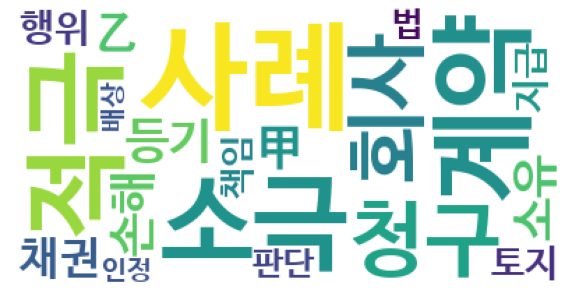

In [11]:
# World
# 많이 나타나는 단어일수록 크게 나타남
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)

In [12]:
from konlpy.tag import Okt
okt = Okt()

oo = okt.pos(posts[0],
        norm=True,   # 정규화(normalization)
        stem=True    # 어간추출(stemming)
        )

print(oo)

[('[', 'Punctuation'), ('1', 'Number'), (']', 'Punctuation'), ('구', 'Noun'), ('임대주택', 'Noun'), ('법', 'Noun'), ('시행', 'Noun'), ('규칙', 'Noun'), ('제', 'Noun'), ('3조', 'Number'), ('의', 'Foreign'), ('3', 'Number'), ('제', 'Noun'), ('1', 'Number'), ('항', 'Noun'), ('에', 'Josa'), ('정', 'Noun'), ('한', 'Josa'), ('‘', 'Foreign'), ('공공', 'Modifier'), ('건설', 'Noun'), ('임대주택', 'Noun'), ('분양', 'Noun'), ('전환', 'Noun'), ('가격', 'Noun'), ('의', 'Josa'), ('산정', 'Noun'), ('기준', 'Noun'), ('’', 'Punctuation'), ('의', 'Noun'), ('법적', 'Noun'), ('성질', 'Noun'), ('(=', 'Punctuation'), ('법규명령', 'Noun'), (')', 'Punctuation'), ('\n        \n        ', 'Foreign'), ('[', 'Punctuation'), ('2', 'Number'), (']', 'Punctuation'), ('대', 'Modifier'), ('한', 'Modifier'), ('주택', 'Noun'), ('공사', 'Noun'), ('가', 'Josa'), ('‘', 'Foreign'), ('공공', 'Modifier'), ('건설', 'Noun'), ('임대주택', 'Noun'), ('분양', 'Noun'), ('전환', 'Noun'), ('가격', 'Noun'), ('의', 'Josa'), ('산정', 'Noun'), ('기준', 'Noun'), ('’', 'Punctuation'), ('에', 'Josa'), ('위', 'Noun'

In [13]:
# 첫번째 tokenizer(Okt)
def tokenizer_1(raw_texts, pos=["Noun","Alpha","Verb","Number"], stop_words=list(stop_words_df.get("불용어"))):
    p = okt.pos(raw_texts, 
            norm=True,   # 정규화(normalization)
            stem=True    # 어간추출(stemming)
            )
    o = [word for word, tag in p if len(word) > 1 and tag in pos and word[0] not in stop_words]
    return(o)

tokenizer_1(posts[80])


['쌍무계약', '채무자', '미리', '채무', '표시', '경우', '해당', '보다']

In [14]:
# 두번째 tokenizer(mecab)
def tokenizer_2(raw_texts, pos=["Noun","Alpha","Verb","Number"], stop_words=list(stop_words_df.get("불용어"))):
    nouns = []
  
    for noun in tagger.nouns(raw_texts):
        if noun not in stop_words and len(noun)>1:
            nouns.append(noun)
    return nouns

tokenizer_2(posts[80])

['쌍무', '계약', '채무자', '채무', '이행', '의사', '표시', '사례']

# TfidfVectorizer

 TF(Term Frequency) : 특정 단어가 하나의 데이터 안에서 등장하는 횟수

DF(Document Frequency) : 특정 단어가 여러 데이터에 자주 등장하는지를 알려주는 지표.

IDF(Inverse Document Frequency) : DF에 역수를 취해(inverse) 구함

TF-IDF : TF와 IDF를 곱한 값. 즉 TF가 높고, DF가 낮을수록 값이 커지는 것을 이용하는 것입니다.

해당 단위(문장) 안에서는 많이 등장하지만, 다른 문서들까지 전체에서는 적게 사용될수록, 분별력 있는 특징이란 것입니다.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorize = TfidfVectorizer(
    tokenizer = tokenizer_1, # 문장에 대한 tokenizer (위에 정의한 함수 이용)
    min_df = 5,            # 단어가 출현하는 최소 문서의 개수
    sublinear_tf = True,    # tf값에 1+log(tf)를 적용하여 tf값이 무한정 커지는 것을 막음
    stop_words = list(stop_words_df.get("불용어"))
)

X = vectorize.fit_transform(posts)
pd.DataFrame(X.toarray())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['갖다', '거리', '견지', '결과', '결론', '고려', '공동', '관계', '관련', '근거', '기대', '기점', '기준', '까닭', '낫다', '누가', '다시', '달다', '대로', '대하', '대해', '더불다', '더욱이', '도달', '도착', '동시', '돼다', '되다', '되어다', '두번째', '뒤따르다', '따다', '따르다', '따름', '라면', '리하', '마자', '막론', '만이', '만큼', '만하', '말다', '망정', '몰랏다', '무릎', '반대', '방면', '보다', '보아', '본대', '부류', '불구', '불문', '비걱거리', '비교', '비기다', '비추다', '상대', '생각', '서술', '시오', '시작', '시초', '쓰다', '쓰이다', '안다', '않다', '알다', '연관', '울다', '입다', '입장', '잇따르다', '정도', '종합', '주저', '즈음', '지경', '지다', '진짜', '차다', '켜다', '크다', '틈타다', '편이', '한적', '해도', '해보다', '형식'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


0     1     2     3     4     5     6     7     8     9     ...  4604  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
24672   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
24673   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
24674   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
24675   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
24676   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       4605  4606  4607  4608  4609  4610  4611  4612  4613  
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
24672   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
24673   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
24674   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
24675   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
24676   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[24677 rows x 4614 columns]

In [176]:
# pd.DataFrame(X.toarray()).to_excel("TF-IDF_vectors.xlsx",index=False)

In [16]:
tfidf_df = pd.DataFrame(X.toarray())
# tfidf_df = pd.read_excel("TF-IDF_vectors.xlsx")

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
# 2번째와 3번째 문서(유클리디안 거리 값)
print(euclidean_distances(X[1], X[2]))#, X)
# 2번째와 3번째 문서(코사인유사도 값)
print(cosine_similarity(X[1], X[2]))#, X)
# [[0.1837195]]

[[1.37617353]]
[[0.0530732]]


In [109]:
# info_df[info_df['ID']==target_id].index[0]

In [18]:
# target_id 와 유사한 판례를 cosine_similarity으로 계산하여 유사벡터 도출
# 약 1분 소요
cosine_result = {}
error_reslut = {}
target_id = 150093
x = info_df[info_df['ID']==target_id].index[0]  # target_id의 Id값의 index

for y in range(len(info_df)):
    try:
        cosine_result[info_df['ID'].iloc[y]] = cosine_similarity(X[x], X[y])[0][0]
#         print(x,y,cosine_similarity(X[x], X[y]))
    except:
        error_reslut[info_df["ID"].iloc[y]] = cosine_similarity(X[x], X[y])
        print("error",x,y,cosine_similarity(X[x], X[y]))
# print(cosine_similarity(X[x], X[15964])[0][0])
info_df['ID'].iloc[15964]
sorted_cosine_dic = sorted(cosine_result.items(), key = lambda x:x[1], reverse = True)

# cosine_similariry 값 기준으로 내림차순 정렬된 유사 판례들
# 먼저나올수록 유사한 판례이다.
sorted_cosine_dic 

[(150093, 1.0000000000000002),
 (161231, 0.7855117887956462),
 (167508, 0.6281062214698281),
 (149741, 0.6268409686790513),
 (143913, 0.5912379685291281),
 (198830, 0.5818660493194052),
 (204890, 0.5818660493194052),
 (157933, 0.5742745803802131),
 (161700, 0.5528681175634601),
 (179722, 0.5461337681463855),
 (116053, 0.5446642090594227),
 (196672, 0.5446642090594227),
 (178113, 0.5193305057316616),
 (70562, 0.5043194715179738),
 (197400, 0.49249350076027354),
 (177480, 0.48007121659926033),
 (119299, 0.4765303446222601),
 (124977, 0.4751246289255437),
 (179696, 0.466187833913702),
 (184547, 0.4650467350054295),
 (200720, 0.45674712526771394),
 (214417, 0.4564118335602365),
 (169234, 0.4525260234061075),
 (179704, 0.44151783108194836),
 (199888, 0.4401940314353018),
 (71012, 0.43994813183822745),
 (165919, 0.43823492836948985),
 (178019, 0.427144929452995),
 (175516, 0.4265014768753358),
 (172356, 0.41766794874476204),
 (138649, 0.4162050061151725),
 (197011, 0.3948952124130455),
 (179

In [19]:
# target_id 에 해당하는 판례와 유사한 판례 상위 10개 도출
for id_ in sorted_cosine_dic[0:11]:
    url = "http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID={}&type=XML".format(id_[0])
    url2 = "https://www.law.go.kr/precInfoP.do?mode=0&precSeq={}&vSct=*".format(id_[0])
    print(url)

http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=150093&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=161231&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=167508&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=149741&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=143913&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=198830&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=204890&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=157933&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=161700&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=179722&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=116053&type=XML


# TF-IDF Vectorizer (tokenizer_2)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorize = TfidfVectorizer(
    tokenizer = tokenizer_2, # 문장에 대한 tokenizer (위에 정의한 함수 이용)
    min_df = 5,            # 단어가 출현하는 최소 문서의 개수
    sublinear_tf = True,    # tf값에 1+log(tf)를 적용하여 tf값이 무한정 커지는 것을 막음
    stop_words = list(stop_words_df.get("불용어"))
)

X2 = vectorize.fit_transform(posts)
pd.DataFrame(X2.toarray())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['개의', '거니', '견지', '결과', '결론', '고려', '고용', '공동', '관계', '관련', '구체', '구토', '근거', '기관', '기점', '기준', '까닭', '나다', '나머지', '노동', '노동부', '누가', '대로', '도달', '도착', '동시', '따름', '때문', '마음', '방면', '부령', '부류', '불문', '비교', '사람', '상대', '생각', '서술', '시작', '시초', '아래', '아무', '연관', '의거', '의지', '이외', '이용', '이유', '일반', '일지', '입각', '입장', '정도', '제외', '종합', '주저', '즈음', '지경', '진짜', '필요', '한적', '할만', '항목', '행정', '형식'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


0     1         2     3     4     5     6     7     8     9     ...  \
0       0.0   0.0  0.332648   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1       0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2       0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3       0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4       0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...     ...   ...       ...   ...   ...   ...   ...   ...   ...   ...  ...   
24672   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
24673   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
24674   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
24675   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
24676   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

       5158  5159  5160  5161  5162  5163  5164  5165  5166  5167  
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
24672   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
24673   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
24674   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
24675   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
24676   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[24677 rows x 5168 columns]

In [25]:
tfidf2_df = pd.DataFrame(X2.toarray())
# tfidf_df = pd.read_excel("TF-IDF_vectors.xlsx")

In [26]:
# target_id 와 유사한 판례를 cosine_similarity으로 계산하여 유사벡터 도출
# 약 1분 소요
cosine_result = {}
error_reslut = {}
target_id = 208911
x = info_df[info_df['ID']==target_id].index[0]  # target_id의 Id값의 index

for y in range(len(info_df)):
    try:
        cosine_result[info_df['ID'].iloc[y]] = cosine_similarity(X2[x], X2[y])[0][0]
#         print(x,y,cosine_similarity(X[x], X[y]))
    except:
        error_reslut[info_df["ID"].iloc[y]] = cosine_similarity(X2[x], X2[y])
        print("error",x,y,cosine_similarity(X2[x], X2[y]))
# print(cosine_similarity(X[x], X[15964])[0][0])
info_df['ID'].iloc[15964]
sorted_cosine_dic = sorted(cosine_result.items(), key = lambda x:x[1], reverse = True)

# cosine_similariry 값 기준으로 내림차순 정렬된 유사 판례들
# 먼저나올수록 유사한 판례이다.
sorted_cosine_dic 

[(208911, 1.0),
 (216801, 0.31485024860648897),
 (215765, 0.25981557675218964),
 (212677, 0.24642713957976117),
 (73938, 0.24523034276632014),
 (118716, 0.22748360853045016),
 (201510, 0.22616930817623188),
 (81794, 0.22565412948601693),
 (210899, 0.22499601296958904),
 (120580, 0.221065542134885),
 (121179, 0.22081546539688404),
 (106962, 0.22081546539688404),
 (215503, 0.21967540011599576),
 (111140, 0.21926431084307807),
 (76059, 0.21827932104472247),
 (200657, 0.21551504699742802),
 (185261, 0.21466031609895042),
 (175114, 0.2144942288761054),
 (177706, 0.21371131632202484),
 (199512, 0.2127370075786733),
 (172982, 0.21268394179854677),
 (67835, 0.21126679894734932),
 (138527, 0.21085422290798386),
 (203379, 0.21014831083966035),
 (197000, 0.20791152440790167),
 (196669, 0.20567661024311043),
 (122255, 0.20507483868251283),
 (174955, 0.20503837258694055),
 (167302, 0.2048247808517556),
 (201712, 0.20473230855403501),
 (142300, 0.20331373974627828),
 (112924, 0.20238092225451304),
 

In [27]:
# target_id 에 해당하는 판례와 유사한 판례 상위 10개 도출
for id_ in sorted_cosine_dic[0:11]:
    url = "http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID={}&type=XML".format(id_[0])
    url2 = "https://www.law.go.kr/precInfoP.do?mode=0&precSeq={}&vSct=*".format(id_[0])
    print(url)

http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=208911&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=216801&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=215765&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=212677&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=73938&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=118716&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=201510&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=81794&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=210899&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=120580&type=XML
http://www.law.go.kr/DRF/lawService.do?OC=iambyunghyun&target=prec&ID=121179&type=XML


# DBSCAN


1.2539920190368188


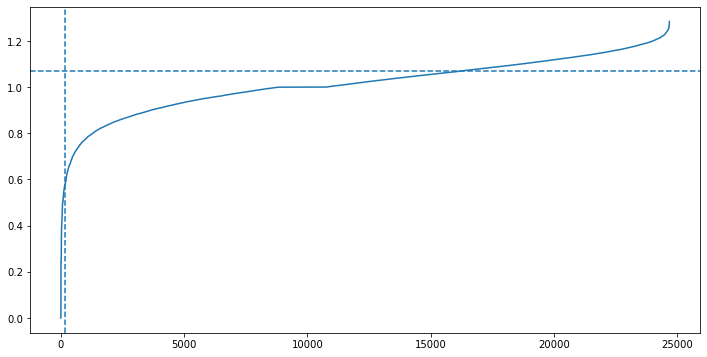

In [62]:
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(X2)
distances, indices = neigh.kneighbors(X2)
plt.figure(figsize=(12, 6))
plt.plot(np.sort(distances[:, 4]))
plt.axvline(178, 0, 2, ls='--')
plt.axhline(1.07, 0, 200, ls='--')
print(np.sort(distances[:, 4])[24646])

In [82]:
# dbscan = DBSCAN(eps = 0.5, min_samples=5)
ss = StandardScaler()
scaled_df = pd.DataFrame(ss.fit_transform(tfidf_df))
dbscan = DBSCAN(eps = 1.2)
dbscan_cluster = dbscan.fit_predict(scaled_df)
dbscan_cluster

array([-1, -1, -1, ..., -1, -1, -1])

In [83]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

dbscan_clustered_dic = {}
dbscan_clustered_list = []
dbscan_cluster_num = len(set(dbscan_cluster))
for idx,i in enumerate(dbscan_cluster):
    if i not in dbscan_clustered_dic:
        dbscan_clustered_dic[i] = [info_df['ID'].iloc[idx]]
    else:
        dbscan_clustered_dic[i].append(info_df['ID'].iloc[idx])
dbscan_clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

dbscan_clustered_dic = sorted(dbscan_clustered_dic.items(), key=lambda x: x[0])
dbscan_clustered_dic

[(-1,
  [150093,
   209310,
   208911,
   208459,
   208460,
   206272,
   205616,
   201332,
   203812,
   205613,
   208462,
   182298,
   183572,
   164098,
   161841,
   143476,
   143479,
   143924,
   70452,
   70450,
   70422,
   70388,
   69504,
   145755,
   212151,
   212173,
   212127,
   71618,
   71468,
   71456,
   71379,
   71343,
   71385,
   71293,
   212135,
   212117,
   212119,
   212133,
   71197,
   71179,
   212187,
   71164,
   146020,
   120699,
   120716,
   120683,
   120605,
   120588,
   119893,
   146042,
   119728,
   119732,
   119717,
   119520,
   119432,
   119443,
   119362,
   150951,
   119280,
   119281,
   119267,
   119195,
   119053,
   119061,
   119062,
   118938,
   118950,
   118882,
   118871,
   118757,
   118796,
   118689,
   118712,
   118710,
   118608,
   118544,
   118543,
   118517,
   118547,
   118548,
   118528,
   118426,
   118422,
   77028,
   77026,
   77015,
   76655,
   76654,
   76576,
   76401,
   76328,
   76142,
   761

In [84]:
df_dbscan_cluster = pd.DataFrame(dbscan_clustered_dic,columns=['num','clusters'])
dbscan_cluster_num = [len(i) for i in df_dbscan_cluster['clusters']]
df_dbscan_cluster['cluster_num'] = dbscan_cluster_num
df_dbscan_cluster

num                                           clusters  cluster_num
0   -1  [150093, 209310, 208911, 208459, 208460, 20627...        24666
1    0                [73759, 73731, 73322, 72788, 71924]            5
2    1         [68216, 68192, 68196, 68195, 68194, 68189]            6

# Kmeans

In [95]:
# Instantiate the clustering model 
# n_init : 랜덤한 초기값을 몇번이나 다르게 설정해서 돌릴건지
# max_iter=300 : iteration을 반복적으로 수행하면 서 좋을 결과로 수렴하게되는데 그 횟수를 몇번 할 것인지
# verbose : 계산과정 보여줌 0,1,2 이렇게 해서 보여주는 정보의 양을 조절 할 수있음

# 15개의 클러스터를 만들기 
n_clusters = 17
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

KMeans(n_clusters=17)

In [96]:
# 모델에 fitting 하기
kmeans.fit(scaled_df)

y_kmeans = kmeans.predict(scaled_df)
y_kmeans[0:10] # 군집화 된 결과


array([13,  9, 13, 13, 11, 13, 13, 13, 13,  3], dtype=int32)

In [97]:
# 군집의 중심
kmeans.cluster_centers_

array([[-0.01409802, -0.00584037, -0.04630374, ..., -0.01700752,
        -0.02423534, -0.01371585],
       [-0.01409802, -0.01524451, -0.02770839, ..., -0.01700752,
        -0.02423534, -0.01371585],
       [-0.01409802, -0.01524451, -0.09906061, ..., -0.01700752,
        -0.02423534, -0.01371585],
       ...,
       [-0.01409802, -0.01524451, -0.09906061, ..., -0.01700752,
        -0.02423534, -0.01371585],
       [-0.01409802, -0.01524451, -0.09906061, ..., -0.01700752,
        -0.02423534, -0.01371585],
       [-0.01409802, -0.01524451, -0.09906061, ..., -0.01700752,
        -0.02423534, -0.01371585]])

In [98]:
kmeans.labels_[0:8]

array([13,  9, 13, 13, 11, 13, 13, 13], dtype=int32)

In [99]:
# 클러스터링의 성능측정
# 값이 높을 수록 좋음
kmeans.inertia_

126547648.11888935

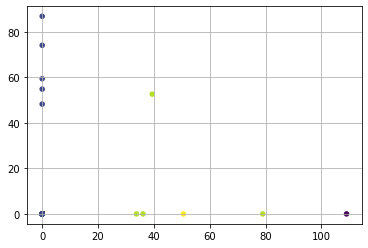

In [91]:
plt.scatter(np.array(scaled_df)[:,0], np.array(scaled_df)[:,1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
# plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()

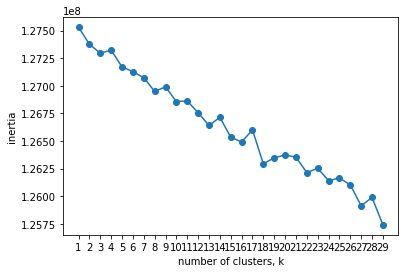

In [93]:
ks = range(1,30)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [101]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

clustered_dic = {}
clustered_list = []
cluster_num = len(set(y_kmeans))
for idx,i in enumerate(y_kmeans):
    if i not in clustered_dic:
        clustered_dic[i] = [info_df['ID'].iloc[idx]]
    else:
        clustered_dic[i].append(info_df['ID'].iloc[idx])
clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
clustered_dic

[(0,
  [143476,
   70452,
   70450,
   70388,
   212173,
   71618,
   71468,
   212133,
   212187,
   146020,
   120699,
   120683,
   119520,
   118882,
   118757,
   118689,
   118710,
   118608,
   118528,
   77026,
   76655,
   75933,
   75924,
   75829,
   75826,
   75431,
   75414,
   75404,
   75396,
   75378,
   75376,
   75367,
   75191,
   75158,
   74917,
   74965,
   74958,
   74629,
   74532,
   74529,
   74518,
   74515,
   74466,
   74453,
   74342,
   74072,
   74053,
   73978,
   73918,
   73751,
   73702,
   73696,
   73554,
   73550,
   73537,
   73515,
   73489,
   73477,
   73472,
   73448,
   73293,
   73074,
   72962,
   72951,
   72941,
   72761,
   72208,
   72173,
   72161,
   72103,
   72097,
   72096,
   72073,
   72053,
   71950,
   71943,
   77160,
   77156,
   77137,
   77121,
   71835,
   71834,
   71821,
   71817,
   71792,
   71787,
   71778,
   71104,
   70347,
   70113,
   210153,
   69957,
   210289,
   69909,
   69890,
   69873,
   69579,
   166831

In [103]:
df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
cluster_num = [len(i) for i in df_cluster['clusters']]
df_cluster['cluster_num'] = cluster_num
df_cluster

num                                           clusters  cluster_num
0     0  [143476, 70452, 70450, 70388, 212173, 71618, 7...         6320
1     1  [119362, 150951, 72219, 186156, 119709, 205606...          119
2     2      [205611, 76570, 75759, 69569, 194637, 104201]            6
3     3  [205613, 164098, 143924, 120716, 119061, 11871...         3288
4     4  [73428, 118244, 74998, 118523, 74073, 72785, 1...            7
5     5  [69621, 75932, 73732, 179025, 143606, 191354, ...           15
6     6                   [192746, 204247, 164198, 159454]            4
7     7           [140820, 192144, 197405, 200272, 203365]            5
8     8  [71349, 75608, 119906, 118249, 76330, 211639, ...           41
9     9  [209310, 182298, 70422, 212151, 71197, 71164, ...         1614
10   10  [74034, 69743, 182425, 69104, 69313, 80549, 21...           28
11   11  [208460, 212119, 119893, 76126, 75430, 75174, ...         1572
12   12  [71453, 71807, 212195, 191003, 163589, 146815,...           67
13   13  [150093, 208911, 208459, 206272, 205616, 20133...        11564
14   14  [203866, 204878, 199737, 204888, 158490, 15723...            8
15   15                                           [201367]            1
16   16  [74301, 73968, 72206, 72139, 196059, 196080, 1...           18

In [124]:
for idx,num in enumerate(df_cluster["clusters"]):
    for j in num:
        if (판례목록_df["판례ID"] == j).sum() != 0:
            print(판례목록_df[판례목록_df["판례ID"] == j].iloc[0])
        if (판례목록_하등_df["판례ID"] == j).sum() != 0:
            print(판례목록_하등_df[판례목록_하등_df["판례ID"] == j].iloc[0])
        
    print()

판례목록_df[판례목록_df["판례ID"] == 119362]
판례목록_하등_df[판례목록_하등_df["판례ID"]==119362]

순번             386
판례ID        143476
제목            전부금등
법원            광주고법
사건유형           하급심
판결유형            민사
선고일자    2010.03.24
Name: 385, dtype: object
순번             397
판례ID         70452
제목              예금
법원            광주고법
사건유형           하급심
판결유형            민사
선고일자    2006.06.14
Name: 396, dtype: object
순번             398
판례ID         70450
제목            경영비등
법원            광주고법
사건유형           하급심
판결유형            민사
선고일자    2006.06.07
Name: 397, dtype: object
순번             400
판례ID         70388
제목          소유권확인등
법원            광주고법
사건유형           하급심
판결유형            민사
선고일자    2006.04.19
Name: 399, dtype: object
순번             407
판례ID        212173
제목         사해행위취소등
법원            광주고법
사건유형           하급심
판결유형            민사
선고일자    2003.02.14
Name: 406, dtype: object
순번             410
판례ID         71618
제목             구상금
법원            광주고법
사건유형           하급심
판결유형            민사
선고일자    2002.08.21
Name: 409, dtype: object
순번             413
판례ID         71468
제목            

순번            1383
판례ID        120876
제목           부당이득금
법원            광주지법
사건유형           하급심
판결유형            민사
선고일자    1999.06.18
Name: 1382, dtype: object
순번            1387
판례ID        120821
제목             구상금
법원            광주지법
사건유형           하급심
판결유형            민사
선고일자    1999.04.08
Name: 1386, dtype: object
순번            1388
판례ID        120817
제목           부당이득금
법원            광주지법
사건유형           하급심
판결유형            민사
선고일자    1999.04.02
Name: 1387, dtype: object
순번            1389
판례ID        120946
제목           약속어음금
법원            광주지법
사건유형           하급심
판결유형            민사
선고일자    1999.04.02
Name: 1388, dtype: object
순번            1396
판례ID        120579
제목            청구이의
법원            광주지법
사건유형           하급심
판결유형            민사
선고일자    1998.04.09
Name: 1395, dtype: object
순번            1401
판례ID        120158
제목           예탁금반환
법원            광주지법
사건유형           하급심
판결유형            민사
선고일자    1996.05.23
Name: 1400, dtype: object
순번            1402
판례ID        120124
제목      

순번            2333
판례ID         75952
제목      계약무효확인청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1984.12.18
Name: 2332, dtype: object
순번             2353
판례ID          75852
제목      부당이득금반환청구사건
법원             대구고법
사건유형            하급심
판결유형             민사
선고일자     1984.09.27
Name: 2352, dtype: object
순번            2356
판례ID         75839
제목        손해배상청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1984.08.23
Name: 2355, dtype: object
순번            2371
판례ID         75714
제목        공사대금청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1984.04.04
Name: 2370, dtype: object
순번            2378
판례ID         75607
제목       건물명도등청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1984.03.07
Name: 2377, dtype: object
순번            2400
판례ID         75569
제목       부당이득금청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1983.07.19
Name: 2399, dtype: object
순번             2405
판례ID          75555

순번                 3275
판례ID              72364
제목      이송신청각하결정에대한항고사건
법원                 대구고법
사건유형                하급심
판결유형                 민사
선고일자         1968.08.23
Name: 3274, dtype: object
순번            3277
판례ID         72362
제목         배상금청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1968.08.01
Name: 3276, dtype: object
순번               3297
판례ID            72236
제목      건물수거및대지명도청구사건
법원               대구고법
사건유형              하급심
판결유형               민사
선고일자       1967.10.26
Name: 3296, dtype: object
순번               3317
판례ID            72155
제목      소유권이전등기말소청구사건
법원               대구고법
사건유형              하급심
판결유형               민사
선고일자       1967.02.24
Name: 3316, dtype: object
순번            3336
판례ID         72072
제목       게약금반환청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1966.06.15
Name: 3335, dtype: object
순번            3337
판례ID         72071
제목      사해행위취소청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1966.0

순번            4539
판례ID        119729
제목            담보취소
법원            대전고법
사건유형           하급심
판결유형            민사
선고일자    1993.09.15
Name: 4538, dtype: object
순번            4543
판례ID        119531
제목              지료
법원            대전고법
사건유형           하급심
판결유형            민사
선고일자    1993.03.30
Name: 4542, dtype: object
순번            4883
판례ID        204353
제목           부당이득금
법원            대전지법
사건유형           하급심
판결유형            민사
선고일자    2018.03.22
Name: 4882, dtype: object
순번              4884
판례ID          185123
제목      건물명도·손해배상(기)
법원              대전지법
사건유형             하급심
판결유형              민사
선고일자      2017.05.19
Name: 4883, dtype: object
순번            4906
판례ID        172937
제목            공사대금
법원            대전지법
사건유형           하급심
판결유형            민사
선고일자    2014.02.13
Name: 4905, dtype: object
순번            4933
판례ID         64815
제목          근저당권말소
법원            대전지법
사건유형           하급심
판결유형            민사
선고일자    2008.09.05
Name: 4932, dtype: object
순번            4937
판례ID         

순번            6559
판례ID        118629
제목         부당이득금반환
법원            부산지법
사건유형           하급심
판결유형            민사
선고일자    1989.07.20
Name: 6558, dtype: object
순번            6564
판례ID        118440
제목         소유권이전등기
법원            부산지법
사건유형           하급심
판결유형            민사
선고일자    1988.12.16
Name: 6563, dtype: object
순번             6578
판례ID          77042
제목      손해배상(기)청구사건
법원             부산지법
사건유형            하급심
판결유형             민사
선고일자     1987.10.14
Name: 6577, dtype: object
순번            6580
판례ID         76972
제목          배당이의사건
법원            부산지법
사건유형           하급심
판결유형            민사
선고일자    1987.09.30
Name: 6579, dtype: object
순번                6582
판례ID             76970
제목      근저당권설정등기말소청구사건
법원                부산지법
사건유형               하급심
판결유형                민사
선고일자        1987.09.23
Name: 6581, dtype: object
순번            6585
판례ID         76876
제목         전부금청구사건
법원            부산지법
사건유형           하급심
판결유형            민사
선고일자    1987.06.16
Name: 6584, dtype: object
순번         

순번           11505
판례ID        129709
제목            회사정리
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1997.02.25
Name: 11504, dtype: object
순번           11525
판례ID        120288
제목           공사잔대금
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1996.12.03
Name: 11524, dtype: object
순번           11531
판례ID        120257
제목         손해배상(기)
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1996.10.22
Name: 11530, dtype: object
순번           11544
판례ID        120251
제목         손해배상(기)
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1996.07.16
Name: 11543, dtype: object
순번           11557
판례ID        120174
제목            회사정리
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1996.05.02
Name: 11556, dtype: object
순번           11591
판례ID        119947
제목            공사대금
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1995.04.27
Name: 11590, dtype: object
순번           11594
판례ID        119945
제목

순번           12583
판례ID         76061
제목         전부금청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1985.03.13
Name: 12582, dtype: object
순번            12598
판례ID          76038
제목      소유권이전등기청구사건
법원             서울고법
사건유형            하급심
판결유형             민사
선고일자     1985.01.25
Name: 12597, dtype: object
순번           12609
판례ID         75953
제목       부당이득금청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1984.12.24
Name: 12608, dtype: object
순번           12617
판례ID         75948
제목      보증채무이행청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1984.12.06
Name: 12616, dtype: object
순번           12620
판례ID         75944
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1984.12.04
Name: 12619, dtype: object
순번           12628
판례ID         75937
제목      약속어음금등청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1984.11.26
Name: 12627, dtype: object
순번           12629
판례ID         7

순번           13465
판례ID         74320
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1977.07.21
Name: 13464, dtype: object
순번            13467
판례ID          74318
제목      월세보증금반환청구사건
법원             서울고법
사건유형            하급심
판결유형             민사
선고일자     1977.07.21
Name: 13466, dtype: object
순번           13495
판례ID         74298
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1977.06.03
Name: 13494, dtype: object
순번            13512
판례ID          74284
제목      소유권이전등기청구사건
법원             서울고법
사건유형            하급심
판결유형             민사
선고일자     1977.05.06
Name: 13511, dtype: object
순번               13521
판례ID             74269
제목      소유권보존등기등말소청구사건
법원                서울고법
사건유형               하급심
판결유형                민사
선고일자        1977.04.15
Name: 13520, dtype: object
순번           13529
판례ID         74262
제목      토지대금잔액청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1977.04.12
Name: 13528, dtype: objec

순번            14478
판례ID          72764
제목      부당이득금반환청구사건
법원             서울고법
사건유형            하급심
판결유형             민사
선고일자     1971.04.02
Name: 14477, dtype: object
순번           14488
판례ID         72749
제목         대여금청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1971.02.24
Name: 14487, dtype: object
순번           14493
판례ID         72701
제목      토지매매대금청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1970.12.29
Name: 14492, dtype: object
순번           14494
판례ID         72700
제목      인수채무이행청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1970.12.18
Name: 14493, dtype: object
순번              14511
판례ID            72688
제목      공탁금수령권자확인청구사건
법원               서울고법
사건유형              하급심
판결유형               민사
선고일자       1970.10.30
Name: 14510, dtype: object
순번           14513
판례ID         72682
제목       약속어음금청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1970.10.15
Name: 14512, dtype: object
순번          

순번           15744
판례ID        119521
제목           건물명도등
법원          서울민사지법
사건유형           하급심
판결유형            민사
선고일자    1993.02.17
Name: 15743, dtype: object
순번           15750
판례ID        119525
제목            물품대금
법원          서울민사지법
사건유형           하급심
판결유형            민사
선고일자    1993.02.03
Name: 15749, dtype: object
순번           15760
판례ID        119391
제목       토지수용금청구사건
법원          서울민사지법
사건유형           하급심
판결유형            민사
선고일자    1992.07.22
Name: 15759, dtype: object
순번           15761
판례ID        148671
제목       토지수용금청구사건
법원          서울민사지법
사건유형           하급심
판결유형            민사
선고일자    1992.07.22
Name: 15760, dtype: object
순번           15767
판례ID        119346
제목             구상금
법원          서울민사지법
사건유형           하급심
판결유형            민사
선고일자    1992.05.07
Name: 15766, dtype: object
순번           15770
판례ID        119262
제목         가압류말소등기
법원          서울민사지법
사건유형           하급심
판결유형            민사
선고일자    1992.04.29
Name: 15769, dtype: object
순번           15775
판례ID        119286
제목

순번           18200
판례ID        212225
제목           매매대금등
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    2000.09.21
Name: 18199, dtype: object
순번           18203
판례ID        212239
제목           전세금반환
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    2000.08.24
Name: 18202, dtype: object
순번           18204
판례ID         71296
제목            건물명도
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    2000.08.17
Name: 18203, dtype: object
순번           18205
판례ID        212305
제목            건물명도
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    2000.08.17
Name: 18204, dtype: object
순번           18206
판례ID        212273
제목            매매대금
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    2000.07.20
Name: 18205, dtype: object
순번           18208
판례ID        212255
제목         손해배상(기)
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    2000.06.08
Name: 18207, dtype: object
순번           18209
판례ID        212287
제목

순번           18629
판례ID         75623
제목        손해배상청구사건
법원       서울지법 동부지원
사건유형           하급심
판결유형            민사
선고일자    1984.01.20
Name: 18628, dtype: object
순번           18635
판례ID         71386
제목            배당이의
법원       서울지법 북부지원
사건유형           하급심
판결유형            민사
선고일자    2001.05.24
Name: 18634, dtype: object
순번           18637
판례ID        120877
제목            배당이의
법원       서울지법 북부지원
사건유형           하급심
판결유형            민사
선고일자    1999.02.26
Name: 18636, dtype: object
순번           18642
판례ID        120729
제목             구상금
법원       서울지법 북부지원
사건유형           하급심
판결유형            민사
선고일자    1998.07.14
Name: 18641, dtype: object
순번           18649
판례ID        129744
제목          약속어음금등
법원       서울지법 북부지원
사건유형           하급심
판결유형            민사
선고일자    1997.08.07
Name: 18648, dtype: object
순번           18650
판례ID        120359
제목             전부금
법원       서울지법 북부지원
사건유형           하급심
판결유형            민사
선고일자    1997.06.12
Name: 18649, dtype: object
순번           18651
판례ID        129662
제목

순번           22062
판례ID         71443
제목         부당이득금반환
법원            인천지법
사건유형           하급심
판결유형            민사
선고일자    2001.11.21
Name: 22061, dtype: object
순번           22063
판례ID        212227
제목            할부대금
법원            인천지법
사건유형           하급심
판결유형            민사
선고일자    2000.11.24
Name: 22062, dtype: object
순번           22068
판례ID        120849
제목         전세권회복등기
법원            인천지법
사건유형           하급심
판결유형            민사
선고일자    1999.06.23
Name: 22067, dtype: object
순번           22071
판례ID        120824
제목             양수금
법원            인천지법
사건유형           하급심
판결유형            민사
선고일자    1999.01.29
Name: 22070, dtype: object
순번           22082
판례ID        120587
제목         손해배상(기)
법원            인천지법
사건유형           하급심
판결유형            민사
선고일자    1998.04.01
Name: 22081, dtype: object
순번           22090
판례ID        129665
제목           계약금반환
법원            인천지법
사건유형           하급심
판결유형            민사
선고일자    1997.05.30
Name: 22089, dtype: object
순번           22096
판례ID        129663
제목

순번              17
판례ID        216845
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2021.06.24
Name: 16, dtype: object
순번              23
판례ID        216847
제목          사해행위취소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2021.06.10
Name: 22, dtype: object
순번              34
판례ID        216659
제목        건물명도(인도)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2021.05.13
Name: 33, dtype: object
순번              36
판례ID        216683
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2021.05.07
Name: 35, dtype: object
순번              38
판례ID        216673
제목      매매계약무효확인의소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2021.05.07
Name: 37, dtype: object
순번              43
판례ID        216661
제목             전부금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2021.05.07
Name: 42, dtype: object
순번                   53
판례ID             215413
제목      채권

순번            1064
판례ID        207587
제목             추심금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.12.27
Name: 1063, dtype: object
순번                 1099
판례ID             206323
제목      건물명도·임대차보증금청구의소
법원                  대법원
사건유형                대법원
판결유형                 민사
선고일자         2018.11.29
Name: 1098, dtype: object
순번            1111
판례ID        206324
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.11.29
Name: 1110, dtype: object
순번            1117
판례ID        206326
제목            물품대금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.11.29
Name: 1116, dtype: object
순번            1122
판례ID        204266
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.11.29
Name: 1121, dtype: object
순번            1128
판례ID        206332
제목          사해행위취소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.11.29
Name: 1127, dtype: object
순번         

순번            2143
판례ID        185876
제목          면책효력확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.10.12
Name: 2142, dtype: object
순번            2147
판례ID        197936
제목          사해행위취소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.10.12
Name: 2146, dtype: object
순번            2154
판례ID        197932
제목         임차보증금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.10.12
Name: 2153, dtype: object
순번            2160
판례ID        197937
제목        위헌법률심판제청
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.09.28
Name: 2159, dtype: object
순번            2162
판례ID        197930
제목           건물명도등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.09.26
Name: 2161, dtype: object
순번            2168
판례ID        185891
제목             전부금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.09.26
Name: 2167, dtype: object
순번            2170
판례ID        185889
제목      

순번            2982
판례ID        183817
제목         채무부존재확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2016.12.01
Name: 2981, dtype: object
순번            2986
판례ID        183674
제목            건물명도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2016.11.25
Name: 2985, dtype: object
순번            2989
판례ID        183672
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2016.11.25
Name: 2988, dtype: object
순번            2996
판례ID        183673
제목          사해행위취소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2016.11.25
Name: 2995, dtype: object
순번                                                   3015
판례ID                                               187884
제목      건물인도등(표준임대료와 당초 계약상 임대료의 차액 연체를 이유로 임대차계약을 해지하...
법원                                                    대법원
사건유형                                                  대법원
판결유형                                                   민사
선고일자            

순번            3812
판례ID        179849
제목           건물명도등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.10.29
Name: 3811, dtype: object
순번            3813
판례ID        179490
제목           건물명도등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.10.29
Name: 3812, dtype: object
순번            3817
판례ID        179476
제목            공사대금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.10.29
Name: 3816, dtype: object
순번            3826
판례ID        179826
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.10.29
Name: 3825, dtype: object
순번            3827
판례ID        179493
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.10.29
Name: 3826, dtype: object
순번            3834
판례ID        179852
제목          사해행위취소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.10.29
Name: 3833, dtype: object
순번            3835
판례ID        179491
제목      

순번            4412
판례ID        177617
제목        선수금환급보증금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.02.26
Name: 4411, dtype: object
순번            4414
판례ID        177633
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.02.26
Name: 4413, dtype: object
순번            4427
판례ID        179026
제목         채무부존재확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.02.26
Name: 4426, dtype: object
순번            4442
판례ID        178736
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.02.12
Name: 4441, dtype: object
순번            4457
판례ID        177603
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.02.12
Name: 4456, dtype: object
순번            4471
판례ID        179042
제목       채권압류및추심명령
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.02.03
Name: 4470, dtype: object
순번            4498
판례ID        177586
제목      

순번            5136
판례ID        174911
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.06.26
Name: 5135, dtype: object
순번            5139
판례ID        175518
제목         사해행위취소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.06.26
Name: 5138, dtype: object
순번            5153
판례ID        174893
제목             어음금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.06.26
Name: 5152, dtype: object
순번            5154
판례ID        174891
제목             어음금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.06.26
Name: 5153, dtype: object
순번            5158
판례ID        175517
제목            점포명도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.06.26
Name: 5157, dtype: object
순번            5159
판례ID        174922
제목           점포명도등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.06.26
Name: 5158, dtype: object
순번            5179
판례ID        174799
제목      

순번                  5860
판례ID              174119
제목      소유권이전등기말소등기절차이행등
법원                   대법원
사건유형                 대법원
판결유형                  민사
선고일자          2013.12.12
Name: 5859, dtype: object
순번            5879
판례ID        174124
제목          출연금반환등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.12.12
Name: 5878, dtype: object
순번              5882
판례ID          171804
제목      계약금 및 중도금 반환
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      2013.11.28
Name: 5881, dtype: object
순번            5883
판례ID        180411
제목         계약보증금청구
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.11.28
Name: 5882, dtype: object
순번            5887
판례ID        171806
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.11.28
Name: 5886, dtype: object
순번            5888
판례ID        180412
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.11.28
Name: 5887, dtyp

순번            6507
판례ID        171980
제목          사해행위취소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.06.13
Name: 6506, dtype: object
순번            6521
판례ID        169625
제목             추심금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.06.13
Name: 6520, dtype: object
순번                  6524
판례ID              171985
제목      토지거래 계약허가 절차이행 등
법원                   대법원
사건유형                 대법원
판결유형                  민사
선고일자          2013.06.13
Name: 6523, dtype: object
순번              6531
판례ID          169498
제목      부동산 처분금지 가처분
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      2013.05.31
Name: 6530, dtype: object
순번              6535
판례ID          171916
제목      공사대금·손해배상(기)
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      2013.05.24
Name: 6534, dtype: object
순번              6544
판례ID          171920
제목      토지거래계약허가절차이행
법원               대법원
사건유형             대법원
판결유형              민사
선고일자     

순번            7271
판례ID        165781
제목             양수금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.09.27
Name: 7270, dtype: object
순번            7272
판례ID        168356
제목             양수금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.09.27
Name: 7271, dtype: object
순번                     7285
판례ID                 165776
제목      회생채권조사확정재판에 대한 이의의소
법원                      대법원
사건유형                    대법원
판결유형                     민사
선고일자             2012.09.27
Name: 7284, dtype: object
순번              7297
판례ID          167441
제목      매매대금 반환·매매대금
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      2012.09.13
Name: 7296, dtype: object
순번            7299
판례ID        167500
제목           배당 이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.09.13
Name: 7298, dtype: object
순번            7300
판례ID        165458
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.0

순번            7991
판례ID        160246
제목          신용장 대금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.01.27
Name: 7990, dtype: object
순번               7992
판례ID           164770
제목      약정금·부당이득금반환 등
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       2012.01.27
Name: 7991, dtype: object
순번            8001
판례ID        164755
제목       책임이행적립금 등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.01.27
Name: 8000, dtype: object
순번            8006
판례ID        160204
제목            건물명도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.01.26
Name: 8005, dtype: object
순번            8010
판례ID        164751
제목       소유권이전등기 등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.01.26
Name: 8009, dtype: object
순번            8011
판례ID        160247
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.01.26
Name: 8010, dtype: object
순번            8021
판례ID  

순번            8803
판례ID        158464
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.04.28
Name: 8802, dtype: object
순번            8821
판례ID        158475
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.04.28
Name: 8820, dtype: object
순번            8822
판례ID        158463
제목             양수금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.04.28
Name: 8821, dtype: object
순번            8827
판례ID        193729
제목             전부금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.04.28
Name: 8826, dtype: object
순번            8830
판례ID        158493
제목            주식대금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.04.28
Name: 8829, dtype: object
순번            8833
판례ID        149811
제목           지연손해금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.04.28
Name: 8832, dtype: object
순번            8843
판례ID        149718
제목      

순번            9659
판례ID        144864
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.07.15
Name: 9658, dtype: object
순번            9660
판례ID        144851
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.07.15
Name: 9659, dtype: object
순번            9664
판례ID        144866
제목         사해행위취소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.07.15
Name: 9663, dtype: object
순번            9669
판례ID        144863
제목        손해배상(기)등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.07.15
Name: 9668, dtype: object
순번            9689
판례ID        144868
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.07.08
Name: 9688, dtype: object
순번            9695
판례ID        146241
제목             약정금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.07.08
Name: 9694, dtype: object
순번            9708
판례ID        146260
제목      

순번           10285
판례ID        143612
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.01.28
Name: 10284, dtype: object
순번           10289
판례ID        215495
제목            사채상환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.01.28
Name: 10288, dtype: object
순번             10304
판례ID          215501
제목      손해배상(기)·공사대금
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      2010.01.28
Name: 10303, dtype: object
순번           10316
판례ID        215503
제목             전부금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.01.28
Name: 10315, dtype: object
순번           10324
판례ID        215497
제목      토지명도등·건물명도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.01.28
Name: 10323, dtype: object
순번           10332
판례ID        144530
제목            파산선고
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.01.25
Name: 10331, dtype: object
순번           10334
판례ID   

순번           10964
판례ID        141736
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.07.23
Name: 10963, dtype: object
순번           10975
판례ID        142110
제목         채무부존재확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.07.23
Name: 10974, dtype: object
순번           10976
판례ID        142112
제목             추심금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.07.23
Name: 10975, dtype: object
순번           10989
판례ID        141759
제목           공유물분할
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.07.09
Name: 10988, dtype: object
순번           10992
판례ID        141761
제목          근저당권말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.07.09
Name: 10991, dtype: object
순번           10994
판례ID        138143
제목            대여금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.07.09
Name: 10993, dtype: object
순번           11002
판례ID        138389
제목

순번           11566
판례ID        134327
제목            대여금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.02.26
Name: 11565, dtype: object
순번           11571
판례ID        127781
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.02.26
Name: 11570, dtype: object
순번           11572
판례ID        134328
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.02.26
Name: 11571, dtype: object
순번           11582
판례ID        127780
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.02.26
Name: 11581, dtype: object
순번           11590
판례ID        134324
제목        임대차보증금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.02.26
Name: 11589, dtype: object
순번           11593
판례ID        127782
제목           채권자대위
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.02.26
Name: 11592, dtype: object
순번              11595
판례ID           142

순번           12219
판례ID        211065
제목             추심금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.08.21
Name: 12218, dtype: object
순번                 12224
판례ID              124884
제목      물상대위에의한채권압류및전부명령
법원                   대법원
사건유형                 대법원
판결유형                  민사
선고일자          2008.08.12
Name: 12223, dtype: object
순번           12229
판례ID         64795
제목         사해행위취소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.08.11
Name: 12228, dtype: object
순번           12234
판례ID         64796
제목             약정금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.08.11
Name: 12233, dtype: object
순번           12242
판례ID         64797
제목             추심금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.08.11
Name: 12241, dtype: object
순번           12246
판례ID         64944
제목            공사대금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.07.24
Name: 12245, dtype: objec

순번           12902
판례ID         69241
제목           보증채무금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.02.14
Name: 12901, dtype: object
순번           12908
판례ID         85535
제목         사해행위취소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.02.14
Name: 12907, dtype: object
순번           12913
판례ID         69239
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.02.14
Name: 12912, dtype: object
순번           12915
판례ID         85596
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.02.14
Name: 12914, dtype: object
순번           12917
판례ID         69236
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.02.14
Name: 12916, dtype: object
순번                     12924
판례ID                   85534
제목      운송대금등·사해행위취소·손해배상(기)
법원                       대법원
사건유형                     대법원
판결유형                      민사
선고일자              2008.02.

순번           13514
판례ID        194145
제목          정리채권확정
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.09.06
Name: 13513, dtype: object
순번           13528
판례ID         85258
제목           건물명도등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.08.24
Name: 13527, dtype: object
순번           13535
판례ID        194144
제목              부인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.08.24
Name: 13534, dtype: object
순번           13548
판례ID         85257
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.08.23
Name: 13547, dtype: object
순번           13552
판례ID         85254
제목             보증금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.08.23
Name: 13551, dtype: object
순번             13561
판례ID           68896
제목      손해배상(기)·임가공료
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      2007.08.23
Name: 13560, dtype: object
순번               13565
판례I

순번           14362
판례ID         84903
제목             추심금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.01.11
Name: 14361, dtype: object
순번           14368
판례ID        194107
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2006.12.22
Name: 14367, dtype: object
순번           14391
판례ID        194103
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2006.12.21
Name: 14390, dtype: object
순번           14394
판례ID         84877
제목           보증채무금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2006.12.21
Name: 14393, dtype: object
순번           14397
판례ID        194102
제목         사해행위취소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2006.12.21
Name: 14396, dtype: object
순번           14403
판례ID         68376
제목             약정금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2006.12.21
Name: 14402, dtype: object
순번           14404
판례ID         68375
제목

순번           15206
판례ID         84424
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2006.04.13
Name: 15205, dtype: object
순번           15224
판례ID         84399
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2006.03.24
Name: 15223, dtype: object
순번           15227
판례ID         68266
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2006.03.24
Name: 15226, dtype: object
순번           15235
판례ID         84398
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2006.03.24
Name: 15234, dtype: object
순번           15246
판례ID         67911
제목            건물명도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2006.03.23
Name: 15245, dtype: object
순번           15247
판례ID         84397
제목            공사대금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2006.03.23
Name: 15246, dtype: object
순번           15268
판례ID         67898
제목

순번           15957
판례ID        193809
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.06.23
Name: 15956, dtype: object
순번           15962
판례ID         83925
제목           주식반환등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.06.23
Name: 15961, dtype: object
순번           15965
판례ID         67606
제목            청구이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.06.23
Name: 15964, dtype: object
순번           15970
판례ID         83899
제목          근저당권말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.06.10
Name: 15969, dtype: object
순번           15971
판례ID        193801
제목          근저당권말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.06.10
Name: 15970, dtype: object
순번           15977
판례ID        193803
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.06.10
Name: 15976, dtype: object
순번           15993
판례ID        193795
제목

순번               16664
판례ID             83415
제목      공사대금등·산재보험료등반환
법원                 대법원
사건유형               대법원
판결유형                민사
선고일자        2004.08.20
Name: 16663, dtype: object
순번           16670
판례ID         83416
제목           보증채무금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2004.08.20
Name: 16669, dtype: object
순번           16699
판례ID         67321
제목         계약보증금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2004.07.22
Name: 16698, dtype: object
순번           16709
판례ID        126736
제목           보증채무금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2004.07.22
Name: 16708, dtype: object
순번           16711
판례ID         83375
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2004.07.22
Name: 16710, dtype: object
순번           16725
판례ID         83370
제목          신용장대금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2004.07.22
Name: 16724, dtype: object
순번          

순번           17360
판례ID         82939
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.11.28
Name: 17359, dtype: object
순번           17364
판례ID         82940
제목           신용장대금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.11.28
Name: 17363, dtype: object
순번           17380
판례ID         82937
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.11.27
Name: 17379, dtype: object
순번           17386
판례ID         82905
제목           계약금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.11.14
Name: 17385, dtype: object
순번           17390
판례ID         82912
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.11.14
Name: 17389, dtype: object
순번           17391
판례ID         82909
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.11.14
Name: 17390, dtype: object
순번           17392
판례ID         82908
제목

순번           17968
판례ID        194609
제목          파산채권확정
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.03.14
Name: 17967, dtype: object
순번           17986
판례ID        194621
제목           부인권행사
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.02.28
Name: 17985, dtype: object
순번           18002
판례ID         82393
제목            공사대금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.02.26
Name: 18001, dtype: object
순번           18006
판례ID         82396
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.02.26
Name: 18005, dtype: object
순번           18010
판례ID        194388
제목          파산채권확정
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.02.26
Name: 18009, dtype: object
순번           18013
판례ID        194361
제목            낙찰허가
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.02.19
Name: 18012, dtype: object
순번           18037
판례ID        194648
제목

순번           18364
판례ID        194408
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.10.25
Name: 18363, dtype: object
순번           18365
판례ID        194774
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.10.25
Name: 18364, dtype: object
순번           18366
판례ID        194398
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.10.25
Name: 18365, dtype: object
순번           18389
판례ID        194788
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.10.22
Name: 18388, dtype: object
순번           18405
판례ID         81997
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.10.11
Name: 18404, dtype: object
순번           18409
판례ID         81983
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.10.11
Name: 18408, dtype: object
순번           18410
판례ID         81991
제목

순번           18910
판례ID         81508
제목         소유권말소등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.05.10
Name: 18909, dtype: object
순번              18912
판례ID            81503
제목      소유권이전등기·토지인도등
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       2002.05.10
Name: 18911, dtype: object
순번           18919
판례ID         81652
제목              이송
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.05.10
Name: 18918, dtype: object
순번           18920
판례ID         81513
제목          정리채권확정
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.05.10
Name: 18919, dtype: object
순번           18926
판례ID         81555
제목      집행문부여에대한이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.04.29
Name: 18925, dtype: object
순번           18938
판례ID         81467
제목             어음금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.04.26
Name: 18937, dtype: object
순번           18949


순번           19637
판례ID        191579
제목            청구이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.08.21
Name: 19636, dtype: object
순번           19656
판례ID        191557
제목          사해행위취소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.07.27
Name: 19655, dtype: object
순번           19657
판례ID        191558
제목         사해행위취소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.07.27
Name: 19656, dtype: object
순번            19663
판례ID          80773
제목      양도채권금·차액금반환
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     2001.07.27
Name: 19662, dtype: object
순번            19664
판례ID         191560
제목      양도채권금·차액금반환
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     2001.07.27
Name: 19663, dtype: object
순번           19683
판례ID        191551
제목             어음금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.07.24
Name: 19682, dtype: object
순번           19689
판례ID   

순번           20135
판례ID        191217
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.02.23
Name: 20134, dtype: object
순번           20136
판례ID        191228
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.02.23
Name: 20135, dtype: object
순번           20140
판례ID        191222
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.02.23
Name: 20139, dtype: object
순번           20150
판례ID         80314
제목      청구이의·약속어음금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.02.23
Name: 20149, dtype: object
순번           20157
판례ID        191201
제목             보증금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.02.13
Name: 20156, dtype: object
순번           20169
판례ID        191192
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.02.09
Name: 20168, dtype: object
순번           20170
판례ID         80281
제목

순번           20720
판례ID        190809
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.07.04
Name: 20719, dtype: object
순번                20730
판례ID             190807
제목      부동산임의경매개시이의신청기각
법원                  대법원
사건유형                대법원
판결유형                 민사
선고일자         2000.06.28
Name: 20729, dtype: object
순번           20745
판례ID        190805
제목            낙찰허가
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.06.23
Name: 20744, dtype: object
순번           20746
판례ID        190787
제목       매매대금·대금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.06.23
Name: 20745, dtype: object
순번           20747
판례ID         79725
제목       매매대금·대금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.06.23
Name: 20746, dtype: object
순번           20749
판례ID        190780
제목           보증채무금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.06.23
Name: 20748, dtype: object
순번   

순번           21399
판례ID         79063
제목          임대차보증금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.11.26
Name: 21398, dtype: object
순번           21416
판례ID        190303
제목          부당이득금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.11.23
Name: 21415, dtype: object
순번           21442
판례ID        192306
제목             약정금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.11.12
Name: 21441, dtype: object
순번           21447
판례ID        192307
제목         전세보증금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.11.12
Name: 21446, dtype: object
순번           21462
판례ID        192301
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.11.09
Name: 21461, dtype: object
순번           21471
판례ID        192284
제목             보관금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.10.26
Name: 21470, dtype: object
순번           21480
판례ID        192275
제목

순번           22277
판례ID        117417
제목             양수금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.02.12
Name: 22276, dtype: object
순번           22285
판례ID        117392
제목           배당금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.02.09
Name: 22284, dtype: object
순번           22289
판례ID        195197
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.02.09
Name: 22288, dtype: object
순번           22295
판례ID        195199
제목           약속어음금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.02.09
Name: 22294, dtype: object
순번           22309
판례ID        211235
제목           예탁금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.02.05
Name: 22308, dtype: object
순번           22310
판례ID        194950
제목      전세권설정등기말소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.02.05
Name: 22309, dtype: object
순번           22320
판례ID        211165
제목

순번           23007
판례ID        196288
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.05.15
Name: 23006, dtype: object
순번           23018
판례ID        196292
제목          매매대금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.05.12
Name: 23017, dtype: object
순번           23020
판례ID        196298
제목         사해행위취소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.05.12
Name: 23019, dtype: object
순번           23032
판례ID        196307
제목            건물명도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.05.08
Name: 23031, dtype: object
순번           23055
판례ID        116626
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.04.28
Name: 23054, dtype: object
순번           23076
판례ID        196331
제목            건물명도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.04.24
Name: 23075, dtype: object
순번           23081
판례ID        116611
제목

순번           23924
판례ID        196835
제목           보증채무금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.09.30
Name: 23923, dtype: object
순번           23948
판례ID        196842
제목          매매대금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.09.26
Name: 23947, dtype: object
순번           23949
판례ID        115759
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.09.26
Name: 23948, dtype: object
순번           23952
판례ID        196843
제목           분양권확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.09.26
Name: 23951, dtype: object
순번           23958
판례ID        196848
제목      소유권이전등기말소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.09.26
Name: 23957, dtype: object
순번           23960
판례ID        196846
제목           약속어음금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.09.26
Name: 23959, dtype: object
순번           23985
판례ID        196865
제목

순번           24967
판례ID        114741
제목           보증채무금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.02.14
Name: 24966, dtype: object
순번           24970
판례ID        114752
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.02.14
Name: 24969, dtype: object
순번           24987
판례ID        114740
제목           채권인도등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.02.14
Name: 24986, dtype: object
순번           25026
판례ID        114693
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.01.24
Name: 25025, dtype: object
순번           25049
판례ID        114680
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.01.21
Name: 25048, dtype: object
순번           25064
판례ID        114677
제목       부동산경매취소기각
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.01.16
Name: 25063, dtype: object
순번           25070
판례ID        114652
제목

순번           25942
판례ID        197064
제목          매매대금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.06.14
Name: 25941, dtype: object
순번           25943
판례ID        197066
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.06.14
Name: 25942, dtype: object
순번           25947
판례ID        197059
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.06.14
Name: 25946, dtype: object
순번           25948
판례ID        197112
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.06.14
Name: 25947, dtype: object
순번           25960
판례ID        197065
제목             전부금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.06.14
Name: 25959, dtype: object
순번           25961
판례ID        197068
제목           제3자이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.06.14
Name: 25960, dtype: object
순번           25982
판례ID        197070
제목

순번           27104
판례ID        198738
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.10.13
Name: 27103, dtype: object
순번           27109
판례ID        112648
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.10.13
Name: 27108, dtype: object
순번           27120
판례ID        112643
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.10.13
Name: 27119, dtype: object
순번           27151
판례ID        198922
제목           가등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.10.12
Name: 27150, dtype: object
순번           27157
판례ID        198926
제목            대여금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.10.12
Name: 27156, dtype: object
순번              27160
판례ID           198935
제목      부당이득금,소유권이전등기
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       1995.10.12
Name: 27159, dtype: object
순번              271

순번           28119
판례ID        198818
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.03.14
Name: 28118, dtype: object
순번           28120
판례ID        199450
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.03.14
Name: 28119, dtype: object
순번           28127
판례ID        199447
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.03.14
Name: 28126, dtype: object
순번           28140
판례ID        199463
제목          매매대금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.03.10
Name: 28139, dtype: object
순번           28180
판례ID        199476
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.03.03
Name: 28179, dtype: object
순번           28186
판례ID        199471
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.03.03
Name: 28185, dtype: object
순번           28194
판례ID        111543
제목

순번             29218
판례ID          200043
제목      토지소유권이전등기말소등
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      1994.08.26
Name: 29217, dtype: object
순번           29222
판례ID        110572
제목             판결금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.08.26
Name: 29221, dtype: object
순번           29223
판례ID        110561
제목       채권압류및전부명령
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.08.25
Name: 29222, dtype: object
순번           29224
판례ID        200049
제목       채권압류및전부명령
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.08.25
Name: 29223, dtype: object
순번           29240
판례ID        200058
제목           임대보증금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.08.23
Name: 29239, dtype: object
순번           29250
판례ID        200064
제목           가등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.08.12
Name: 29249, dtype: object
순번           29252
판례ID   

순번           30172
판례ID        200733
제목           약속어음금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.12.28
Name: 30171, dtype: object
순번           30176
판례ID        109625
제목       이자금,예탁금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.12.28
Name: 30175, dtype: object
순번           30177
판례ID        200728
제목       이자금,예탁금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.12.28
Name: 30176, dtype: object
순번           30183
판례ID        200735
제목            퇴직금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.12.28
Name: 30182, dtype: object
순번           30192
판례ID        200751
제목            건물명도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.12.24
Name: 30191, dtype: object
순번           30196
판례ID        200747
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.12.24
Name: 30195, dtype: object
순번           30203
판례ID        109617
제목

순번           30947
판례ID        201767
제목            가옥명도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.07.13
Name: 30946, dtype: object
순번           30952
판례ID        201765
제목           공탁금지급
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.07.13
Name: 30951, dtype: object
순번           30956
판례ID        201757
제목           물품대금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.07.13
Name: 30955, dtype: object
순번           30957
판례ID        201760
제목           보증채무금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.07.13
Name: 30956, dtype: object
순번               30962
판례ID            201763
제목      사정변경에의한가처분결정취소
법원                 대법원
사건유형               대법원
판결유형                민사
선고일자        1993.07.13
Name: 30961, dtype: object
순번                  30963
판례ID               201772
제목      사정변경에의한부동산가압류결정취소
법원                    대법원
사건유형                  대법원
판결유형                   민사
선고일자           1

순번           31959
판례ID        200582
제목            건물명도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.12.08
Name: 31958, dtype: object
순번           31960
판례ID        201227
제목           건물명도등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.12.08
Name: 31959, dtype: object
순번           31994
판례ID        200614
제목           토지사용료
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.12.08
Name: 31993, dtype: object
순번           32011
판례ID        200620
제목          근저당권말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.11.27
Name: 32010, dtype: object
순번           32015
판례ID        200584
제목             보증금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.11.27
Name: 32014, dtype: object
순번           32018
판례ID        123991
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.11.27
Name: 32017, dtype: object
순번           32025
판례ID        123997
제목

순번           32813
판례ID        122383
제목       채권압류및전부명령
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.07.10
Name: 32812, dtype: object
순번           32814
판례ID        203126
제목       채권압류및전부명령
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.07.10
Name: 32813, dtype: object
순번           32821
판례ID        203128
제목        보조참가불허결정
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.07.03
Name: 32820, dtype: object
순번           32849
판례ID        203153
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.06.23
Name: 32848, dtype: object
순번           32864
판례ID        203157
제목        소유권이전등기등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.06.23
Name: 32863, dtype: object
순번           32867
판례ID        203162
제목      소유권이전등기말소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.06.23
Name: 32866, dtype: object
순번           32872
판례ID        122236
제목

순번           33543
판례ID        209853
제목              예금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.02.14
Name: 33542, dtype: object
순번           33558
판례ID        203580
제목       부동산경락허가결정
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.02.12
Name: 33557, dtype: object
순번           33559
판례ID        203594
제목       가등기에기한본등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.02.11
Name: 33558, dtype: object
순번           33566
판례ID        121551
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.02.11
Name: 33565, dtype: object
순번           33585
판례ID        203589
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.02.11
Name: 33584, dtype: object
순번           33604
판례ID        203588
제목       토지소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.02.11
Name: 33603, dtype: object
순번           33626
판례ID        203626
제목

순번           34585
판례ID        204795
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.07.12
Name: 34584, dtype: object
순번           34603
판례ID        205193
제목             공사금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.07.09
Name: 34602, dtype: object
순번           34605
판례ID        205201
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.07.09
Name: 34604, dtype: object
순번           34613
판례ID        205197
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.07.09
Name: 34612, dtype: object
순번           34626
판례ID        205198
제목           인수채무금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.07.09
Name: 34625, dtype: object
순번           34642
판례ID        108857
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.06.28
Name: 34641, dtype: object
순번           34647
판례ID        205205
제목

순번           35817
판례ID        206302
제목             전부금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.11.27
Name: 35816, dtype: object
순번           35835
판례ID        107685
제목          가등기말소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.11.23
Name: 35834, dtype: object
순번           35848
판례ID        107689
제목          사해행위취소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.11.23
Name: 35847, dtype: object
순번           35850
판례ID        107679
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.11.23
Name: 35849, dtype: object
순번           35852
판례ID        107686
제목        손해배상(기)등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.11.23
Name: 35851, dtype: object
순번           35865
판례ID        107873
제목          경락허가결정
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.11.22
Name: 35864, dtype: object
순번           35867
판례ID        107614
제목

순번           37137
판례ID        106349
제목           물품대금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.02.27
Name: 37136, dtype: object
순번           37158
판례ID        106348
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.02.27
Name: 37157, dtype: object
순번           37171
판례ID        106345
제목           약속어음금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.02.27
Name: 37170, dtype: object
순번           37175
판례ID        106354
제목             양수금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.02.27
Name: 37174, dtype: object
순번           37177
판례ID        106495
제목          정리채권확정
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.02.27
Name: 37176, dtype: object
순번           37197
판례ID        106334
제목           매매잔대금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.02.23
Name: 37196, dtype: object
순번           37198
판례ID        106333
제목

순번           38463
판례ID        105063
제목            매매대금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.04.11
Name: 38462, dtype: object
순번           38505
판례ID        105059
제목            판매대금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.04.11
Name: 38504, dtype: object
순번           38508
판례ID        105117
제목            회원확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.04.11
Name: 38507, dtype: object
순번           38536
판례ID        105002
제목      소유권이전등기말소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.03.28
Name: 38535, dtype: object
순번           38541
판례ID        146293
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.03.28
Name: 38540, dtype: object
순번           38554
판례ID        105012
제목             전세금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.03.28
Name: 38553, dtype: object
순번           38559
판례ID        105016
제목

순번           39574
판례ID        104005
제목           약속어음금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1988.01.19
Name: 39573, dtype: object
순번           39582
판례ID        103981
제목             전부금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1988.01.19
Name: 39581, dtype: object
순번           39621
판례ID        103922
제목           보증채무금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1987.12.22
Name: 39620, dtype: object
순번           39638
판례ID        103913
제목           약속어음금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1987.12.22
Name: 39637, dtype: object
순번           39641
판례ID        103926
제목              연금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1987.12.22
Name: 39640, dtype: object
순번           39669
판례ID        103866
제목       건물소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1987.12.08
Name: 39668, dtype: object
순번           39676
판례ID        103873
제목

순번           13087
판례ID         69145
제목      건물임차권부존재확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.12.14
Name: 13086, dtype: object
순번           13216
판례ID         85391
제목      대표자지위부존재확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.11.16
Name: 13215, dtype: object
순번           13568
판례ID         68890
제목      종정지위부존재확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.08.23
Name: 13567, dtype: object
순번               13749
판례ID             85162
제목      피고추가불허결정에대한재항고
법원                 대법원
사건유형               대법원
판결유형                민사
선고일자        2007.06.26
Name: 13748, dtype: object
순번           13980
판례ID         68614
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.04.26
Name: 13979, dtype: object
순번           14554
판례ID        194065
제목      임원변경등기무효확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2006.11.09
Name: 14553, dtype: object
순번          

순번              796
판례ID          73679
제목      소유권이전등기청구사건
법원             광주고법
사건유형            하급심
판결유형             민사
선고일자     1975.02.06
Name: 795, dtype: object
순번                811
판례ID            73523
제목      소유권이전등기말소청구사건
법원               광주고법
사건유형              하급심
판결유형               민사
선고일자       1974.10.17
Name: 810, dtype: object
순번                  818
판례ID              73505
제목      이송신청기각결정에대한항고사건
법원                 광주고법
사건유형                하급심
판결유형                 민사
선고일자         1974.07.25
Name: 817, dtype: object
순번             827
판례ID         73468
제목        선박인도청구사건
법원            광주고법
사건유형           하급심
판결유형            민사
선고일자    1974.04.25
Name: 826, dtype: object
순번                       841
판례ID                   73315
제목      사정변경에의한가처분결정취소명령신청사건
법원                      광주고법
사건유형                     하급심
판결유형                      민사
선고일자              1973.11.23
Name: 840, dtype: object
순번                       842
판례ID                  152006
제목      사정변경에의한가처분결

순번            2924
판례ID         73556
제목         대여금청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1974.12.12
Name: 2923, dtype: object
순번                2927
판례ID             73551
제목      부동산소유권이전등기청구사건
법원                대구고법
사건유형               하급심
판결유형                민사
선고일자        1974.11.28
Name: 2926, dtype: object
순번            2929
판례ID         73546
제목        손해배상청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1974.11.26
Name: 2928, dtype: object
순번             2931
판례ID          73543
제목      건물명도가처분신청사건
법원             대구고법
사건유형            하급심
판결유형             민사
선고일자     1974.11.19
Name: 2930, dtype: object
순번            2938
판례ID         73532
제목       점포소유권확인사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1974.11.05
Name: 2937, dtype: object
순번            2942
판례ID         73525
제목         손해금청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1974.10.25
Name: 2941, dtype: object
순번         

순번           10938
판례ID        211643
제목              회생
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2020.05.26
Name: 10937, dtype: object
순번           10947
판례ID        207123
제목         손해배상(기)
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2019.04.18
Name: 10946, dtype: object
순번           10968
판례ID        182939
제목      통상실시권등록말소등
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2016.05.24
Name: 10967, dtype: object
순번           11015
판례ID        172652
제목            집행판결
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2014.01.17
Name: 11014, dtype: object
순번           11071
판례ID        160632
제목        사해 행위 취소
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2012.01.12
Name: 11070, dtype: object
순번           11095
판례ID        153115
제목            청구이의
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2011.06.14
Name: 11094, dtype: object
순번           11096
판례ID        159784
제목

순번              13520
판례ID            74273
제목      소유권이전등기말소청구사건
법원               서울고법
사건유형              하급심
판결유형               민사
선고일자       1977.04.19
Name: 13519, dtype: object
순번           13526
판례ID         74267
제목      압류등기말소청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1977.04.14
Name: 13525, dtype: object
순번           13549
판례ID         74241
제목       선박인도등청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1977.03.10
Name: 13548, dtype: object
순번              13581
판례ID            74111
제목      소유권이전등기말소청구사건
법원               서울고법
사건유형              하급심
판결유형               민사
선고일자       1976.12.03
Name: 13580, dtype: object
순번                  13606
판례ID                74086
제목      근저당권설정등기의회복등기청구사건
법원                   서울고법
사건유형                  하급심
판결유형                   민사
선고일자           1976.10.21
Name: 13605, dtype: object
순번           13610
판례ID         74084
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형          

순번           14774
판례ID         72342
제목      경계선확인등청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1968.06.14
Name: 14773, dtype: object
순번              14776
판례ID            72339
제목      소유권이전등기말소청구사건
법원               서울고법
사건유형              하급심
판결유형               민사
선고일자       1968.05.31
Name: 14775, dtype: object
순번           14781
판례ID         72332
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1968.03.29
Name: 14780, dtype: object
순번                14830
판례ID              72240
제목      소유권이전등기절차이행청구사건
법원                 서울고법
사건유형                하급심
판결유형                 민사
선고일자         1967.11.02
Name: 14829, dtype: object
순번             14857
판례ID           72204
제목      부동산소유권확인청구사건
법원              서울고법
사건유형             하급심
판결유형              민사
선고일자      1967.07.07
Name: 14856, dtype: object
순번               14869
판례ID             72195
제목      부동산소유권이전등기청구사건
법원                서울고법
사건유형               하급심
판결유형           

순번           18391
판례ID        120138
제목         손해배상(기)
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    1996.04.19
Name: 18390, dtype: object
순번           18426
판례ID        145944
제목         가처분결정취소
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    1995.08.09
Name: 18425, dtype: object
순번           18439
판례ID        119866
제목            물품대금
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    1994.10.20
Name: 18438, dtype: object
순번           18498
판례ID        145832
제목            집행판결
법원       서울지법 남부지원
사건유형           하급심
판결유형            민사
선고일자    1995.09.28
Name: 18497, dtype: object
순번           18522
판례ID         76881
제목        손해배상청구사건
법원       서울지법 남부지원
사건유형           하급심
판결유형            민사
선고일자    1987.06.24
Name: 18521, dtype: object
순번               18545
판례ID             75984
제목      부동산가처분일부취소청구사건
법원           서울지법 남부지원
사건유형               하급심
판결유형                민사
선고일자        1984.12.28
Name: 18544, dtype: object
순번          

순번             115
판례ID        214229
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2021.02.25
Name: 114, dtype: object
순번             132
판례ID        213719
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2021.02.16
Name: 131, dtype: object
순번             172
판례ID        214289
제목          사해행위취소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2020.12.10
Name: 171, dtype: object
순번             174
판례ID        214319
제목         손해배상(국)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2020.12.10
Name: 173, dtype: object
순번                                183
판례ID                           214269
제목      채권조사확정재판에대한이의·채권조사확정재판에대한이의의소
법원                                대법원
사건유형                              대법원
판결유형                               민사
선고일자                       2020.12.10
Name: 182, dtype: object
순번             197
판례ID        216653
제목         손해배상(기)
법원             대법원
사

순번            1520
판례ID        204892
제목            부인의소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.06.28
Name: 1519, dtype: object
순번            1577
판례ID        197595
제목         사해행위취소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.06.15
Name: 1576, dtype: object
순번            1593
판례ID        197596
제목         채무부존재확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.06.15
Name: 1592, dtype: object
순번            1599
판례ID        197612
제목        소송비용담보제공
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.06.01
Name: 1598, dtype: object
순번            1608
판례ID        197026
제목            정산금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.05.30
Name: 1607, dtype: object
순번            1614
판례ID        204899
제목       채권압류및전부명령
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.05.23
Name: 1613, dtype: object
순번            1615
판례ID        197160
제목      

순번            2827
판례ID        184612
제목            개인회생
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.01.25
Name: 2826, dtype: object
순번             2832
판례ID         184243
제목      등기관의처분에대한이의
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     2017.01.25
Name: 2831, dtype: object
순번             2858
판례ID         184093
제목      권리행사최고및담보취소
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     2017.01.13
Name: 2857, dtype: object
순번            2859
판례ID        184099
제목            공사대금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.01.12
Name: 2858, dtype: object
순번                     2878
판례ID                 184097
제목      주주권확인·주권인도및명의개서절차이행
법원                      대법원
사건유형                    대법원
판결유형                     민사
선고일자             2017.01.12
Name: 2877, dtype: object
순번            2924
판례ID        183978
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2016.1

순번            4481
판례ID        177585
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.01.29
Name: 4480, dtype: object
순번              4506
판례ID          177533
제목      승계집행문부여에대한이의
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      2015.01.29
Name: 4505, dtype: object
순번            4525
판례ID        192584
제목            손해배상
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.01.22
Name: 4524, dtype: object
순번             4528
판례ID         178701
제목      친족회의결의무효확인등
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     2015.01.16
Name: 4527, dtype: object
순번            4557
판례ID        178730
제목          위헌심판제청
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.01.06
Name: 4556, dtype: object
순번            4570
판례ID        177864
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.12.24
Name: 4569, dtype: object
순번            4590
판례ID  

순번             6167
판례ID         171600
제목      채권압류 및 추심명령
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     2013.09.16
Name: 6166, dtype: object
순번            6181
판례ID        172484
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.09.13
Name: 6180, dtype: object
순번             6197
판례ID         172491
제목      계약금반환·계약금반환
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     2013.09.12
Name: 6196, dtype: object
순번            6223
판례ID        190657
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.09.12
Name: 6222, dtype: object
순번                 6242
판례ID             171472
제목      소장각하명령에 대한 즉시항고
법원                  대법원
사건유형                대법원
판결유형                 민사
선고일자         2013.09.09
Name: 6241, dtype: object
순번            6245
판례ID        172299
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.08.23
Name: 6244, dtype: obje

순번            7766
판례ID        166783
제목         파산선고·면책
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.04.13
Name: 7765, dtype: object
순번            7788
판례ID        165562
제목            건물명도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.03.30
Name: 7787, dtype: object
순번            7815
판례ID        161508
제목       소유권 이전 등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.03.29
Name: 7814, dtype: object
순번            7820
판례ID        161664
제목        손해 배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.03.29
Name: 7819, dtype: object
순번                  7843
판례ID              165195
제목      상고장보정명령에 대한 특별항고
법원                   대법원
사건유형                 대법원
판결유형                  민사
선고일자          2012.03.27
Name: 7842, dtype: object
순번            7848
판례ID        165215
제목            증거보전
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.03.20
Name: 7847, dtype: object
순번  

순번            9033
판례ID        158156
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.02.10
Name: 9032, dtype: object
순번            9048
판례ID        157211
제목        소유권 이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.02.10
Name: 9047, dtype: object
순번            9063
판례ID        157598
제목       부동산 강제 경매
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.02.07
Name: 9062, dtype: object
순번             9092
판례ID         157269
제목      소유권이전 말소 등기
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     2011.01.27
Name: 9091, dtype: object
순번            9095
판례ID        148193
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.01.27
Name: 9094, dtype: object
순번            9098
판례ID        148216
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.01.27
Name: 9097, dtype: object
순번            9101
판례ID        157264
제

순번           10377
판례ID        215549
제목      집행문부여에대한이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.01.14
Name: 10376, dtype: object
순번           10380
판례ID        143638
제목            청구이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.01.14
Name: 10379, dtype: object
순번                          10392
판례ID                       143704
제목      가압류에서본압류로이전하는골프회원권압류및환가명령
법원                            대법원
사건유형                          대법원
판결유형                           민사
선고일자                   2009.12.24
Name: 10391, dtype: object
순번           10421
판례ID        215753
제목             사용료
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.12.24
Name: 10420, dtype: object
순번           10434
판례ID        143678
제목        손해배상(기)등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.12.24
Name: 10433, dtype: object
순번           10451
판례ID        143709
제목            재단채권
법원             대법원
사건유형           대법원


순번            12059
판례ID         126133
제목      문서제출명령에대한이의
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     2008.09.26
Name: 12058, dtype: object
순번           12094
판례ID         64448
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.09.25
Name: 12093, dtype: object
순번           12103
판례ID         64450
제목             어음금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.09.25
Name: 12102, dtype: object
순번           12115
판례ID        134301
제목       채권압류및전부명령
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.09.25
Name: 12114, dtype: object
순번           12122
판례ID         64771
제목            파산선고
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.09.25
Name: 12121, dtype: object
순번               12128
판례ID            125054
제목      부동산매각허가결정에대한이의
법원                 대법원
사건유형               대법원
판결유형                민사
선고일자        2008.09.18
Name: 12127, dtype: object
순번   

순번           13705
판례ID         68780
제목             청산금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.06.29
Name: 13704, dtype: object
순번           13722
판례ID         68777
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.06.28
Name: 13721, dtype: object
순번           13764
판례ID         68743
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.06.15
Name: 13763, dtype: object
순번           13771
판례ID         85139
제목         유체동산인도등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.06.15
Name: 13770, dtype: object
순번           13779
판례ID         85159
제목           가처분이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.06.14
Name: 13778, dtype: object
순번           13813
판례ID         85132
제목      증서진부확인·계약금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.06.14
Name: 13812, dtype: object
순번             13822
판례ID           6882

순번           15799
판례ID        193844
제목           건물명도등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.08.19
Name: 15798, dtype: object
순번           15824
판례ID        193849
제목          매각허가취소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.08.08
Name: 15823, dtype: object
순번           15825
판례ID         67678
제목           가압류취소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.08.02
Name: 15824, dtype: object
순번           15826
판례ID         84011
제목           가압류취소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.08.02
Name: 15825, dtype: object
순번           15867
판례ID        193829
제목           매매중도금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.07.22
Name: 15866, dtype: object
순번           15900
판례ID         67622
제목             공제금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.07.14
Name: 15899, dtype: object
순번           15911
판례ID         67620
제목

순번           17662
판례ID        126518
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.07.11
Name: 17661, dtype: object
순번           17667
판례ID        194500
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.07.11
Name: 17666, dtype: object
순번           17707
판례ID        194518
제목           가압류취소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.06.24
Name: 17706, dtype: object
순번           17715
판례ID        194373
제목         소유권말소등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.06.24
Name: 17714, dtype: object
순번           17723
판례ID        194521
제목           가압류취소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.06.18
Name: 17722, dtype: object
순번              17724
판례ID            82642
제목      건물명도등·손해배상(기)
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       2003.06.13
Name: 17723, dtype: object
순번              177

순번           19244
판례ID         81221
제목            낙찰허가
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.12.28
Name: 19243, dtype: object
순번           19280
판례ID        191827
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.12.24
Name: 19279, dtype: object
순번           19305
판례ID        191805
제목           건물명도등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.12.11
Name: 19304, dtype: object
순번           19327
판례ID        191821
제목            판결경정
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.12.04
Name: 19326, dtype: object
순번           19369
판례ID        191753
제목          중재판정취소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.11.27
Name: 19368, dtype: object
순번           19375
판례ID         81028
제목           가처분이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.11.13
Name: 19374, dtype: object
순번           19393
판례ID         81027
제목

순번           20669
판례ID        192468
제목            낙찰허가
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.08.16
Name: 20668, dtype: object
순번           20688
판례ID        190837
제목          강제집행정지
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.07.19
Name: 20687, dtype: object
순번           20689
판례ID        190836
제목           낙찰불허가
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.07.18
Name: 20688, dtype: object
순번           20690
판례ID        190835
제목            담보취소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.07.18
Name: 20689, dtype: object
순번           20702
판례ID        190822
제목             퇴직금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.07.07
Name: 20701, dtype: object
순번           20708
판례ID        190819
제목      소유권이전등기말소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.07.06
Name: 20707, dtype: object
순번           20726
판례ID        190810
제목

순번                    21938
판례ID                 117721
제목      근저당권설정등기말소·독립당사자참가소
법원                      대법원
사건유형                    대법원
판결유형                     민사
선고일자             1999.05.28
Name: 21937, dtype: object
순번                    21939
판례ID                 195081
제목      근저당권설정등기말소·독립당사자참가소
법원                      대법원
사건유형                    대법원
판결유형                     민사
선고일자             1999.05.28
Name: 21938, dtype: object
순번           21950
판례ID        117718
제목        징계면직처분취소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.05.28
Name: 21949, dtype: object
순번           22019
판례ID        117654
제목         손해배상(산)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.05.11
Name: 22018, dtype: object
순번           22024
판례ID        117798
제목        소송비용담보제공
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.05.04
Name: 22023, dtype: object
순번           22025
판례ID        195114
제목      집행문부여에대한이의
법원             대법

순번           23486
판례ID        196047
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.12.26
Name: 23485, dtype: object
순번           23490
판례ID        196042
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.12.26
Name: 23489, dtype: object
순번           23491
판례ID        116232
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.12.26
Name: 23490, dtype: object
순번           23496
판례ID        196040
제목            소송구조
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.12.26
Name: 23495, dtype: object
순번           23500
판례ID        116233
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.12.26
Name: 23499, dtype: object
순번           23534
판례ID        196070
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.12.23
Name: 23533, dtype: object
순번           23535
판례ID        196056
제목

순번                 25034
판례ID              114695
제목      원인무효로인한소유권이전등기말소
법원                   대법원
사건유형                 대법원
판결유형                  민사
선고일자          1997.01.24
Name: 25033, dtype: object
순번           25063
판례ID        114678
제목            간접강제
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.01.16
Name: 25062, dtype: object
순번               25066
판례ID            114676
제목      배당절차(공탁사유신고각하)
법원                 대법원
사건유형               대법원
판결유형                민사
선고일자        1997.01.13
Name: 25065, dtype: object
순번           25068
판례ID        114675
제목       직무집행정지가처분
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.01.10
Name: 25067, dtype: object
순번           25087
판례ID        114631
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.12.23
Name: 25086, dtype: object
순번           25117
판례ID        114589
제목            건물명도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.12.

순번            26913
판례ID         197963
제목      토지소유권이전등기말소
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     1995.12.05
Name: 26912, dtype: object
순번           26917
판례ID        197966
제목           낙찰불허가
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.12.01
Name: 26916, dtype: object
순번           26963
판례ID        198429
제목            낙찰허가
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.11.22
Name: 26962, dtype: object
순번           26964
판례ID        198428
제목           소송상구조
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.11.22
Name: 26963, dtype: object
순번           26989
판례ID        198430
제목              집행
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.11.21
Name: 26988, dtype: object
순번           26997
판례ID        198849
제목           건축법위반
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.11.17
Name: 26996, dtype: object
순번           27002
판례ID        19

순번           28175
판례ID        111677
제목          강제집행정지
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.03.06
Name: 28174, dtype: object
순번           28179
판례ID        111604
제목           몰수금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.03.03
Name: 28178, dtype: object
순번           28185
판례ID        199477
제목      소유권보존등기말소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.03.03
Name: 28184, dtype: object
순번           28195
판례ID        199485
제목           가처분이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.02.28
Name: 28194, dtype: object
순번             28198
판례ID          111554
제목      건물명도,소유권이전등기
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      1995.02.28
Name: 28197, dtype: object
순번             28199
판례ID          199495
제목      건물명도,소유권이전등기
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      1995.02.28
Name: 28198, dtype: object
순번          

순번           28995
판례ID        199928
제목          낙찰허가결정
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.09.30
Name: 28994, dtype: object
순번           28996
판례ID        110756
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.09.30
Name: 28995, dtype: object
순번           29003
판례ID        110755
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.09.30
Name: 29002, dtype: object
순번           29036
판례ID        199958
제목          낙찰허가결정
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.09.27
Name: 29035, dtype: object
순번           29046
판례ID        199945
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.09.27
Name: 29045, dtype: object
순번           29053
판례ID        199959
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.09.27
Name: 29052, dtype: object
순번           29064
판례ID        199965
제목

순번           30298
판례ID        200810
제목            소송이송
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.12.06
Name: 30297, dtype: object
순번           30304
판례ID        200811
제목          공사잔대금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.11.26
Name: 30303, dtype: object
순번           30366
판례ID        200849
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.11.12
Name: 30365, dtype: object
순번           30411
판례ID        200884
제목           토지인도등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.11.09
Name: 30410, dtype: object
순번           30429
판례ID        201427
제목       소유권보존등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.10.26
Name: 30428, dtype: object
순번           30432
판례ID        201421
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.10.26
Name: 30431, dtype: object
순번           30433
판례ID        201424
제목

순번            31961
판례ID         124086
제목      건물명도,소유권확인등
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     1992.12.08
Name: 31960, dtype: object
순번            31962
판례ID         200580
제목      건물명도·소유권확인등
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     1992.12.08
Name: 31961, dtype: object
순번           31982
판례ID        201230
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.12.08
Name: 31981, dtype: object
순번             32004
판례ID          200669
제목      환급청구채권부존재확인등
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      1992.12.08
Name: 32003, dtype: object
순번           32005
판례ID        201238
제목         소송비용액확정
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.11.30
Name: 32004, dtype: object
순번           32027
판례ID        123990
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.11.27
Name: 32026, dtype: object
순번          

순번           33287
판례ID        203404
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.04.10
Name: 33286, dtype: object
순번           33288
판례ID        203411
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.04.10
Name: 33287, dtype: object
순번           33290
판례ID        203409
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.04.10
Name: 33289, dtype: object
순번           33298
판례ID        203407
제목            청구이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.04.10
Name: 33297, dtype: object
순번           33330
판례ID        203425
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.03.31
Name: 33329, dtype: object
순번           33354
판례ID        203448
제목           건물철거등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.03.27
Name: 33353, dtype: object
순번           33360
판례ID        203451
제목

순번           34529
판례ID        204791
제목             정산금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.07.26
Name: 34528, dtype: object
순번           34547
판례ID        108972
제목         선의취득자확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.07.23
Name: 34546, dtype: object
순번           34588
판례ID        205185
제목             양수금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.07.12
Name: 34587, dtype: object
순번           34652
판례ID        205209
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.06.28
Name: 34651, dtype: object
순번           34673
판례ID        204796
제목            물품대금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.06.25
Name: 34672, dtype: object
순번           34683
판례ID        204797
제목      소유권보존등기말소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.06.25
Name: 34682, dtype: object
순번           34684
판례ID        108841
제목

순번           35424
판례ID        108069
제목            건물명도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.01.29
Name: 35423, dtype: object
순번           35425
판례ID        108068
제목            건물명도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.01.29
Name: 35424, dtype: object
순번           35463
판례ID        108057
제목            공사비등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.01.25
Name: 35462, dtype: object
순번              35471
판례ID           108055
제목      소유권확인등(당사자참가)
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       1991.01.25
Name: 35470, dtype: object
순번           35487
판례ID        108119
제목       부동산경락허가결정
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.01.21
Name: 35486, dtype: object
순번           35488
판례ID        108120
제목       부동산경락허가결정
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.01.21
Name: 35487, dtype: object
순번           35489


순번           36543
판례ID        106943
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.06.26
Name: 36542, dtype: object
순번           36544
판례ID        106944
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.06.26
Name: 36543, dtype: object
순번           36564
판례ID        106947
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.06.26
Name: 36563, dtype: object
순번           36567
판례ID        106949
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.06.26
Name: 36566, dtype: object
순번           36568
판례ID        106940
제목      소유권이전등기말소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.06.26
Name: 36567, dtype: object
순번           36572
판례ID        106950
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.06.26
Name: 36571, dtype: object
순번           36573
판례ID        106960
제목

순번           37662
판례ID        105901
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.11.14
Name: 37661, dtype: object
순번           37695
판례ID        105845
제목           물품대금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.11.10
Name: 37694, dtype: object
순번           37697
판례ID        105900
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.11.10
Name: 37696, dtype: object
순번              37698
판례ID           105844
제목      소유권이전등기회복등기말소
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       1989.11.10
Name: 37697, dtype: object
순번           37706
판례ID        106121
제목         부동산임의경매
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.11.06
Name: 37705, dtype: object
순번           37708
판례ID        105841
제목       부동산경락허가결정
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.10.31
Name: 37707, dtype: object
순번           37709


순번           38945
판례ID        104621
제목           토지인도등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1988.11.22
Name: 38944, dtype: object
순번           38977
판례ID        104597
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1988.11.08
Name: 38976, dtype: object
순번           38990
판례ID        104569
제목            물품대금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1988.10.25
Name: 38989, dtype: object
순번           38992
판례ID        104567
제목             보상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1988.10.25
Name: 38991, dtype: object
순번           39000
판례ID        104562
제목           약속어음금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1988.10.25
Name: 38999, dtype: object
순번           39022
판례ID        104527
제목           건물명도등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1988.10.11
Name: 39021, dtype: object
순번           39036
판례ID        104519
제목

순번           12121
판례ID        118523
제목       지상권설정등기말소
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1989.02.22
Name: 12120, dtype: object
순번            13625
판례ID          74073
제목      입목소유권확인청구사건
법원             서울고법
사건유형            하급심
판결유형             민사
선고일자     1976.09.30
Name: 13624, dtype: object
순번            14448
판례ID          72785
제목      채무부존재확인청구사건
법원             서울고법
사건유형            하급심
판결유형             민사
선고일자     1971.05.28
Name: 14447, dtype: object
순번           37805
판례ID        105715
제목         입목소유권확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.10.13
Name: 37804, dtype: object

순번            1354
판례ID         69621
제목           토지인도등
법원            광주지법
사건유형           하급심
판결유형            민사
선고일자    2003.11.11
Name: 1353, dtype: object
순번            2342
판례ID         75932
제목      통행방해금지청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1984.11.20
Name: 2341, dtype: object
순번           13817
판례ID    

순번            1449
판례ID        118361
제목             보험금
법원            광주지법
사건유형           하급심
판결유형            민사
선고일자    1988.04.13
Name: 1448, dtype: object
순번            1461
판례ID         76608
제목        손해배상청구사건
법원            광주지법
사건유형           하급심
판결유형            민사
선고일자    1986.08.28
Name: 1460, dtype: object
순번            1468
판례ID        120847
제목             보험금
법원       광주지법 목포지원
사건유형           하급심
판결유형            민사
선고일자    1999.04.09
Name: 1467, dtype: object
순번            1477
판례ID        119967
제목         손해배상(기)
법원       광주지법 순천지원
사건유형           하급심
판결유형            민사
선고일자    1995.06.22
Name: 1476, dtype: object
순번            1887
판례ID        207124
제목         손해배상(기)
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    2019.03.21
Name: 1886, dtype: object
순번            1925
판례ID        177573
제목         채무부존재확인
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    2014.12.24
Name: 1924, dtype: object
순번                          1927
판례ID         

순번             6716
판례ID         120159
제목      채무부존재확인,보험금
법원        부산지법 울산지원
사건유형            하급심
판결유형             민사
선고일자     1996.02.22
Name: 6715, dtype: object
순번            6727
판례ID         76878
제목         구상금청구사건
법원       부산지법 울산지원
사건유형           하급심
판결유형            민사
선고일자    1987.06.18
Name: 6726, dtype: object
순번            9064
판례ID        147121
제목         손해배상(자)
법원          서울고등법원
사건유형           하급심
판결유형            민사
선고일자    2010.07.02
Name: 9063, dtype: object
순번           10975
판례ID        181043
제목             보험금
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2015.11.13
Name: 10974, dtype: object
순번           10980
판례ID        197615
제목         손해배상(기)
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2015.06.09
Name: 10979, dtype: object
순번           10998
판례ID        175553
제목         채무부존재확인
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2014.07.03
Name: 10997, dtype: object
순번           11004
판례ID        17493

순번           14524
판례ID        152019
제목         보상금청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1970.09.02
Name: 14523, dtype: object
순번           14555
판례ID         72641
제목       손해배상등청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1970.05.22
Name: 14554, dtype: object
순번           14788
판례ID         72326
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1968.03.21
Name: 14787, dtype: object
순번           14789
판례ID         72325
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1968.03.21
Name: 14788, dtype: object
순번           14816
판례ID         72302
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1968.01.18
Name: 14815, dtype: object
순번           14865
판례ID         72197
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1967.06.23
Name: 14864, dtype: object
순번           14938
판례ID         72089
제목

순번           21022
판례ID         76431
제목        손해배상청구사건
법원            수원지법
사건유형           하급심
판결유형            민사
선고일자    1986.01.22
Name: 21021, dtype: object
순번           21027
판례ID         76254
제목        손해배상청구사건
법원            수원지법
사건유형           하급심
판결유형            민사
선고일자    1985.07.18
Name: 21026, dtype: object
순번           21029
판례ID         76249
제목        손해배상청구사건
법원            수원지법
사건유형           하급심
판결유형            민사
선고일자    1985.07.04
Name: 21028, dtype: object
순번           21035
판례ID         76072
제목        손해배상청구사건
법원            수원지법
사건유형           하급심
판결유형            민사
선고일자    1985.01.31
Name: 21034, dtype: object
순번           21042
판례ID         75862
제목        손해배상청구사건
법원            수원지법
사건유형           하급심
판결유형            민사
선고일자    1984.08.01
Name: 21041, dtype: object
순번           21055
판례ID         75648
제목        손해배상청구사건
법원            수원지법
사건유형           하급심
판결유형            민사
선고일자    1984.03.07
Name: 21054, dtype: object
순번           21065
판례ID         75625
제목

순번            1078
판례ID        204248
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.12.13
Name: 1077, dtype: object
순번            1166
판례ID        204296
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.11.15
Name: 1165, dtype: object
순번            1201
판례ID        206349
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.10.25
Name: 1200, dtype: object
순번            1202
판례ID        206348
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.10.25
Name: 1201, dtype: object
순번            1219
판례ID        203858
제목      손해배상금청구등의소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.10.25
Name: 1218, dtype: object
순번            1229
판례ID        206350
제목             용역비
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.10.25
Name: 1228, dtype: object
순번                 1272
판례ID             20377

순번            4898
판례ID        175392
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.09.04
Name: 4897, dtype: object
순번            4899
판례ID        175393
제목            보험금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.09.04
Name: 4898, dtype: object
순번            4900
판례ID        177442
제목            보험금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.09.04
Name: 4899, dtype: object
순번            4911
판례ID        175395
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.09.04
Name: 4910, dtype: object
순번            4949
판례ID        175352
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.08.28
Name: 4948, dtype: object
순번            5036
판례ID        175118
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.07.24
Name: 5035, dtype: object
순번            5037
판례ID        175142
제목      

순번            9128
판례ID        150838
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.01.13
Name: 9127, dtype: object
순번            9148
판례ID        147820
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.01.13
Name: 9147, dtype: object
순번            9180
판례ID        147598
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.12.23
Name: 9179, dtype: object
순번            9214
판례ID        150028
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.12.09
Name: 9213, dtype: object
순번            9228
판례ID        150029
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.12.09
Name: 9227, dtype: object
순번            9260
판례ID        147374
제목         채무부존재확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.12.09
Name: 9259, dtype: object
순번            9283
판례ID        149906
제목      

순번           12495
판례ID         69474
제목       구상금·부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.05.29
Name: 12494, dtype: object
순번           12496
판례ID         65047
제목       구상금·부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.05.29
Name: 12495, dtype: object
순번           12521
판례ID         69475
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.05.29
Name: 12520, dtype: object
순번           12552
판례ID         69442
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.05.15
Name: 12551, dtype: object
순번           12637
판례ID         85650
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.04.24
Name: 12636, dtype: object
순번           12681
판례ID         85628
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.04.10
Name: 12680, dtype: object
순번           12682
판례ID         85631
제목

순번           16216
판례ID         83763
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.03.25
Name: 16215, dtype: object
순번             16217
판례ID           83759
제목      보험금등·채무부존재확인
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      2005.03.25
Name: 16216, dtype: object
순번           16243
판례ID        127247
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.03.17
Name: 16242, dtype: object
순번           16265
판례ID         83726
제목         채무부존재확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.03.10
Name: 16264, dtype: object
순번           16268
판례ID         83708
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.02.25
Name: 16267, dtype: object
순번                16342
판례ID              83655
제목      채무부존재확인·손해배상(자)
법원                  대법원
사건유형                대법원
판결유형                 민사
선고일자         2005.01.14
Name: 16341, dtype

순번           19331
판례ID        145342
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.11.30
Name: 19330, dtype: object
순번           19337
판례ID         81073
제목        손해배상(자)등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.11.30
Name: 19336, dtype: object
순번           19349
판례ID        191755
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.11.27
Name: 19348, dtype: object
순번           19358
판례ID        191751
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.11.27
Name: 19357, dtype: object
순번           19384
판례ID        191722
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.11.13
Name: 19383, dtype: object
순번           19408
판례ID        191714
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.11.09
Name: 19407, dtype: object
순번           19415
판례ID        191721
제목

순번           21657
판례ID        117989
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.08.24
Name: 21656, dtype: object
순번           21658
판례ID        117988
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.08.24
Name: 21657, dtype: object
순번           21752
판례ID        117905
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.07.23
Name: 21751, dtype: object
순번           21761
판례ID        117909
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.07.23
Name: 21760, dtype: object
순번           21778
판례ID        117865
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.07.13
Name: 21777, dtype: object
순번           21783
판례ID        117862
제목         채무부존재확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.07.13
Name: 21782, dtype: object
순번            21784
판례ID         117866


순번           23773
판례ID        115919
제목             공제금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.10.28
Name: 23772, dtype: object
순번           23774
판례ID        115918
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.10.28
Name: 23773, dtype: object
순번           23878
판례ID        115822
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.10.10
Name: 23877, dtype: object
순번           23896
판례ID        196806
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.10.10
Name: 23895, dtype: object
순번           23918
판례ID        115778
제목             공제금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.09.30
Name: 23917, dtype: object
순번           23931
판례ID        115777
제목         채무부존재확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.09.30
Name: 23930, dtype: object
순번           23950
판례ID        115754
제목

순번           27737
판례ID        199247
제목         채무부존재확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.06.13
Name: 27736, dtype: object
순번           27754
판례ID        199262
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.06.09
Name: 27753, dtype: object
순번           27784
판례ID        198802
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.05.26
Name: 27783, dtype: object
순번           27785
판례ID        111956
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.05.26
Name: 27784, dtype: object
순번           27854
판례ID        111900
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.05.12
Name: 27853, dtype: object
순번           27871
판례ID        111888
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.05.12
Name: 27870, dtype: object
순번           27918
판례ID        199344
제목

순번           31651
판례ID        201025
제목          보험금지급등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.02.23
Name: 31650, dtype: object
순번           31662
판례ID        201020
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.02.23
Name: 31661, dtype: object
순번           31761
판례ID        201089
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.01.26
Name: 31760, dtype: object
순번           31767
판례ID        201101
제목         채무부존재확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.01.26
Name: 31766, dtype: object
순번           31791
판례ID        201111
제목         채무부존재확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.01.19
Name: 31790, dtype: object
순번           31825
판례ID        201137
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.01.12
Name: 31824, dtype: object
순번           31826
판례ID        201138
제목

순번           34501
판례ID        204845
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.08.09
Name: 34500, dtype: object
순번           34503
판례ID        205143
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.08.09
Name: 34502, dtype: object
순번           34511
판례ID        205150
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.07.26
Name: 34510, dtype: object
순번           34552
판례ID        108962
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.07.23
Name: 34551, dtype: object
순번           34553
판례ID        204792
제목         손해배상(산)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.07.23
Name: 34552, dtype: object
순번           34577
판례ID        205176
제목             공제금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.07.12
Name: 34576, dtype: object
순번           34586
판례ID        204794
제목

순번           38432
판례ID        105135
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.04.25
Name: 38431, dtype: object
순번           38449
판례ID        201256
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.04.24
Name: 38448, dtype: object
순번           38482
판례ID        105066
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.04.11
Name: 38481, dtype: object
순번           38528
판례ID        105010
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.03.28
Name: 38527, dtype: object
순번           38542
판례ID        105008
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.03.28
Name: 38541, dtype: object
순번           38602
판례ID        104952
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.03.14
Name: 38601, dtype: object
순번           38701
판례ID        104839
제목

순번            5019
판례ID        119638
제목          해고무효확인
법원            대전지법
사건유형           하급심
판결유형            민사
선고일자    1993.05.18
Name: 5018, dtype: object
순번            5029
판례ID        119369
제목          해고무효확인
법원            대전지법
사건유형           하급심
판결유형            민사
선고일자    1992.07.09
Name: 5028, dtype: object
순번            5046
판례ID        118291
제목         손해배상(자)
법원            대전지법
사건유형           하급심
판결유형            민사
선고일자    1988.02.12
Name: 5045, dtype: object
순번            5095
판례ID        120986
제목        대학원합격자확인
법원       대전지법 천안지원
사건유형           하급심
판결유형            민사
선고일자    1999.11.04
Name: 5094, dtype: object
순번            5102
판례ID        119030
제목         손해배상(기)
법원       대전지법 천안지원
사건유형           하급심
판결유형            민사
선고일자    1991.04.02
Name: 5101, dtype: object
순번            5148
판례ID         76612
제목        손해배상청구사건
법원            마산지법
사건유형           하급심
판결유형            민사
선고일자    1986.09.03
Name: 5147, dtype: object
순번                    5182
판례ID               

순번           13398
판례ID         74474
제목        급여금등청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1978.04.06
Name: 13397, dtype: object
순번           13517
판례ID         74277
제목         퇴직금청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1977.04.22
Name: 13516, dtype: object
순번           13524
판례ID         74266
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1977.04.14
Name: 13523, dtype: object
순번           13531
판례ID         74261
제목         퇴직금청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1977.04.08
Name: 13530, dtype: object
순번           13685
판례ID         74011
제목         퇴직금청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1976.05.14
Name: 13684, dtype: object
순번           13704
판례ID         73980
제목         퇴직금청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1976.04.06
Name: 13703, dtype: object
순번           13737
판례ID         73930
제목

순번           17926
판례ID         70424
제목        생리휴가근로수당
법원          서울중앙지법
사건유형           하급심
판결유형            민사
선고일자    2006.05.18
Name: 17925, dtype: object
순번           17957
판례ID        145782
제목           명예퇴직금
법원          서울중앙지법
사건유형           하급심
판결유형            민사
선고일자    2005.11.24
Name: 17956, dtype: object
순번           17958
판례ID        145781
제목             퇴직금
법원          서울중앙지법
사건유형           하급심
판결유형            민사
선고일자    2005.11.11
Name: 17957, dtype: object
순번           18107
판례ID         69640
제목              임금
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    2003.12.05
Name: 18106, dtype: object
순번           18120
판례ID         69600
제목        전임강사지위확인
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    2003.10.16
Name: 18119, dtype: object
순번           18128
판례ID         69573
제목              임금
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    2003.09.03
Name: 18127, dtype: object
순번           18140
판례ID         69512
제목

순번           22911
판례ID        212229
제목             퇴직금
법원            창원지법
사건유형           하급심
판결유형            민사
선고일자    2000.09.29
Name: 22910, dtype: object
순번           22928
판례ID        120156
제목           부당이득금
법원            창원지법
사건유형           하급심
판결유형            민사
선고일자    1996.06.05
Name: 22927, dtype: object
순번           22929
판례ID        120157
제목             수당등
법원            창원지법
사건유형           하급심
판결유형            민사
선고일자    1996.05.09
Name: 22928, dtype: object
순번           22947
판례ID         69620
제목           가처분이의
법원       창원지법 진주지원
사건유형           하급심
판결유형            민사
선고일자    2003.11.07
Name: 22946, dtype: object
순번           22948
판례ID        120993
제목             퇴직금
법원       창원지법 진주지원
사건유형           하급심
판결유형            민사
선고일자    1999.10.07
Name: 22947, dtype: object
순번           23086
판례ID        176570
제목              임금
법원            청주지법
사건유형           하급심
판결유형            민사
선고일자    2014.11.13
Name: 23085, dtype: object
순번           23115
판례ID        143907
제목

순번            2316
판례ID        185568
제목        징계처분무효확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.08.18
Name: 2315, dtype: object
순번            2329
판례ID        195443
제목       면직처분무효확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.07.18
Name: 2328, dtype: object
순번            2387
판례ID        195444
제목             임금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.07.11
Name: 2386, dtype: object
순번            2442
판례ID        185269
제목        택시부가세환급금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.06.19
Name: 2441, dtype: object
순번            2558
판례ID        184815
제목              임금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.05.17
Name: 2557, dtype: object
순번            2564
판례ID        185707
제목         해고무효확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.05.17
Name: 2563, dtype: object
순번            2570
판례ID        184825
제목      

순번               7582
판례ID           167281
제목      배당이의·부당이득금 반환
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       2012.05.24
Name: 7581, dtype: object
순번                 7653
판례ID             166798
제목      재임용 거부 처분무효 확인등
법원                  대법원
사건유형                대법원
판결유형                 민사
선고일자         2012.05.10
Name: 7652, dtype: object
순번            7658
판례ID        163733
제목             퇴직금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.05.10
Name: 7657, dtype: object
순번            7671
판례ID        186642
제목              임금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.05.09
Name: 7670, dtype: object
순번            7832
판례ID        165573
제목              임금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.03.29
Name: 7831, dtype: object
순번            7833
판례ID        161506
제목             임금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.03.29
Name: 7832, dtyp

순번                        12938
판례ID                     126150
제목      교수지위확인(김명호 교수 재임용거부 사건)
법원                          대법원
사건유형                        대법원
판결유형                         민사
선고일자                 2008.02.01
Name: 12937, dtype: object
순번           12963
판례ID         85515
제목             퇴직금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.02.01
Name: 12962, dtype: object
순번             13046
판례ID           69168
제목      직위해제및정직무효확인등
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      2007.12.28
Name: 13045, dtype: object
순번           13058
판례ID        145338
제목        근로자지위확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.12.27
Name: 13057, dtype: object
순번           13083
판례ID         85471
제목         해고무효확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.12.27
Name: 13082, dtype: object
순번           13094
판례ID         69142
제목         손해배상(자)
법원             대법원
사건유형           대법원


순번           17222
판례ID         83057
제목            출입금지
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2004.01.29
Name: 17221, dtype: object
순번           17224
판례ID        146512
제목         해고무효확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2004.01.29
Name: 17223, dtype: object
순번           17307
판례ID        127120
제목              임금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.12.18
Name: 17306, dtype: object
순번           17346
판례ID         82965
제목              임금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.12.11
Name: 17345, dtype: object
순번           17410
판례ID         82902
제목              임금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.11.14
Name: 17409, dtype: object
순번           17472
판례ID        209727
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.10.10
Name: 17471, dtype: object
순번           17484
판례ID        209811
제목

순번           20764
판례ID         79716
제목         해고무효확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.06.23
Name: 20763, dtype: object
순번           20812
판례ID        190745
제목            퇴직금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.06.09
Name: 20811, dtype: object
순번                      20816
판례ID                   190801
제목      가압류를본압류로전이하는채권압류및추심명령
법원                        대법원
사건유형                      대법원
판결유형                       민사
선고일자               2000.06.08
Name: 20815, dtype: object
순번           20834
판례ID        190729
제목              임금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.05.26
Name: 20833, dtype: object
순번           20901
판례ID         79546
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.04.25
Name: 20900, dtype: object
순번            20905
판례ID          79540
제목      징계면직처분무효확인등
법원              대법원
사건유형            대법원
판결유형             민사
선고일

순번           24577
판례ID        115184
제목         해고무효확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.05.16
Name: 24576, dtype: object
순번           24603
판례ID        115130
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.05.07
Name: 24602, dtype: object
순번           24649
판례ID        115083
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.04.25
Name: 24648, dtype: object
순번           24655
판례ID        191999
제목              임금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.04.25
Name: 24654, dtype: object
순번           24664
판례ID        115086
제목         해고무효확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.04.25
Name: 24663, dtype: object
순번           24757
판례ID        114991
제목         해고무효확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.04.08
Name: 24756, dtype: object
순번           24801
판례ID        114932
제목

순번           27231
판례ID        198946
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.09.29
Name: 27230, dtype: object
순번           27232
판례ID        198950
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.09.29
Name: 27231, dtype: object
순번           27246
판례ID        112546
제목        직위해제무효확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.09.29
Name: 27245, dtype: object
순번           27301
판례ID        198975
제목            퇴직금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.09.26
Name: 27300, dtype: object
순번           27401
판례ID        112411
제목         해고무효확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.09.05
Name: 27400, dtype: object
순번           27423
판례ID        112338
제목         해고무효확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.08.11
Name: 27422, dtype: object
순번           27460
판례ID        199106
제목

순번           29210
판례ID        110576
제목       임용처분취소확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.08.26
Name: 29209, dtype: object
순번           29221
판례ID        200025
제목             퇴직금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.08.26
Name: 29220, dtype: object
순번            29309
판례ID         200092
제목      직위해제및면직무효확인
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     1994.07.29
Name: 29308, dtype: object
순번           29312
판례ID        199810
제목             퇴직금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.07.29
Name: 29311, dtype: object
순번           29314
판례ID        110496
제목         해고무효확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.07.29
Name: 29313, dtype: object
순번           29387
판례ID        111256
제목             퇴직금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.06.24
Name: 29386, dtype: object
순번           29437
판례ID        11

순번           31295
판례ID        123037
제목       해임처분무효확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.05.14
Name: 31294, dtype: object
순번           31323
판례ID        201970
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.05.11
Name: 31322, dtype: object
순번           31333
판례ID        201969
제목             임금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.05.11
Name: 31332, dtype: object
순번            31345
판례ID         201964
제목      퇴직금규정개정무효확인
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     1993.05.11
Name: 31344, dtype: object
순번           31349
판례ID        123022
제목          해고무효확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.05.11
Name: 31348, dtype: object
순번           31350
판례ID        123013
제목         해고무효확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.05.11
Name: 31349, dtype: object
순번           31351
판례ID        12

순번           33269
판례ID        203384
제목         해고무효확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.04.14
Name: 33268, dtype: object
순번           33270
판례ID        203361
제목         해고무효확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.04.14
Name: 33269, dtype: object
순번           33271
판례ID        203357
제목         해고무효확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.04.14
Name: 33270, dtype: object
순번           33294
판례ID        203405
제목              임금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.04.10
Name: 33293, dtype: object
순번           33303
판례ID        203408
제목         해고무효확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.04.10
Name: 33302, dtype: object
순번            33314
판례ID         203422
제목      노조위원장선거무효확인
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     1992.03.31
Name: 33313, dtype: object
순번           33350
판례ID        12

순번           35003
판례ID        108505
제목          해고무효확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.04.26
Name: 35002, dtype: object
순번           35044
판례ID        108486
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.04.23
Name: 35043, dtype: object
순번           35045
판례ID        108478
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.04.23
Name: 35044, dtype: object
순번           35046
판례ID        108477
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.04.23
Name: 35045, dtype: object
순번           35050
판례ID        108461
제목             수당등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.04.23
Name: 35049, dtype: object
순번           35075
판례ID        108482
제목             퇴직금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.04.23
Name: 35074, dtype: object
순번           35105
판례ID        108418
제목

순번            5094
판례ID        212195
제목         사해행위취소등
법원       대전지법 천안지원
사건유형           하급심
판결유형            민사
선고일자    2000.06.22
Name: 5093, dtype: object
순번            6309
판례ID        191003
제목         손해배상(기)
법원            부산지법
사건유형           하급심
판결유형            민사
선고일자    2013.04.12
Name: 6308, dtype: object
순번           11062
판례ID        163589
제목             추심금
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2012.04.03
Name: 11061, dtype: object
순번           11125
판례ID        146815
제목           부당이득금
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2010.10.06
Name: 11124, dtype: object
순번           11208
판례ID         70686
제목           사취금반환
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2007.03.02
Name: 11207, dtype: object
순번           11309
판례ID         69734
제목          사해행위취소
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2004.03.11
Name: 11308, dtype: object
순번           11400
판례ID        120820
제목  

순번             543
판례ID         76139
제목       건물철거등청구사건
법원            광주고법
사건유형           하급심
판결유형            민사
선고일자    1985.05.24
Name: 542, dtype: object
순번                    544
판례ID                76133
제목      토지소유권보존등기말소등기청구사건
법원                   광주고법
사건유형                  하급심
판결유형                   민사
선고일자           1985.04.30
Name: 543, dtype: object
순번             546
판례ID         76131
제목        손해배상청구사건
법원            광주고법
사건유형           하급심
판결유형            민사
선고일자    1985.04.26
Name: 545, dtype: object
순번                    548
판례ID                76130
제목      부동산소유권이전등기말소등청구사건
법원                   광주고법
사건유형                  하급심
판결유형                   민사
선고일자           1985.04.19
Name: 547, dtype: object
순번                    551
판례ID                76066
제목      토지소유권이전등기말소등기청구사건
법원                   광주고법
사건유형                  하급심
판결유형                   민사
선고일자           1985.03.29
Name: 550, dtype: object
순번             552
판례ID         76065
제목         임대료청구사건
법원    

순번             836
판례ID         73431
제목         대여금청구사건
법원            광주고법
사건유형           하급심
판결유형            민사
선고일자    1974.01.18
Name: 835, dtype: object
순번             839
판례ID         73326
제목       선박가처분신청사건
법원            광주고법
사건유형           하급심
판결유형            민사
선고일자    1973.12.14
Name: 838, dtype: object
순번                843
판례ID            73308
제목      토지소유권이전등기청구사건
법원               광주고법
사건유형              하급심
판결유형               민사
선고일자       1973.11.08
Name: 842, dtype: object
순번             848
판례ID         73246
제목        손해배상청구사건
법원            광주고법
사건유형           하급심
판결유형            민사
선고일자    1973.07.05
Name: 847, dtype: object
순번                   859
판례ID               73083
제목      부동산소유권이전등기말소청구사건
법원                  광주고법
사건유형                 하급심
판결유형                  민사
선고일자          1972.12.14
Name: 858, dtype: object
순번             865
판례ID         73015
제목        손해배상청구사건
법원            광주고법
사건유형           하급심
판결유형            민사
선고일자    1972.09.19
Name: 864, dty

순번                         1296
판례ID                      71137
제목      도메인이전결정취소및소유권확인·도메인등록말소
법원                         광주지법
사건유형                        하급심
판결유형                         민사
선고일자                 2008.07.17
Name: 1295, dtype: object
순번            1301
판례ID         70917
제목             분배금
법원            광주지법
사건유형           하급심
판결유형            민사
선고일자    2007.10.17
Name: 1300, dtype: object
순번            1311
판례ID         70479
제목         손해배상(기)
법원            광주지법
사건유형           하급심
판결유형            민사
선고일자    2006.07.07
Name: 1310, dtype: object
순번            1317
판례ID         70251
제목      공동의회결의무효확인
법원            광주지법
사건유형           하급심
판결유형            민사
선고일자    2005.12.23
Name: 1316, dtype: object
순번            1320
판례ID         70198
제목         소유권말소등기
법원            광주지법
사건유형           하급심
판결유형            민사
선고일자    2005.09.30
Name: 1319, dtype: object
순번            1322
판례ID         70139
제목         손해배상(의)
법원            광주지법
사건유형           하급심
판결유형            민사


순번            2016
판례ID        120857
제목         소유권이전등기
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1999.01.22
Name: 2015, dtype: object
순번            2017
판례ID        120875
제목         손해배상(기)
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1999.01.20
Name: 2016, dtype: object
순번            2032
판례ID        120578
제목          예탁금반환등
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1998.03.25
Name: 2031, dtype: object
순번            2042
판례ID        129794
제목         소유권이전등기
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1997.07.04
Name: 2041, dtype: object
순번            2043
판례ID        120345
제목      원액공급이행등가처분
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1997.06.20
Name: 2042, dtype: object
순번            2049
판례ID        120294
제목        부동산인도가처분
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1996.10.16
Name: 2048, dtype: object
순번            2070
판례ID        119444
제목      

순번                      2418
판례ID                   75536
제목      원인무효에인한소유권이전등기말소청구사건
법원                      대구고법
사건유형                     하급심
판결유형                      민사
선고일자              1983.02.15
Name: 2417, dtype: object
순번            2421
판례ID         75533
제목        손해배상청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1983.02.09
Name: 2420, dtype: object
순번            2422
판례ID         75530
제목         구상금청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1983.02.03
Name: 2421, dtype: object
순번            2429
판례ID         75518
제목        손해배상청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1983.01.12
Name: 2428, dtype: object
순번            2430
판례ID         75516
제목        손해배상청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1983.01.11
Name: 2429, dtype: object
순번            2431
판례ID         75433
제목          연금청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1982.10.27
Na

순번            2694
판례ID         74452
제목        손해배상청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1978.02.14
Name: 2693, dtype: object
순번            2695
판례ID         74451
제목        손해배상청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1978.02.14
Name: 2694, dtype: object
순번            2697
판례ID         74450
제목         대여금청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1978.02.10
Name: 2696, dtype: object
순번            2709
판례ID         74327
제목         보상금청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1977.08.16
Name: 2708, dtype: object
순번            2712
판례ID         74313
제목        손해배상청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1977.07.13
Name: 2711, dtype: object
순번              2713
판례ID           74314
제목      토지소유권확인등청구사건
법원              대구고법
사건유형             하급심
판결유형              민사
선고일자      1977.07.13
Name: 2712, dtype: object
순번               2719
판례ID      

순번                  2905
판례ID               73699
제목      토지소유권이전등기말소등청구사건
법원                  대구고법
사건유형                 하급심
판결유형                  민사
선고일자          1975.04.10
Name: 2904, dtype: object
순번                  2906
판례ID               73698
제목      손해배상및부당이득금반환청구사건
법원                  대구고법
사건유형                 하급심
판결유형                  민사
선고일자          1975.04.09
Name: 2905, dtype: object
순번                 2908
판례ID              73691
제목      토지소유권보존등기말소청구사건
법원                 대구고법
사건유형                하급심
판결유형                 민사
선고일자         1975.04.02
Name: 2907, dtype: object
순번            2909
판례ID         73690
제목         대여금청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1975.04.01
Name: 2908, dtype: object
순번            2911
판례ID         73688
제목        물품인도청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1975.03.27
Name: 2910, dtype: object
순번            2916
판례ID         73680
제목         치료비청구사건
법원            대구고법
사건유형      

순번                 3134
판례ID             203738
제목      토지소유권이전등기말소청구사건
법원                 대구고법
사건유형                하급심
판결유형                 민사
선고일자         1971.12.22
Name: 3133, dtype: object
순번            3138
판례ID         72838
제목        건물명도청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1971.12.07
Name: 3137, dtype: object
순번               3140
판례ID           152041
제목      소유권이전등기말소청구사건
법원               대구고법
사건유형              하급심
판결유형               민사
선고일자       1971.11.30
Name: 3139, dtype: object
순번               3145
판례ID            72834
제목      소유권이전등기말소청구사건
법원               대구고법
사건유형              하급심
판결유형               민사
선고일자       1971.11.04
Name: 3144, dtype: object
순번               3146
판례ID            72830
제목      소유권이전등기말소청구사건
법원               대구고법
사건유형              하급심
판결유형               민사
선고일자       1971.10.27
Name: 3145, dtype: object
순번            3147
판례ID         72828
제목      부당이득반환청구사건
법원            대구고법
사건유형           하급심
판결유형        

순번            3316
판례ID         72165
제목         약정금청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1967.03.16
Name: 3315, dtype: object
순번               3318
판례ID            72156
제목      토지대금및손해배상청구사건
법원               대구고법
사건유형              하급심
판결유형               민사
선고일자       1967.02.24
Name: 3317, dtype: object
순번            3319
판례ID         72149
제목        손해배상청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1967.02.15
Name: 3318, dtype: object
순번            3322
판례ID         72101
제목        손해배상청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1966.10.28
Name: 3321, dtype: object
순번             3323
판례ID          72099
제목      계약서진정확인청구사건
법원             대구고법
사건유형            하급심
판결유형             민사
선고일자     1966.10.26
Name: 3322, dtype: object
순번            3325
판례ID         72098
제목        손해배상청구사건
법원            대구고법
사건유형           하급심
판결유형            민사
선고일자    1966.10.13
Name: 3324, dtype: object
순번                

순번               3891
판례ID           210185
제목      체비지대장소유권등록말소등
법원               대구지법
사건유형              하급심
판결유형               민사
선고일자       2005.05.24
Name: 3890, dtype: object
순번            3892
판례ID         70159
제목           보험금반환
법원            대구지법
사건유형           하급심
판결유형            민사
선고일자    2005.05.13
Name: 3891, dtype: object
순번            3903
판례ID         69894
제목         손해배상(기)
법원            대구지법
사건유형           하급심
판결유형            민사
선고일자    2004.10.19
Name: 3902, dtype: object
순번            3909
판례ID         69843
제목           보증채무금
법원            대구지법
사건유형           하급심
판결유형            민사
선고일자    2004.08.10
Name: 3908, dtype: object
순번            3915
판례ID         69761
제목         소유권이전등기
법원            대구지법
사건유형           하급심
판결유형            민사
선고일자    2004.04.01
Name: 3914, dtype: object
순번            3928
판례ID        212359
제목         소유권이전등기
법원            대구지법
사건유형           하급심
판결유형            민사
선고일자    2003.06.25
Name: 3927, dtype: object
순번            3932
판례ID  

순번            4962
판례ID         70278
제목         부동산임의경매
법원            대전지법
사건유형           하급심
판결유형            민사
선고일자    2006.01.18
Name: 4961, dtype: object
순번            4963
판례ID         70276
제목        손해배상(기)등
법원            대전지법
사건유형           하급심
판결유형            민사
선고일자    2006.01.18
Name: 4962, dtype: object
순번            4966
판례ID         69580
제목         손해배상(기)
법원            대전지법
사건유형           하급심
판결유형            민사
선고일자    2003.09.24
Name: 4965, dtype: object
순번            4967
판례ID         69550
제목          퇴직급여반환
법원            대전지법
사건유형           하급심
판결유형            민사
선고일자    2003.09.03
Name: 4966, dtype: object
순번            4970
판례ID         69500
제목             대여금
법원            대전지법
사건유형           하급심
판결유형            민사
선고일자    2003.07.09
Name: 4969, dtype: object
순번            4977
판례ID         71613
제목         손해배상(기)
법원            대전지법
사건유형           하급심
판결유형            민사
선고일자    2002.08.14
Name: 4976, dtype: object
순번            4981
판례ID         71479
제목      

순번            5800
판례ID         71380
제목           하자보증금
법원            부산고법
사건유형           하급심
판결유형            민사
선고일자    2001.06.15
Name: 5799, dtype: object
순번            5803
판례ID         71392
제목             구상금
법원            부산고법
사건유형           하급심
판결유형            민사
선고일자    2001.03.21
Name: 5802, dtype: object
순번         5806
판례ID     148972
제목      손해배상(기)
법원         부산고법
사건유형        하급심
판결유형         민사
선고일자    2000421
Name: 5805, dtype: object
순번            5813
판례ID         71214
제목             구상금
법원            부산고법
사건유형           하급심
판결유형            민사
선고일자    2000.02.25
Name: 5812, dtype: object
순번            5816
판례ID        120814
제목         공사금지가처분
법원            부산고법
사건유형           하급심
판결유형            민사
선고일자    1999.04.29
Name: 5815, dtype: object
순번            5842
판례ID        120250
제목         손해배상(의)
법원            부산고법
사건유형           하급심
판결유형            민사
선고일자    1996.07.18
Name: 5841, dtype: object
순번            5850
판례ID        146038
제목       공사중지가처분이의
법원        

순번            6557
판례ID        118792
제목            손해배상
법원            부산지법
사건유형           하급심
판결유형            민사
선고일자    1990.01.19
Name: 6556, dtype: object
순번            6560
판례ID        118627
제목             전부금
법원            부산지법
사건유형           하급심
판결유형            민사
선고일자    1989.05.18
Name: 6559, dtype: object
순번            6561
판례ID        118526
제목            치료비등
법원            부산지법
사건유형           하급심
판결유형            민사
선고일자    1989.02.28
Name: 6560, dtype: object
순번            6562
판례ID        118535
제목         손해배상(기)
법원            부산지법
사건유형           하급심
판결유형            민사
선고일자    1989.01.25
Name: 6561, dtype: object
순번            6565
판례ID        118471
제목         손해배상(기)
법원            부산지법
사건유형           하급심
판결유형            민사
선고일자    1988.12.16
Name: 6564, dtype: object
순번            6567
판례ID        118466
제목         손해배상(기)
법원            부산지법
사건유형           하급심
판결유형            민사
선고일자    1988.11.23
Name: 6566, dtype: object
순번                   6572
판례ID               1

순번           11053
판례ID        167378
제목              인지
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2012.10.10
Name: 11052, dtype: object
순번           11055
판례ID        192404
제목        저작권침해금지등
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2012.07.25
Name: 11054, dtype: object
순번           11056
판례ID        192403
제목         매매대금반환등
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2012.07.24
Name: 11055, dtype: object
순번              11058
판례ID           209919
제목      사업시행권명의변경절차이행
법원               서울고법
사건유형              하급심
판결유형               민사
선고일자       2012.06.01
Name: 11057, dtype: object
순번           11063
판례ID        161854
제목         손해배상(의)
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2012.03.22
Name: 11062, dtype: object
순번           11072
판례ID        161161
제목        손해 배상(공)
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2012.01.12
Name: 11071, dtype: object
순번           11074


순번           11359
판례ID         71387
제목         손해배상(기)
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2001.05.10
Name: 11358, dtype: object
순번           11360
판례ID         71354
제목       유류오염손해보상금
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2001.05.08
Name: 11359, dtype: object
순번           11367
판례ID         71358
제목         손해배상(의)
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2001.02.08
Name: 11366, dtype: object
순번           11370
판례ID         71364
제목           신용장대금
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2001.01.30
Name: 11369, dtype: object
순번           11371
판례ID         71382
제목         손해배상(기)
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2001.01.09
Name: 11370, dtype: object
순번           11373
판례ID         71384
제목         손해배상(기)
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    2000.12.05
Name: 11372, dtype: object
순번           11374
판례ID         71273
제목

순번           11847
판례ID        119034
제목             구상금
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1991.03.12
Name: 11846, dtype: object
순번           11854
판례ID        119028
제목           위탁금반환
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1991.01.23
Name: 11853, dtype: object
순번           11876
판례ID        118933
제목         손해배상(기)
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1990.12.04
Name: 11875, dtype: object
순번           11881
판례ID        118942
제목         손해배상(기)
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1990.11.27
Name: 11880, dtype: object
순번           11882
판례ID        118944
제목         손해배상(기)
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1990.11.27
Name: 11881, dtype: object
순번           11885
판례ID        118943
제목         손해배상(기)
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1990.11.17
Name: 11884, dtype: object
순번           11887
판례ID        118936
제목

순번           12406
판례ID         76503
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1986.06.16
Name: 12405, dtype: object
순번           12408
판례ID         76502
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1986.06.13
Name: 12407, dtype: object
순번           12410
판례ID         76501
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1986.06.11
Name: 12409, dtype: object
순번                 12413
판례ID               76498
제목      배당이의및채권부존재확인청구사건
법원                  서울고법
사건유형                 하급심
판결유형                  민사
선고일자          1986.06.09
Name: 12412, dtype: object
순번           12414
판례ID         76497
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1986.06.09
Name: 12413, dtype: object
순번              12416
판례ID            76495
제목      소유권이전등기말소청구사건
법원               서울고법
사건유형              하급심
판결유형               민사
선고일자       1986.06.05
Name

순번           12999
판례ID         75213
제목       건물철거등청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1981.09.16
Name: 12998, dtype: object
순번           13000
판례ID         75212
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1981.09.14
Name: 12999, dtype: object
순번              13003
판례ID            75209
제목      소유권이전등기말소청구사건
법원               서울고법
사건유형              하급심
판결유형               민사
선고일자       1981.09.08
Name: 13002, dtype: object
순번           13009
판례ID         75205
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1981.08.21
Name: 13008, dtype: object
순번           13010
판례ID         75204
제목       비농지확인청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1981.08.20
Name: 13009, dtype: object
순번               13011
판례ID             75203
제목      소유권이전등기등말소청구사건
법원                서울고법
사건유형               하급심
판결유형                민사
선고일자        1981.08.19
Name: 13010, dtype

순번              13254
판례ID            74673
제목      소유권이전등기말소청구사건
법원               서울고법
사건유형              하급심
판결유형               민사
선고일자       1979.06.22
Name: 13253, dtype: object
순번               13255
판례ID             74669
제목      주주총회결의무효확인청구사건
법원                서울고법
사건유형               하급심
판결유형                민사
선고일자        1979.06.21
Name: 13254, dtype: object
순번           13257
판례ID         74667
제목        가옥명도청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1979.06.19
Name: 13256, dtype: object
순번           13262
판례ID         74663
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1979.05.24
Name: 13261, dtype: object
순번           13264
판례ID         74662
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1979.05.18
Name: 13263, dtype: object
순번           13267
판례ID         74659
제목      손해배상등등청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1979.05.10
Name: 13266, dtype

순번           13575
판례ID         74120
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1976.12.22
Name: 13574, dtype: object
순번                       13577
판례ID                     74119
제목      손해배상(본소)·부당이득금(반소)청구사건
법원                        서울고법
사건유형                       하급심
판결유형                        민사
선고일자                1976.12.17
Name: 13576, dtype: object
순번            13580
판례ID          74113
제목      부당이득금반환청구사건
법원             서울고법
사건유형            하급심
판결유형             민사
선고일자     1976.12.03
Name: 13579, dtype: object
순번           13587
판례ID         74108
제목       보증채무금청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1976.11.24
Name: 13586, dtype: object
순번              13588
판례ID            74106
제목      토지소유권이전등기청구사건
법원               서울고법
사건유형              하급심
판결유형               민사
선고일자       1976.11.23
Name: 13587, dtype: object
순번           13589
판례ID         74105
제목        대여금등청구사건
법원            서울고법
사건유형        

순번           13794
판례ID         73753
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1975.07.11
Name: 13793, dtype: object
순번           13801
판례ID         73749
제목      공사방해금지청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1975.07.04
Name: 13800, dtype: object
순번           13802
판례ID         73750
제목       손해배상등청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1975.07.04
Name: 13801, dtype: object
순번              13808
판례ID            73744
제목      소유권이전등기말소청구사건
법원               서울고법
사건유형              하급심
판결유형               민사
선고일자       1975.06.25
Name: 13807, dtype: object
순번           13809
판례ID         73738
제목        가옥명도청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1975.06.20
Name: 13808, dtype: object
순번           13810
판례ID         73739
제목         구상금청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1975.06.20
Name: 13809, dtype: object
순번               13

순번           14121
판례ID         73255
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1973.07.19
Name: 14120, dtype: object
순번           14125
판례ID         73253
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1973.07.13
Name: 14124, dtype: object
순번           14129
판례ID         73248
제목         대여금청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1973.07.06
Name: 14128, dtype: object
순번           14133
판례ID         73242
제목          임금청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1973.06.29
Name: 14132, dtype: object
순번           14134
판례ID         73243
제목        취업임금청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1973.06.29
Name: 14133, dtype: object
순번              14135
판례ID            73238
제목      소유권이전등기말소청구사건
법원               서울고법
사건유형              하급심
판결유형               민사
선고일자       1973.06.22
Name: 14134, dtype: object
순번           14136


순번           14336
판례ID         72954
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1972.04.21
Name: 14335, dtype: object
순번           14337
판례ID         72952
제목         보상금청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1972.04.13
Name: 14336, dtype: object
순번              14340
판례ID            72947
제목      소유권이전등기말소청구사건
법원               서울고법
사건유형              하급심
판결유형               민사
선고일자       1972.04.07
Name: 14339, dtype: object
순번              14343
판례ID            72943
제목      소유권이전등기말소청구사건
법원               서울고법
사건유형              하급심
판결유형               민사
선고일자       1972.03.31
Name: 14342, dtype: object
순번               14344
판례ID             72942
제목      소유권이전등기말소등청구사건
법원                서울고법
사건유형               하급심
판결유형                민사
선고일자        1972.03.29
Name: 14343, dtype: object
순번           14346
판례ID         72940
제목         대여금청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1972.03.

순번           14557
판례ID         72638
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1970.05.21
Name: 14556, dtype: object
순번            14558
판례ID         152058
제목      소유권이전등기청구사건
법원             서울고법
사건유형            하급심
판결유형             민사
선고일자     1970.05.20
Name: 14557, dtype: object
순번              14560
판례ID            72635
제목      소유권이전등기말소청구사건
법원               서울고법
사건유형              하급심
판결유형               민사
선고일자       1970.05.15
Name: 14559, dtype: object
순번           14562
판례ID         72634
제목       손해배상등청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1970.05.13
Name: 14561, dtype: object
순번           14563
판례ID         72632
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1970.05.12
Name: 14562, dtype: object
순번               14566
판례ID             72626
제목      소유권이전등기말소등청구사건
법원                서울고법
사건유형               하급심
판결유형                민사
선고일자        1970.05.06
Name: 14565

순번           14797
판례ID         72316
제목      비주주확인등청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1968.03.06
Name: 14796, dtype: object
순번            14799
판례ID          72314
제목      소유권이전등기청구사건
법원             서울고법
사건유형            하급심
판결유형             민사
선고일자     1968.03.05
Name: 14798, dtype: object
순번           14804
판례ID         72312
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1968.02.13
Name: 14803, dtype: object
순번           14808
판례ID         72310
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1968.02.01
Name: 14807, dtype: object
순번           14809
판례ID         72309
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1968.02.01
Name: 14808, dtype: object
순번           14810
판례ID         72307
제목        대지인도청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1968.01.31
Name: 14809, dtype: object
순번           14811
판례ID         7

순번            15025
판례ID          71979
제목      통행방해금지등청구사건
법원             서울고법
사건유형            하급심
판결유형             민사
선고일자     1965.04.22
Name: 15024, dtype: object
순번           15027
판례ID         71978
제목        약속어음청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1965.04.07
Name: 15026, dtype: object
순번           15028
판례ID         71977
제목         대여금청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1965.03.24
Name: 15027, dtype: object
순번           15029
판례ID         71976
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1965.03.18
Name: 15028, dtype: object
순번           15031
판례ID         71974
제목        손해배상청구사건
법원            서울고법
사건유형           하급심
판결유형            민사
선고일자    1965.02.26
Name: 15030, dtype: object
순번                           15032
판례ID                         71973
제목      소유권이전등기말소(본소),수리대금(반소)청구사건
법원                            서울고법
사건유형                           하급심
판결유형              

순번           15653
판례ID        146098
제목             위약금
법원          서울동부지법
사건유형           하급심
판결유형            민사
선고일자    2010.08.19
Name: 15652, dtype: object
순번            15654
판례ID         145764
제목      총회개최금지가처분신청
법원           서울동부지법
사건유형            하급심
판결유형             민사
선고일자     2010.07.02
Name: 15653, dtype: object
순번             15655
판례ID          145761
제목      손해배상(기) : 확정
법원            서울동부지법
사건유형             하급심
판결유형              민사
선고일자      2010.06.18
Name: 15654, dtype: object
순번           15656
판례ID        192342
제목          공제급여청구
법원          서울동부지법
사건유형           하급심
판결유형            민사
선고일자    2010.05.28
Name: 15655, dtype: object
순번           15659
판례ID        125072
제목         손해배상(의)
법원          서울동부지법
사건유형           하급심
판결유형            민사
선고일자    2008.09.25
Name: 15658, dtype: object
순번           15660
판례ID         71139
제목       명도청구·건물명도
법원          서울동부지법
사건유형           하급심
판결유형            민사
선고일자    2008.07.31
Name: 15659, dtype: object
순번           15661


순번           15868
판례ID        118459
제목           부당이득금
법원          서울민사지법
사건유형           하급심
판결유형            민사
선고일자    1988.10.11
Name: 15867, dtype: object
순번           15869
판례ID        118454
제목       광업권이전등기말소
법원          서울민사지법
사건유형           하급심
판결유형            민사
선고일자    1988.09.22
Name: 15868, dtype: object
순번           15870
판례ID        118453
제목           부당이득금
법원          서울민사지법
사건유형           하급심
판결유형            민사
선고일자    1988.09.12
Name: 15869, dtype: object
순번           15872
판례ID        118445
제목           주지확인등
법원          서울민사지법
사건유형           하급심
판결유형            민사
선고일자    1988.07.20
Name: 15871, dtype: object
순번           15874
판례ID        118378
제목           부당이득금
법원          서울민사지법
사건유형           하급심
판결유형            민사
선고일자    1988.06.22
Name: 15873, dtype: object
순번           15875
판례ID        118376
제목         소유권이전등기
법원          서울민사지법
사건유형           하급심
판결유형            민사
선고일자    1988.06.09
Name: 15874, dtype: object
순번           15876
판례ID        118374
제목

순번           17688
판례ID        215439
제목            물품대금
법원          서울중앙지법
사건유형           하급심
판결유형            민사
선고일자    2021.05.07
Name: 17687, dtype: object
순번           17689
판례ID        215445
제목         손해배상(저)
법원          서울중앙지법
사건유형           하급심
판결유형            민사
선고일자    2021.04.09
Name: 17688, dtype: object
순번           17690
판례ID        213113
제목         손해배상(기)
법원          서울중앙지법
사건유형           하급심
판결유형            민사
선고일자    2021.01.08
Name: 17689, dtype: object
순번           17693
판례ID        214513
제목         손해배상(의)
법원          서울중앙지법
사건유형           하급심
판결유형            민사
선고일자    2020.10.14
Name: 17692, dtype: object
순번                17694
판례ID             214537
제목      손해배상(기)ㆍ손해배상(기)
법원               서울중앙지법
사건유형                하급심
판결유형                 민사
선고일자         2020.09.23
Name: 17693, dtype: object
순번           17695
판례ID        214539
제목        증권관련집단소송
법원          서울중앙지법
사건유형           하급심
판결유형            민사
선고일자    2020.09.18
Name: 17694, dtype: object
순번   

순번           17864
판례ID         71052
제목         상표권침해금지
법원          서울중앙지법
사건유형           하급심
판결유형            민사
선고일자    2008.04.16
Name: 17863, dtype: object
순번           17866
판례ID         71031
제목       표장사용금지가처분
법원          서울중앙지법
사건유형           하급심
판결유형            민사
선고일자    2008.03.25
Name: 17865, dtype: object
순번                          17867
판례ID                        71029
제목      경업금지가처분(두산중공업 경업금지가처분 사건)
법원                         서울중앙지법
사건유형                          하급심
판결유형                           민사
선고일자                   2008.03.19
Name: 17866, dtype: object
순번           17869
판례ID         70991
제목         손해배상(기)
법원          서울중앙지법
사건유형           하급심
판결유형            민사
선고일자    2008.01.22
Name: 17868, dtype: object
순번                              17871
판례ID                           136515
제목      손해배상(기)(‘twistkim’ 도메인 이름 사건)
법원                             서울중앙지법
사건유형                              하급심
판결유형                               민사
선고일자                       

순번           18168
판례ID         71638
제목         손해배상(기)
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    2002.11.12
Name: 18167, dtype: object
순번                  18169
판례ID                71635
제목      도메인이름이전결정취소및소유권확인
법원                   서울지법
사건유형                  하급심
판결유형                   민사
선고일자           2002.10.18
Name: 18168, dtype: object
순번           18170
판례ID         71623
제목         손해배상(기)
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    2002.09.03
Name: 18169, dtype: object
순번           18171
판례ID         71622
제목         손해배상(기)
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    2002.08.28
Name: 18170, dtype: object
순번           18174
판례ID         71607
제목         손해배상(기)
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    2002.07.23
Name: 18173, dtype: object
순번           18179
판례ID         71437
제목             부인등
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    2001.11.02
Name: 18178, dtype

순번           18386
판례ID        120176
제목         손해배상예정액
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    1996.06.13
Name: 18385, dtype: object
순번           18387
판례ID        120149
제목             위약금
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    1996.06.13
Name: 18386, dtype: object
순번           18389
판례ID        120147
제목         손해배상(기)
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    1996.05.30
Name: 18388, dtype: object
순번           18390
판례ID        120141
제목         손해배상(기)
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    1996.05.14
Name: 18389, dtype: object
순번           18392
판례ID        120170
제목             대여금
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    1996.04.18
Name: 18391, dtype: object
순번           18394
판례ID        120135
제목          위조매출대금
법원            서울지법
사건유형           하급심
판결유형            민사
선고일자    1996.04.16
Name: 18393, dtype: object
순번           18395
판례ID        120146
제목

순번            18623
판례ID          76678
제목      손해배상(자)청구사건
법원        서울지법 동부지원
사건유형            하급심
판결유형             민사
선고일자     1986.12.09
Name: 18622, dtype: object
순번           18626
판례ID         76664
제목          대체집행사건
법원       서울지법 동부지원
사건유형           하급심
판결유형            민사
선고일자    1986.10.10
Name: 18625, dtype: object
순번           18628
판례ID         75962
제목       부당이득금청구사건
법원       서울지법 동부지원
사건유형           하급심
판결유형            민사
선고일자    1984.10.12
Name: 18627, dtype: object
순번           18630
판례ID         71728
제목         직무발명보상금
법원       서울지법 북부지원
사건유형           하급심
판결유형            민사
선고일자    2003.07.03
Name: 18629, dtype: object
순번           18631
판례ID        212357
제목         직무발명보상금
법원       서울지법 북부지원
사건유형           하급심
판결유형            민사
선고일자    2003.07.03
Name: 18630, dtype: object
순번           18633
판례ID         71642
제목           가처분이의
법원       서울지법 북부지원
사건유형           하급심
판결유형            민사
선고일자    2002.11.29
Name: 18632, dtype: object
순번              18634
판례ID       

순번           20963
판례ID        119623
제목         손해배상(기)
법원            수원지법
사건유형           하급심
판결유형            민사
선고일자    1993.08.20
Name: 20962, dtype: object
순번           20964
판례ID        119646
제목        아파트입주권확인
법원            수원지법
사건유형           하급심
판결유형            민사
선고일자    1993.07.29
Name: 20963, dtype: object
순번           20972
판례ID        119375
제목         소유권이전등기
법원            수원지법
사건유형           하급심
판결유형            민사
선고일자    1992.07.14
Name: 20971, dtype: object
순번           20973
판례ID        119349
제목            방해제거
법원            수원지법
사건유형           하급심
판결유형            민사
선고일자    1992.05.26
Name: 20972, dtype: object
순번           20978
판례ID        119109
제목         소유권이전등기
법원            수원지법
사건유형           하급심
판결유형            민사
선고일자    1991.07.26
Name: 20977, dtype: object
순번            20982
판례ID         118720
제목      소유권이전등기청구사건
법원             수원지법
사건유형            하급심
판결유형             민사
선고일자     1989.12.21
Name: 20981, dtype: object
순번           20983
판례ID        11

순번           22031
판례ID         69913
제목            매매대금
법원            인천지법
사건유형           하급심
판결유형            민사
선고일자    2004.11.12
Name: 22030, dtype: object
순번           22033
판례ID         69848
제목         손해배상(기)
법원            인천지법
사건유형           하급심
판결유형            민사
선고일자    2004.08.20
Name: 22032, dtype: object
순번           22034
판례ID         69841
제목         손해배상(기)
법원            인천지법
사건유형           하급심
판결유형            민사
선고일자    2004.08.04
Name: 22033, dtype: object
순번           22038
판례ID         69821
제목         손해배상(기)
법원            인천지법
사건유형           하급심
판결유형            민사
선고일자    2004.07.14
Name: 22037, dtype: object
순번           22040
판례ID         69796
제목         손해배상(기)
법원            인천지법
사건유형           하급심
판결유형            민사
선고일자    2004.06.24
Name: 22039, dtype: object
순번           22041
판례ID         69839
제목         손해배상(기)
법원            인천지법
사건유형           하급심
판결유형            민사
선고일자    2004.06.18
Name: 22040, dtype: object
순번           22044
판례ID         69765
제목

순번           22903
판례ID         69711
제목         도로교통법위반
법원            창원지법
사건유형           하급심
판결유형            민사
선고일자    2004.03.19
Name: 22902, dtype: object
순번           22920
판례ID        129791
제목             관리비
법원            창원지법
사건유형           하급심
판결유형            민사
선고일자    1997.07.25
Name: 22919, dtype: object
순번           22926
판례ID        129661
제목         손해배상(자)
법원            창원지법
사건유형           하급심
판결유형            민사
선고일자    1997.04.18
Name: 22925, dtype: object
순번            22932
판례ID         146034
제목      손해배상(자)청구사건
법원             창원지법
사건유형            하급심
판결유형             민사
선고일자     1994.02.25
Name: 22931, dtype: object
순번           22938
판례ID        119615
제목         소유권이전등기
법원            창원지법
사건유형           하급심
판결유형            민사
선고일자    1993.05.13
Name: 22937, dtype: object
순번           22939
판례ID        119522
제목            건물명도
법원            창원지법
사건유형           하급심
판결유형            민사
선고일자    1993.04.22
Name: 22938, dtype: object
순번           22940
판례ID        11

순번              51
판례ID        215411
제목            동산인도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2021.04.15
Name: 50, dtype: object
순번              58
판례ID        215425
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2021.04.08
Name: 57, dtype: object
순번              61
판례ID        215135
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2021.04.01
Name: 60, dtype: object
순번                                            66
판례ID                                      215155
제목      물품대금[대한민국 법원에 국제재판관할권이 인정되는지 여부가 문제된 사건]
법원                                           대법원
사건유형                                         대법원
판결유형                                          민사
선고일자                                  2021.03.25
Name: 65, dtype: object
순번              73
판례ID        215141
제목             약정금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2021.03.25
Name: 72, dtype: object
순번   

순번             737
판례ID        208745
제목        손해배상(기)등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2019.07.04
Name: 736, dtype: object
순번             746
판례ID        208505
제목         소유권말소등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2019.06.27
Name: 745, dtype: object
순번               749
판례ID          208504
제목      저작권침해금지등청구의소
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      2019.06.27
Name: 748, dtype: object
순번             755
판례ID        208411
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2019.06.13
Name: 754, dtype: object
순번                                                    760
판례ID                                               208415
제목      손해배상(기)('종북의 상징'이라는 표현행위로 인한 인격권 침해를 이유로 한 위자료...
법원                                                    대법원
사건유형                                                  대법원
판결유형                                                   민사
선고일자  

순번            1344
판례ID        201353
제목        예금반환청구의소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.08.30
Name: 1343, dtype: object
순번                                                   1362
판례ID                                               201275
제목      부당이득금ㆍ약정금(변호사법 제109조 제1호에서 말하는 ‘법률상담’과 ‘법률사무’의...
법원                                                    대법원
사건유형                                                  대법원
판결유형                                                   민사
선고일자                                           2018.08.01
Name: 1361, dtype: object
순번            1366
판례ID        204578
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.08.01
Name: 1365, dtype: object
순번            1367
판례ID        201270
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2018.08.01
Name: 1366, dtype: object
순번            1368
판례ID        201287
제목             약정금
법원             대법원
사건유형           

순번            2209
판례ID        197945
제목         정정청구·정정
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.09.21
Name: 2208, dtype: object
순번               2211
판례ID           197944
제목      채무부존재확인·보증금반환
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       2017.09.21
Name: 2210, dtype: object
순번            2214
판례ID        197942
제목           토지인도등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.09.21
Name: 2213, dtype: object
순번            2225
판례ID        185806
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.09.12
Name: 2224, dtype: object
순번            2226
판례ID        185818
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.09.12
Name: 2225, dtype: object
순번            2227
판례ID        185817
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2017.09.12
Name: 2226, dtype: object
순번            2233
판례ID  

순번            2942
판례ID        187946
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2016.12.15
Name: 2941, dtype: object
순번            2946
판례ID        183799
제목          매매대금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2016.12.15
Name: 2945, dtype: object
순번            2951
판례ID        183798
제목      소유권이전등록말소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2016.12.15
Name: 2950, dtype: object
순번            2952
판례ID        183795
제목           소유권확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2016.12.15
Name: 2951, dtype: object
순번            2954
판례ID        184413
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2016.12.15
Name: 2953, dtype: object
순번            2956
판례ID        183800
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2016.12.15
Name: 2955, dtype: object
순번            2957
판례ID        184412
제목      

순번            3413
판례ID        184396
제목        손해배상(기)등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2016.05.24
Name: 3412, dtype: object
순번                                                   3419
판례ID                                               182318
제목      손해배상(기)(자기 소유 토지에 토양오염을 유발하고 폐기물을 매립한 자의 불법행위책...
법원                                                    대법원
사건유형                                                  대법원
판결유형                                                   민사
선고일자                                           2016.05.19
Name: 3418, dtype: object
순번            3426
판례ID        182316
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2016.05.12
Name: 3425, dtype: object
순번            3427
판례ID        183292
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2016.05.12
Name: 3426, dtype: object
순번            3430
판례ID        182328
제목           손실보상등
법원             대법원
사건유형           

순번            3886
판례ID        179725
제목             관리비
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.10.15
Name: 3885, dtype: object
순번            3892
판례ID        179422
제목       디자인권침해금지등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.10.15
Name: 3891, dtype: object
순번            3894
판례ID        179421
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.10.15
Name: 3893, dtype: object
순번            3896
판례ID        179420
제목      서비스표권침해금지등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.10.15
Name: 3895, dtype: object
순번            3898
판례ID        179724
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.10.15
Name: 3897, dtype: object
순번            3899
판례ID        179423
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.10.15
Name: 3898, dtype: object
순번            3900
판례ID        179838
제목      

순번              4305
판례ID          179056
제목      출판금지청구권·인도청구
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      2015.04.23
Name: 4304, dtype: object
순번            4317
판례ID        177971
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.04.09
Name: 4316, dtype: object
순번               4323
판례ID           177978
제목      소송허가사건·소송허가신청
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       2015.04.09
Name: 4322, dtype: object
순번            4324
판례ID        179075
제목          소송허가신청
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.04.09
Name: 4323, dtype: object
순번            4325
판례ID        179014
제목         소유권말소등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.04.09
Name: 4324, dtype: object
순번            4326
판례ID        177993
제목            손해배상
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2015.04.09
Name: 4325, dtype: object
순번         

순번            4735
판례ID        176317
제목        손해배상(기)등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.11.13
Name: 4734, dtype: object
순번            4743
판례ID        176307
제목             정산금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.11.13
Name: 4742, dtype: object
순번              4746
판례ID          187512
제목      주식양도등·계약무효확인
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      2014.11.13
Name: 4745, dtype: object
순번            4748
판례ID        177706
제목            청구이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.11.13
Name: 4747, dtype: object
순번            4752
판례ID        176316
제목             퇴직금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.11.13
Name: 4751, dtype: object
순번                   4753
판례ID               176319
제목      특허출원인명의변경·손해배상(지)
법원                    대법원
사건유형                  대법원
판결유형                   민사
선고일자           2014.11.13
Name: 475

순번            5216
판례ID        187362
제목       해임처분무효확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.06.12
Name: 5215, dtype: object
순번             5217
판례ID         173761
제목      집행위임거부에관한이의
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     2014.06.03
Name: 5216, dtype: object
순번            5219
판례ID        192508
제목           가등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.05.29
Name: 5218, dtype: object
순번            5234
판례ID        173772
제목         매도·매도청구
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.05.29
Name: 5233, dtype: object
순번            5235
판례ID        173773
제목         방송방해금지등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.05.29
Name: 5234, dtype: object
순번            5237
판례ID        192513
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.05.29
Name: 5236, dtype: object
순번            5249
판례ID        192505
제

순번            5712
판례ID        172538
제목            손해배상
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.01.23
Name: 5711, dtype: object
순번            5713
판례ID        172531
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.01.23
Name: 5712, dtype: object
순번            5714
판례ID        175594
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.01.23
Name: 5713, dtype: object
순번             5723
판례ID         175593
제목      체비지명의변경절차이행
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     2014.01.23
Name: 5722, dtype: object
순번              5731
판례ID          205597
제목      이사회결의효력정지가처분
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      2014.01.17
Name: 5730, dtype: object
순번            5747
판례ID        172441
제목            손해배상
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2014.01.16
Name: 5746, dtype: object
순번                  5762


순번            6263
판례ID        171930
제목           건물명도등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.08.22
Name: 6262, dtype: object
순번            6270
판례ID        170963
제목        부당이득금 반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.08.22
Name: 6269, dtype: object
순번            6271
판례ID        192186
제목        부당이득금반환등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.08.22
Name: 6270, dtype: object
순번            6272
판례ID        170951
제목         부당이득 반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.08.22
Name: 6271, dtype: object
순번            6274
판례ID        171929
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.08.22
Name: 6273, dtype: object
순번            6275
판례ID        171931
제목            손해배상
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.08.22
Name: 6274, dtype: object
순번            6303
판례ID        172004
제목      

순번            6817
판례ID        171032
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.02.28
Name: 6816, dtype: object
순번             6822
판례ID         171012
제목      소유권 보존등기 말소
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     2013.02.28
Name: 6821, dtype: object
순번            6823
판례ID        168104
제목      소유권이전 등기 등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.02.28
Name: 6822, dtype: object
순번            6824
판례ID        171052
제목      소유권 이전 등기등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.02.28
Name: 6823, dtype: object
순번            6827
판례ID        168093
제목         손해배상(의)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.02.28
Name: 6826, dtype: object
순번            6833
판례ID        171055
제목      이사회결의 무효확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2013.02.28
Name: 6832, dtype: object
순번            6839
판례ID        193172
제

순번            7288
판례ID        167496
제목             결손금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.09.13
Name: 7287, dtype: object
순번               7298
판례ID           167443
제목      매매대금반환 및 손해배상
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       2012.09.13
Name: 7297, dtype: object
순번            7303
판례ID        193758
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.09.13
Name: 7302, dtype: object
순번                   7308
판례ID               165454
제목      소유권보존등기말소등기절차이행 등
법원                    대법원
사건유형                  대법원
판결유형                   민사
선고일자           2012.09.13
Name: 7307, dtype: object
순번            7309
판례ID        167493
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.09.13
Name: 7308, dtype: object
순번             7320
판례ID         165459
제목      제사주재자지위확인청구
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     2012.0

순번            7810
판례ID        165557
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.03.29
Name: 7809, dtype: object
순번            7811
판례ID        165553
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.03.29
Name: 7810, dtype: object
순번            7818
판례ID        165559
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.03.29
Name: 7817, dtype: object
순번            7819
판례ID        161662
제목        손해 배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.03.29
Name: 7818, dtype: object
순번            7821
판례ID        165603
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.03.29
Name: 7820, dtype: object
순번            7822
판례ID        161650
제목        손해 배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2012.03.29
Name: 7821, dtype: object
순번            7824
판례ID        161507
제목      

순번            8362
판례ID        157643
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.09.08
Name: 8361, dtype: object
순번            8363
판례ID        157670
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.09.08
Name: 8362, dtype: object
순번            8364
판례ID        157648
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.09.08
Name: 8363, dtype: object
순번            8365
판례ID        157691
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.09.08
Name: 8364, dtype: object
순번            8366
판례ID        161734
제목        손해 배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.09.08
Name: 8365, dtype: object
순번              8375
판례ID          157642
제목      이사회 결의 무효 확인
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      2011.09.08
Name: 8374, dtype: object
순번             8380
판례ID        

순번            8913
판례ID        149316
제목           손해배상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.03.24
Name: 8912, dtype: object
순번            8914
판례ID        193726
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.03.24
Name: 8913, dtype: object
순번            8916
판례ID        157908
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.03.24
Name: 8915, dtype: object
순번            8917
판례ID        157920
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.03.24
Name: 8916, dtype: object
순번            8923
판례ID        149343
제목            주권인도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.03.24
Name: 8922, dtype: object
순번            8939
판례ID        157614
제목          공유물 분할
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2011.03.10
Name: 8938, dtype: object
순번            8947
판례ID        149164
제목      

순번            9623
판례ID        146663
제목            물품대금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.07.22
Name: 9622, dtype: object
순번            9628
판례ID        145264
제목         분할합병무효등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.07.22
Name: 9627, dtype: object
순번            9630
판례ID        146671
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.07.22
Name: 9629, dtype: object
순번            9633
판례ID        149211
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.07.22
Name: 9632, dtype: object
순번            9634
판례ID        145261
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.07.22
Name: 9633, dtype: object
순번            9635
판례ID        146669
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.07.22
Name: 9634, dtype: object
순번            9636
판례ID        146664
제목      

순번           10226
판례ID        215587
제목        소유권말소등기등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.02.11
Name: 10225, dtype: object
순번           10229
판례ID        215593
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.02.11
Name: 10228, dtype: object
순번           10231
판례ID        215711
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.02.11
Name: 10230, dtype: object
순번           10233
판례ID        215713
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.02.11
Name: 10232, dtype: object
순번           10235
판례ID        143894
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.02.11
Name: 10234, dtype: object
순번           10236
판례ID        215475
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2010.02.11
Name: 10235, dtype: object
순번           10237
판례ID        143889
제목

순번           10681
판례ID        140054
제목        공인업체지위확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.10.15
Name: 10680, dtype: object
순번              10685
판례ID           140963
제목      관리처분계획안수립결의무효
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       2009.10.15
Name: 10684, dtype: object
순번           10700
판례ID        140075
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.10.15
Name: 10699, dtype: object
순번           10701
판례ID        140077
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.10.15
Name: 10700, dtype: object
순번           10702
판례ID        140072
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.10.15
Name: 10701, dtype: object
순번           10703
판례ID        140076
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.10.15
Name: 10702, dtype: object
순번           10706


순번           11143
판례ID        141466
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.06.11
Name: 11142, dtype: object
순번           11144
판례ID        136201
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.06.11
Name: 11143, dtype: object
순번           11145
판례ID        141470
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.06.11
Name: 11144, dtype: object
순번           11147
판례ID        141458
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.06.11
Name: 11146, dtype: object
순번           11148
판례ID        141460
제목         손해배상(지)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.06.11
Name: 11147, dtype: object
순번           11155
판례ID        141464
제목             약정금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2009.06.11
Name: 11154, dtype: object
순번           11156
판례ID        141463
제목

순번           11765
판례ID        124848
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.12.24
Name: 11764, dtype: object
순번           11766
판례ID        127981
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.12.24
Name: 11765, dtype: object
순번           11767
판례ID        128003
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.12.24
Name: 11766, dtype: object
순번           11770
판례ID        127982
제목           영업금지등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.12.24
Name: 11769, dtype: object
순번           11785
판례ID        124847
제목        특허권이전등록등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.12.24
Name: 11784, dtype: object
순번           11789
판례ID        141984
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.12.16
Name: 11788, dtype: object
순번           11790
판례ID        128062
제목

순번           12240
판례ID         64798
제목        주주총회결의취소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.08.11
Name: 12239, dtype: object
순번           12248
판례ID         64946
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.07.24
Name: 12247, dtype: object
순번           12249
판례ID         85791
제목          근저당권말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.07.24
Name: 12248, dtype: object
순번                     12272
판례ID                   64941
제목      상표권불침해확인등·상표권침해금지청구등
법원                       대법원
사건유형                     대법원
판결유형                      민사
선고일자              2008.07.24
Name: 12271, dtype: object
순번           12275
판례ID         85792
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.07.24
Name: 12274, dtype: object
순번           12277
판례ID         64943
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.07.

순번            12729
판례ID          85610
제목      등기관의처분에대한이의
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     2008.03.27
Name: 12728, dtype: object
순번           12746
판례ID         69339
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.03.27
Name: 12745, dtype: object
순번           12747
판례ID         69334
제목           소유권확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.03.27
Name: 12746, dtype: object
순번           12750
판례ID         85611
제목         손해배상(의)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.03.27
Name: 12749, dtype: object
순번               12760
판례ID             69332
제목      주식명의개서협력청구·보관금
법원                 대법원
사건유형               대법원
판결유형                민사
선고일자        2008.03.27
Name: 12759, dtype: object
순번           12804
판례ID         85582
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2008.03.13
Name: 12803, dtype: object
순번   

순번           13222
판례ID         69067
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.11.16
Name: 13221, dtype: object
순번           13223
판례ID         69066
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.11.16
Name: 13222, dtype: object
순번           13224
판례ID         85389
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.11.16
Name: 13223, dtype: object
순번                  13229
판례ID               126079
제목      채무부존재확인등·부당이득반환청구
법원                    대법원
사건유형                  대법원
판결유형                   민사
선고일자           2007.11.16
Name: 13228, dtype: object
순번                  13230
판례ID                85390
제목      채무부존재확인등·부당이득반환청구
법원                    대법원
사건유형                  대법원
판결유형                   민사
선고일자           2007.11.16
Name: 13229, dtype: object
순번           13232
판례ID         69068
제목            추심금등
법원             대법원
사건유형           대법원
판결유형   

순번           13733
판례ID         68774
제목           분묘굴이등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.06.28
Name: 13732, dtype: object
순번           13737
판례ID         68768
제목        소유권이전등기등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.06.28
Name: 13736, dtype: object
순번           13738
판례ID         68773
제목            손해배상
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.06.28
Name: 13737, dtype: object
순번           13739
판례ID         68769
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.06.28
Name: 13738, dtype: object
순번           13740
판례ID         68767
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.06.28
Name: 13739, dtype: object
순번           13743
판례ID         85165
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.06.28
Name: 13742, dtype: object
순번                       13744
판례ID     

순번           14295
판례ID         84923
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.01.25
Name: 14294, dtype: object
순번           14296
판례ID         68424
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.01.25
Name: 14295, dtype: object
순번           14315
판례ID         68403
제목            물품대금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.01.12
Name: 14314, dtype: object
순번           14318
판례ID         84908
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.01.12
Name: 14317, dtype: object
순번           14329
판례ID        194112
제목            경계확정
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.01.11
Name: 14328, dtype: object
순번           14341
판례ID        191966
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2007.01.11
Name: 14340, dtype: object
순번           14349
판례ID         84902
제목

순번           14956
판례ID        166936
제목          부당 이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2006.06.27
Name: 14955, dtype: object
순번              14962
판례ID            68057
제목      채무부존재확인·주식인도등
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       2006.06.27
Name: 14961, dtype: object
순번           14969
판례ID         84562
제목           가처분이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2006.06.19
Name: 14968, dtype: object
순번           14976
판례ID         68045
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2006.06.16
Name: 14975, dtype: object
순번               14988
판례ID             84555
제목      세무대리보수금채무부존재확인
법원                 대법원
사건유형               대법원
판결유형                민사
선고일자        2006.06.15
Name: 14987, dtype: object
순번           14989
판례ID         68044
제목           소유권확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2006.06.15
Name: 14988, dtype

순번           15794
판례ID        193843
제목           가처분이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.08.19
Name: 15793, dtype: object
순번           15812
판례ID        193850
제목         영업정지가처분
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.08.19
Name: 15811, dtype: object
순번              15827
판례ID           193848
제목      여객자동차운수업법위반이의
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       2005.08.02
Name: 15826, dtype: object
순번           15832
판례ID         67654
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.07.29
Name: 15831, dtype: object
순번           15834
판례ID         83977
제목           수익금교부
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.07.29
Name: 15833, dtype: object
순번           15853
판례ID        193833
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2005.07.28
Name: 15852, dtype: object
순번           15855


순번           16462
판례ID         83549
제목        손해배상(기)등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2004.11.12
Name: 16461, dtype: object
순번           16477
판례ID         67384
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2004.11.11
Name: 16476, dtype: object
순번           16480
판례ID         83546
제목         제권에대한불복
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2004.11.11
Name: 16479, dtype: object
순번           16483
판례ID         83545
제목         채무부존재확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2004.11.11
Name: 16482, dtype: object
순번           16488
판례ID         83529
제목        골프장회원권확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2004.10.28
Name: 16487, dtype: object
순번           16496
판례ID         83522
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2004.10.28
Name: 16495, dtype: object
순번           16501
판례ID         67366
제목

순번                     17078
판례ID                  209781
제목      건물명 도등·건물철거등·부당이득금반환
법원                       대법원
사건유형                     대법원
판결유형                      민사
선고일자              2004.03.25
Name: 17077, dtype: object
순번                     17079
판례ID                   67212
제목      건물명 도등·건물철거등·부당이득금반환
법원                       대법원
사건유형                     대법원
판결유형                      민사
선고일자              2004.03.25
Name: 17078, dtype: object
순번           17080
판례ID         83161
제목      고령자고용촉진장려금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2004.03.25
Name: 17079, dtype: object
순번           17082
판례ID        209843
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2004.03.25
Name: 17081, dtype: object
순번           17085
판례ID         83156
제목        부정경쟁행위중지
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2004.03.25
Name: 17084, dtype: object
순번           17088
판례ID         67213
제목         손해배상(기)
법원 

순번           17647
판례ID        194495
제목         전업금지가처분
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.07.16
Name: 17646, dtype: object
순번           17657
판례ID        209739
제목          매매계약금등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.07.11
Name: 17656, dtype: object
순번           17660
판례ID        209869
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.07.11
Name: 17659, dtype: object
순번           17661
판례ID         67108
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.07.11
Name: 17660, dtype: object
순번           17666
판례ID        209813
제목        소유권이전등기등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.07.11
Name: 17665, dtype: object
순번           17668
판례ID        194503
제목           이익분배금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2003.07.11
Name: 17667, dtype: object
순번           17672
판례ID        194507
제목

순번           18209
판례ID        194704
제목           약속어음금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.12.10
Name: 18208, dtype: object
순번           18218
판례ID         82192
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.12.06
Name: 18217, dtype: object
순번           18250
판례ID        194727
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.11.26
Name: 18249, dtype: object
순번           18251
판례ID         82153
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.11.26
Name: 18250, dtype: object
순번           18253
판례ID         82149
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.11.26
Name: 18252, dtype: object
순번           18275
판례ID        194387
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.11.22
Name: 18274, dtype: object
순번           18277
판례ID        194743
제목

순번            18953
판례ID          81469
제목      투자자보호기금지급청구
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     2002.04.26
Name: 18952, dtype: object
순번           18958
판례ID         81459
제목           보증채무금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.04.23
Name: 18957, dtype: object
순번           18973
판례ID         81427
제목           공유물분할
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.04.12
Name: 18972, dtype: object
순번           18986
판례ID         81426
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.04.12
Name: 18985, dtype: object
순번           18988
판례ID         81421
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.04.12
Name: 18987, dtype: object
순번           18990
판례ID         81414
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2002.04.12
Name: 18989, dtype: object
순번           18991
판례ID         8

순번           19584
판례ID        191613
제목           소유권확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.09.04
Name: 19583, dtype: object
순번           19585
판례ID        191612
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.09.04
Name: 19584, dtype: object
순번           19586
판례ID         80850
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.09.04
Name: 19585, dtype: object
순번           19587
판례ID         80847
제목           약속어음금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.09.04
Name: 19586, dtype: object
순번           19602
판례ID        191590
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.08.24
Name: 19601, dtype: object
순번           19605
판례ID        191589
제목           영업보상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.08.24
Name: 19604, dtype: object
순번           19623
판례ID        191586
제목

순번           20056
판례ID        191309
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.03.23
Name: 20055, dtype: object
순번           20059
판례ID         80388
제목         손해배상(의)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.03.23
Name: 20058, dtype: object
순번           20060
판례ID        191292
제목         손해배상(지)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.03.23
Name: 20059, dtype: object
순번           20061
판례ID        191305
제목             약정금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.03.23
Name: 20060, dtype: object
순번           20067
판례ID        191302
제목          중복등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.03.23
Name: 20066, dtype: object
순번           20069
판례ID        191304
제목         채무부존재확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2001.03.23
Name: 20068, dtype: object
순번                    20081
판례ID        

순번             20557
판례ID           79910
제목      토지인도·소유권이전등기
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      2000.09.29
Name: 20556, dtype: object
순번             20558
판례ID          190905
제목      토지인도·소유권이전등기
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      2000.09.29
Name: 20557, dtype: object
순번           20560
판례ID        190903
제목        명의개서절차이행
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.09.26
Name: 20559, dtype: object
순번           20568
판례ID         79906
제목          지상물철거등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.09.26
Name: 20567, dtype: object
순번           20589
판례ID        192435
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.09.08
Name: 20588, dtype: object
순번           20590
판례ID        192434
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.09.08
Name: 20589, dtype: object
순번          

순번           21046
판례ID        190550
제목           대지인도등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.03.10
Name: 21045, dtype: object
순번           21053
판례ID        190544
제목       소유권보존등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.03.10
Name: 21052, dtype: object
순번           21055
판례ID         79407
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.03.10
Name: 21054, dtype: object
순번           21056
판례ID        190548
제목         손해배상(산)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.03.10
Name: 21055, dtype: object
순번           21057
판례ID        190553
제목             약정금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.03.10
Name: 21056, dtype: object
순번           21072
판례ID        190509
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    2000.02.25
Name: 21071, dtype: object
순번           21074
판례ID        190515
제목

순번             21644
판례ID          192167
제목      토지소유권이전등기말소등
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      1999.09.03
Name: 21643, dtype: object
순번           21668
판례ID        117996
제목           보증채무금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.08.24
Name: 21667, dtype: object
순번           21672
판례ID        192149
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.08.24
Name: 21671, dtype: object
순번           21686
판례ID        192123
제목             보상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.08.20
Name: 21685, dtype: object
순번           21689
판례ID        192116
제목         부가가치세청구
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.08.20
Name: 21688, dtype: object
순번            21692
판례ID         192124
제목      소유권이전등기말소등기
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     1999.08.20
Name: 21691, dtype: object
순번             2169

순번           22135
판례ID        117554
제목        유선방송시설취거
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.04.09
Name: 22134, dtype: object
순번            22142
판례ID         195149
제목      회원권명의개서절차이행
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     1999.04.09
Name: 22141, dtype: object
순번           22152
판례ID        195155
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.03.26
Name: 22151, dtype: object
순번            22154
판례ID         117517
제목      손해배상(기)·치료비
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     1999.03.26
Name: 22153, dtype: object
순번            22155
판례ID         195151
제목      손해배상(기)·치료비
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     1999.03.26
Name: 22154, dtype: object
순번           22160
판례ID        195157
제목             전부금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1999.03.26
Name: 22159, dtype: object
순번           22163


순번           22562
판례ID        195010
제목             퇴직금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.10.23
Name: 22561, dtype: object
순번           22568
판례ID        117105
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.10.20
Name: 22567, dtype: object
순번           22579
판례ID        117096
제목          매매대금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.10.13
Name: 22578, dtype: object
순번           22584
판례ID        117100
제목         손해배상(의)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.10.13
Name: 22583, dtype: object
순번           22585
판례ID        194989
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.10.13
Name: 22584, dtype: object
순번           22592
판례ID        195314
제목           퇴직급여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.10.13
Name: 22591, dtype: object
순번           22598
판례ID        194973
제목

순번           23004
판례ID        196286
제목      소유권보존등기등말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.05.15
Name: 23003, dtype: object
순번           23006
판례ID        116684
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.05.15
Name: 23005, dtype: object
순번           23010
판례ID        145363
제목             추심금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.05.15
Name: 23009, dtype: object
순번              23014
판례ID           116672
제목      건물철거등·소유권이전등기
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       1998.05.12
Name: 23013, dtype: object
순번              23015
판례ID           196293
제목      건물철거등·소유권이전등기
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       1998.05.12
Name: 23014, dtype: object
순번           23021
판례ID        196294
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.05.12
Name: 23020, dtype: objec

순번           23369
판례ID        196031
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.02.13
Name: 23368, dtype: object
순번           23372
판례ID        116315
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.02.13
Name: 23371, dtype: object
순번           23373
판례ID        116321
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.02.13
Name: 23372, dtype: object
순번           23374
판례ID        196102
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.02.13
Name: 23373, dtype: object
순번           23375
판례ID        116312
제목         손해배상(의)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.02.13
Name: 23374, dtype: object
순번           23376
판례ID        196072
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1998.02.13
Name: 23375, dtype: object
순번           23392
판례ID        196065
제목

순번           23689
판례ID        116033
제목       이사회결의무효확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.11.25
Name: 23688, dtype: object
순번           23693
판례ID        196692
제목       토지소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.11.25
Name: 23692, dtype: object
순번            23694
판례ID         196690
제목      토지소유권이전청구소송
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     1997.11.25
Name: 23693, dtype: object
순번           23706
판례ID        196703
제목            배당이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.11.14
Name: 23705, dtype: object
순번           23710
판례ID        196699
제목             보상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.11.14
Name: 23709, dtype: object
순번           23712
판례ID        196698
제목         보존등기말소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.11.14
Name: 23711, dtype: object
순번           23716
판례ID        19

순번           24058
판례ID        115662
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.09.05
Name: 24057, dtype: object
순번           24085
판례ID        196927
제목            사용요금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.08.29
Name: 24084, dtype: object
순번           24087
판례ID        196926
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.08.29
Name: 24086, dtype: object
순번           24088
판례ID        115605
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.08.29
Name: 24087, dtype: object
순번           24093
판례ID        196925
제목           예치금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.08.29
Name: 24092, dtype: object
순번           24110
판례ID        196942
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.08.26
Name: 24109, dtype: object
순번           24117
판례ID        196946
제목

순번              24538
판례ID           115193
제목      분묘기지권확인·분묘철거등
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       1997.05.23
Name: 24537, dtype: object
순번                    24542
판례ID                  64983
제목      소유권이전등기·소유권이전등기말소등기
법원                      대법원
사건유형                    대법원
판결유형                     민사
선고일자             1997.05.23
Name: 24541, dtype: object
순번                    24543
판례ID                 115194
제목      소유권이전등기·소유권이전등기말소등기
법원                      대법원
사건유형                    대법원
판결유형                     민사
선고일자             1997.05.23
Name: 24542, dtype: object
순번           24544
판례ID        115200
제목           소유권확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.05.23
Name: 24543, dtype: object
순번           24565
판례ID        115187
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.05.16
Name: 24564, dtype: object
순번           24566
판례ID        115186
제목         손해배상

순번           24978
판례ID        114743
제목      소유권이전등기말소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.02.14
Name: 24977, dtype: object
순번           24979
판례ID        114744
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.02.14
Name: 24978, dtype: object
순번           24980
판례ID        114745
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.02.14
Name: 24979, dtype: object
순번             24982
판례ID          114748
제목      손해배상(기)·공사대금
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      1997.02.14
Name: 24981, dtype: object
순번           24983
판례ID        114742
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.02.14
Name: 24982, dtype: object
순번           24986
판례ID        114749
제목             지분금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1997.02.14
Name: 24985, dtype: object
순번           24990
판례ID   

순번              25346
판례ID           114376
제목      보증금반환·손해배상(기)
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       1996.11.08
Name: 25345, dtype: object
순번              25347
판례ID           197215
제목      보증금반환·손해배상(기)
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       1996.11.08
Name: 25346, dtype: object
순번           25348
판례ID        114375
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.11.08
Name: 25347, dtype: object
순번           25349
판례ID        114382
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.11.08
Name: 25348, dtype: object
순번           25350
판례ID        197220
제목        부동산소유권확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.11.08
Name: 25349, dtype: object
순번           25352
판례ID        197219
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.11.08
Name: 25351, dtype: objec

순번           25812
판례ID        197484
제목           공유물분할
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.07.12
Name: 25811, dtype: object
순번           25819
판례ID        197483
제목          매매대금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.07.12
Name: 25818, dtype: object
순번           25827
판례ID        197488
제목          소유권확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.07.12
Name: 25826, dtype: object
순번           25829
판례ID        197485
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.07.12
Name: 25828, dtype: object
순번              25841
판례ID           113912
제목      건물철거등·소유권이전등기
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       1996.07.09
Name: 25840, dtype: object
순번              25842
판례ID           197506
제목      건물철거등·소유권이전등기
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       1996.07.09
Name: 25841, dtype: objec

순번           26308
판례ID        198138
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.04.09
Name: 26307, dtype: object
순번           26309
판례ID        198140
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.04.09
Name: 26308, dtype: object
순번           26311
판례ID        113432
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.04.09
Name: 26310, dtype: object
순번           26313
판례ID        198142
제목             약정금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1996.04.09
Name: 26312, dtype: object
순번            26318
판례ID         198134
제목      토지소유권이전등기말소
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     1996.04.09
Name: 26317, dtype: object
순번                        26326
판례ID                     113428
제목      건물철거등·소유권이전등기말소·지상권설정등기
법원                          대법원
사건유형                        대법원
판결유형                         민사
선

순번           26739
판례ID        198382
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.12.26
Name: 26738, dtype: object
순번           26740
판례ID        198371
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.12.26
Name: 26739, dtype: object
순번           26741
판례ID        198378
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.12.26
Name: 26740, dtype: object
순번           26742
판례ID        198369
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.12.26
Name: 26741, dtype: object
순번           26743
판례ID        113015
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.12.26
Name: 26742, dtype: object
순번           26744
판례ID        198377
제목       소유권지분이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.12.26
Name: 26743, dtype: object
순번           26745
판례ID        198373
제목

순번            27127
판례ID         198911
제목      약속어음금등,손해배상
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     1995.10.13
Name: 27126, dtype: object
순번           27153
판례ID        198932
제목           건물철거등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.10.12
Name: 27152, dtype: object
순번           27154
판례ID        112619
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.10.12
Name: 27153, dtype: object
순번           27166
판례ID        198918
제목      소유권보존등기말소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.10.12
Name: 27165, dtype: object
순번           27167
판례ID        198923
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.10.12
Name: 27166, dtype: object
순번           27168
판례ID        198924
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.10.12
Name: 27167, dtype: object
순번           27169
판례ID        19

순번               27578
판례ID            112172
제목      소유권확인등,소유권이전등기
법원                 대법원
사건유형               대법원
판결유형                민사
선고일자        1995.07.11
Name: 27577, dtype: object
순번               27579
판례ID            199179
제목      소유권확인등,소유권이전등기
법원                 대법원
사건유형               대법원
판결유형                민사
선고일자        1995.07.11
Name: 27578, dtype: object
순번           27580
판례ID        199178
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.07.11
Name: 27579, dtype: object
순번           27581
판례ID        199185
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.07.11
Name: 27580, dtype: object
순번           27582
판례ID        112174
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.07.11
Name: 27581, dtype: object
순번           27600
판례ID        199205
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.06.30
Name: 27599

순번             28036
판례ID          199404
제목      부동산소유권이전등기말소
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      1995.04.07
Name: 28035, dtype: object
순번           28039
판례ID        199403
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.04.07
Name: 28038, dtype: object
순번           28054
판례ID        111704
제목             공제금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.03.28
Name: 28053, dtype: object
순번           28060
판례ID        199418
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.03.28
Name: 28059, dtype: object
순번           28061
판례ID        199415
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.03.28
Name: 28060, dtype: object
순번           28062
판례ID        199412
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1995.03.28
Name: 28061, dtype: object
순번           28063
판례ID   

순번           28466
판례ID        199609
제목         손해배상(산)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.12.27
Name: 28465, dtype: object
순번           28467
판례ID        111301
제목         손해배상(의)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.12.27
Name: 28466, dtype: object
순번           28493
판례ID        111277
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.12.23
Name: 28492, dtype: object
순번           28495
판례ID        199629
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.12.23
Name: 28494, dtype: object
순번           28496
판례ID        199636
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.12.23
Name: 28495, dtype: object
순번           28497
판례ID        199634
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.12.23
Name: 28496, dtype: object
순번           28504
판례ID        199640
제목

순번           28833
판례ID        110919
제목          계약해제확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.10.25
Name: 28832, dtype: object
순번           28835
판례ID        110923
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.10.25
Name: 28834, dtype: object
순번           28840
판례ID        110917
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.10.25
Name: 28839, dtype: object
순번           28841
판례ID        110924
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.10.25
Name: 28840, dtype: object
순번           28842
판례ID        110910
제목           분양권확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.10.25
Name: 28841, dtype: object
순번           28843
판례ID        110918
제목       분양신청예약금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.10.25
Name: 28842, dtype: object
순번           28846
판례ID        110912
제목

순번           29274
판례ID        199797
제목         저작권소멸확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.08.12
Name: 29273, dtype: object
순번           29282
판례ID        200083
제목             보험금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.08.09
Name: 29281, dtype: object
순번           29299
판례ID        200096
제목           보증채무금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.07.29
Name: 29298, dtype: object
순번           29301
판례ID        200094
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.07.29
Name: 29300, dtype: object
순번           29302
판례ID        200097
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.07.29
Name: 29301, dtype: object
순번           29303
판례ID        200093
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.07.29
Name: 29302, dtype: object
순번           29304
판례ID        200090
제목

순번           29669
판례ID        200270
제목         손해배상(산)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.04.26
Name: 29668, dtype: object
순번           29670
판례ID        153191
제목         손해배상(의)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.04.26
Name: 29669, dtype: object
순번           29671
판례ID        200282
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.04.26
Name: 29670, dtype: object
순번           29672
판례ID        200281
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.04.26
Name: 29671, dtype: object
순번           29674
판례ID        200284
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.04.26
Name: 29673, dtype: object
순번           29675
판례ID        199773
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.04.26
Name: 29674, dtype: object
순번           29692
판례ID        200277
제목

순번           30020
판례ID        200439
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.01.28
Name: 30019, dtype: object
순번           30023
판례ID        200447
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.01.28
Name: 30022, dtype: object
순번           30024
판례ID        109783
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.01.28
Name: 30023, dtype: object
순번           30036
판례ID        200465
제목            건물명도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.01.25
Name: 30035, dtype: object
순번             30045
판례ID          200469
제목      부동산소유권이전등기말소
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      1994.01.25
Name: 30044, dtype: object
순번           30047
판례ID        109760
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1994.01.25
Name: 30046, dtype: object
순번           30049
판례ID   

순번           30404
판례ID        109446
제목        이주자분양권확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.11.09
Name: 30403, dtype: object
순번           30430
판례ID        123866
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.10.26
Name: 30429, dtype: object
순번           30431
판례ID        201412
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.10.26
Name: 30430, dtype: object
순번           30434
판례ID        201419
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.10.26
Name: 30433, dtype: object
순번               30435
판례ID            201422
제목      소유권이전등기말소,건물철거
법원                 대법원
사건유형               대법원
판결유형                민사
선고일자        1993.10.26
Name: 30434, dtype: object
순번               30436
판례ID            123877
제목      소유권이전등기말소,건물철거
법원                 대법원
사건유형               대법원
판결유형                민사
선고일자        1993.10.26
Name: 30435

순번           30728
판례ID        123613
제목            토지인도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.09.10
Name: 30727, dtype: object
순번           30732
판례ID        201602
제목           공유물분할
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.08.27
Name: 30731, dtype: object
순번           30739
판례ID        201609
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.08.27
Name: 30738, dtype: object
순번           30741
판례ID        201598
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.08.27
Name: 30740, dtype: object
순번           30742
판례ID        201610
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.08.27
Name: 30741, dtype: object
순번           30743
판례ID        201604
제목         손해배상(산)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.08.27
Name: 30742, dtype: object
순번           30744
판례ID        201611
제목

순번           31154
판례ID        201873
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.06.08
Name: 31153, dtype: object
순번           31159
판례ID        123188
제목       위자료,손해배상등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.06.08
Name: 31158, dtype: object
순번           31160
판례ID        201871
제목            유언무효
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.06.08
Name: 31159, dtype: object
순번           31172
판례ID        201870
제목         해고처분무효등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.06.08
Name: 31171, dtype: object
순번              31177
판례ID           123121
제목      건물철거등,소유권이전등기
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       1993.05.27
Name: 31176, dtype: object
순번              31178
판례ID           201898
제목      건물철거등,소유권이전등기
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       1993.05.27
Name: 31177, dtype: objec

순번           31595
판례ID        200985
제목            건물명도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.03.09
Name: 31594, dtype: object
순번           31601
판례ID        200984
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.03.09
Name: 31600, dtype: object
순번           31603
판례ID        200988
제목      소유권보존등기말소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.03.09
Name: 31602, dtype: object
순번           31604
판례ID        200991
제목        소유권이전등기등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.03.09
Name: 31603, dtype: object
순번           31605
판례ID        200998
제목           소유권확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.03.09
Name: 31604, dtype: object
순번           31606
판례ID        200994
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1993.03.09
Name: 31605, dtype: object
순번           31607
판례ID        200996
제목

순번           31963
판례ID        201234
제목           공유물분할
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.12.08
Name: 31962, dtype: object
순번           31967
판례ID        201235
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.12.08
Name: 31966, dtype: object
순번           31973
판례ID        201231
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.12.08
Name: 31972, dtype: object
순번           31974
판례ID        201236
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.12.08
Name: 31973, dtype: object
순번           31976
판례ID        201225
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.12.08
Name: 31975, dtype: object
순번           31977
판례ID        200660
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.12.08
Name: 31976, dtype: object
순번           31978
판례ID        200628
제목

순번              32360
판례ID           202730
제목      토지보상금·소유권이전등기
법원                대법원
사건유형              대법원
판결유형               민사
선고일자       1992.10.09
Name: 32359, dtype: object
순번           32364
판례ID        202764
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.09.25
Name: 32363, dtype: object
순번                 32374
판례ID              202756
제목      손해배상(기)(독립당사자참가)
법원                   대법원
사건유형                 대법원
판결유형                  민사
선고일자          1992.09.25
Name: 32373, dtype: object
순번                 32375
판례ID              122679
제목      손해배상(기)(독립당사자참가)
법원                   대법원
사건유형                 대법원
판결유형                  민사
선고일자          1992.09.25
Name: 32374, dtype: object
순번           32376
판례ID        202754
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.09.25
Name: 32375, dtype: object
순번              32382
판례ID           202753
제목      토지소유권이전등기말소등기
법원                대법원
사건유형   

순번           32833
판례ID        122255
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.06.26
Name: 32832, dtype: object
순번           32846
판례ID        203161
제목           건물수거등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.06.23
Name: 32845, dtype: object
순번            32847
판례ID         203163
제목      관습상의분묘기지권확인
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     1992.06.23
Name: 32846, dtype: object
순번           32852
판례ID        203148
제목            물품대금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.06.23
Name: 32851, dtype: object
순번           32857
판례ID        122250
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.06.23
Name: 32856, dtype: object
순번           32858
판례ID        203151
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.06.23
Name: 32857, dtype: object
순번           32860
판례ID        20

순번            33345
판례ID         203430
제목      토지소유권이전등기말소
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     1992.03.31
Name: 33344, dtype: object
순번                 33348
판례ID              203426
제목      특허모조품제조판매금지가처분이의
법원                   대법원
사건유형                 대법원
판결유형                  민사
선고일자          1992.03.31
Name: 33347, dtype: object
순번             33353
판례ID          203449
제목      건물소유권보존등기말소등
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      1992.03.27
Name: 33352, dtype: object
순번           33361
판례ID        203453
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.03.27
Name: 33360, dtype: object
순번           33362
판례ID        203454
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.03.27
Name: 33361, dtype: object
순번           33384
판례ID        203465
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1992.03.13
Name

순번           34029
판례ID        204128
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.11.12
Name: 34028, dtype: object
순번           34034
판례ID        204144
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.11.12
Name: 34033, dtype: object
순번           34036
판례ID        204134
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.11.12
Name: 34035, dtype: object
순번           34039
판례ID        204147
제목        손해배상(기)등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.11.12
Name: 34038, dtype: object
순번           34040
판례ID        204138
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.11.12
Name: 34039, dtype: object
순번           34041
판례ID        204136
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.11.12
Name: 34040, dtype: object
순번           34043
판례ID        204139
제목

순번           34468
판례ID        205124
제목           소유권확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.08.13
Name: 34467, dtype: object
순번           34469
판례ID        205127
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.08.13
Name: 34468, dtype: object
순번           34470
판례ID        109032
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.08.13
Name: 34469, dtype: object
순번           34471
판례ID        205117
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.08.13
Name: 34470, dtype: object
순번           34472
판례ID        205131
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.08.13
Name: 34471, dtype: object
순번           34474
판례ID        109059
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.08.13
Name: 34473, dtype: object
순번           34475
판례ID        205121
제목

순번               34843
판례ID            205276
제목      주위토지통행권확인·통행료등
법원                 대법원
사건유형               대법원
판결유형                민사
선고일자        1991.05.28
Name: 34842, dtype: object
순번            34844
판례ID         204799
제목      주주총회결의등무효확인
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     1991.05.28
Name: 34843, dtype: object
순번           34853
판례ID        205308
제목           토지인도등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.05.28
Name: 34852, dtype: object
순번           34869
판례ID        108660
제목           소유권확인
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.05.24
Name: 34868, dtype: object
순번           34879
판례ID        108758
제목       전부결정,채권압류
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.05.20
Name: 34878, dtype: object
순번           34881
판례ID        205323
제목       공사중지가처분결정
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.05.15
Name: 34880, dtype: object
순번   

순번           35378
판례ID        108147
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.02.12
Name: 35377, dtype: object
순번           35379
판례ID        108137
제목      소유권이전등기말소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.02.12
Name: 35378, dtype: object
순번           35381
판례ID        108136
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.02.12
Name: 35380, dtype: object
순번           35385
판례ID        108135
제목              연금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.02.12
Name: 35384, dtype: object
순번           35386
판례ID        108139
제목             위약금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.02.12
Name: 35385, dtype: object
순번           35394
판례ID        145045
제목      토지소유권이전등기등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1991.02.12
Name: 35393, dtype: object
순번           35408
판례ID        108126
제목

순번           35870
판례ID        107611
제목           건물철거등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.11.13
Name: 35869, dtype: object
순번           35876
판례ID        107675
제목      근저당권설정등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.11.13
Name: 35875, dtype: object
순번           35885
판례ID        107593
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.11.13
Name: 35884, dtype: object
순번                  35888
판례ID               107607
제목      부당이득금반환,토지소유권이전등기
법원                    대법원
사건유형                  대법원
판결유형                   민사
선고일자           1990.11.13
Name: 35887, dtype: object
순번                  35889
판례ID               189304
제목      부당이득금반환,토지소유권이전등기
법원                    대법원
사건유형                  대법원
판결유형                   민사
선고일자           1990.11.13
Name: 35888, dtype: object
순번             35890
판례ID          107615
제목      부동산소유권이전등기말소
법원               대법원
사건유형             대

순번           36669
판례ID        106871
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.06.08
Name: 36668, dtype: object
순번           36682
판례ID        106952
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.06.06
Name: 36681, dtype: object
순번           36692
판례ID        106824
제목      부동산소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.05.25
Name: 36691, dtype: object
순번           36694
판례ID        106820
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.05.25
Name: 36693, dtype: object
순번           36696
판례ID        106817
제목         손해배상(자)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.05.25
Name: 36695, dtype: object
순번           36714
판례ID        106804
제목            건물명도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.05.22
Name: 36713, dtype: object
순번           36716
판례ID        106815
제목

순번           37275
판례ID        106247
제목       토지소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.02.13
Name: 37274, dtype: object
순번           37322
판례ID        106169
제목             공사금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.01.25
Name: 37321, dtype: object
순번           37336
판례ID        106170
제목       소유권보존등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.01.25
Name: 37335, dtype: object
순번           37338
판례ID        106163
제목      소유권이전등기말소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.01.25
Name: 37337, dtype: object
순번           37366
판례ID        164496
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.01.23
Name: 37365, dtype: object
순번           37383
판례ID        106154
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1990.01.23
Name: 37382, dtype: object
순번           37384
판례ID        106160
제목

순번           37962
판례ID        105558
제목           부당이득금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.09.12
Name: 37961, dtype: object
순번             37964
판례ID          105521
제목      부동산소유권이전등기말소
법원               대법원
사건유형             대법원
판결유형              민사
선고일자      1989.09.12
Name: 37963, dtype: object
순번           37973
판례ID        163974
제목         소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.09.12
Name: 37972, dtype: object
순번           37974
판례ID        105539
제목       소유권이전등기말소
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.09.12
Name: 37973, dtype: object
순번           37976
판례ID        105553
제목      소유권이전등기말소등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.09.12
Name: 37975, dtype: object
순번           37978
판례ID        105522
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.09.12
Name: 37977, dtype: object
순번           37979
판례ID   

순번           38448
판례ID        105118
제목          상표사용금지
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.04.24
Name: 38447, dtype: object
순번            38452
판례ID         105076
제목      건물명도,가옥명도청구
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     1989.04.11
Name: 38451, dtype: object
순번           38453
판례ID        105074
제목           건물수거등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.04.11
Name: 38452, dtype: object
순번           38454
판례ID        105069
제목           건물철거등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.04.11
Name: 38453, dtype: object
순번           38457
판례ID        105077
제목             구상금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.04.11
Name: 38456, dtype: object
순번           38460
판례ID        105078
제목             대여금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1989.04.11
Name: 38459, dtype: object
순번           38473
판례ID        15

순번           38933
판례ID        104623
제목         부당이득금반환
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1988.11.22
Name: 38932, dtype: object
순번           38937
판례ID        104629
제목          소유권확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1988.11.22
Name: 38936, dtype: object
순번           38938
판례ID        104622
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1988.11.22
Name: 38937, dtype: object
순번           38943
판례ID        104624
제목           제3자이의
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1988.11.22
Name: 38942, dtype: object
순번           38954
판례ID        104599
제목            건물명도
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1988.11.08
Name: 38953, dtype: object
순번           38974
판례ID        104596
제목      선박소유권이전등기등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1988.11.08
Name: 38973, dtype: object
순번           38975
판례ID        104595
제목

순번           39432
판례ID        165473
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1988.03.08
Name: 39431, dtype: object
순번           39433
판례ID        104138
제목         손해배상(산)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1988.03.08
Name: 39432, dtype: object
순번           39434
판례ID        104130
제목         손해배상(산)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1988.03.08
Name: 39433, dtype: object
순번           39436
판례ID        104133
제목             약정금
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1988.03.08
Name: 39435, dtype: object
순번            39447
판례ID         104131
제목      토지소유권보존등기말소
법원              대법원
사건유형            대법원
판결유형             민사
선고일자     1988.03.08
Name: 39446, dtype: object
순번                   39451
판례ID                104094
제목      등기공무원처분에대한이의신청기각결정
법원                     대법원
사건유형                   대법원
판결유형                    민사
선고일자            1988.02.24
Name

순번           39966
판례ID        103582
제목          소유권확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1987.09.22
Name: 39965, dtype: object
순번           39969
판례ID        163973
제목            손해배상
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1987.09.22
Name: 39968, dtype: object
순번           39970
판례ID        103591
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1987.09.22
Name: 39969, dtype: object
순번           39971
판례ID        103588
제목         손해배상(기)
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1987.09.22
Name: 39970, dtype: object
순번           39980
판례ID        103589
제목         은익재산확인등
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1987.09.22
Name: 39979, dtype: object
순번           39985
판례ID        103584
제목       토지소유권이전등기
법원             대법원
사건유형           대법원
판결유형            민사
선고일자    1987.09.22
Name: 39984, dtype: object
순번           39998
판례ID        103544
제목

순번    판례ID           제목    법원 사건유형 판결유형        선고일자
463  464  119362  주주총회결의부존재확인  광주고법  하급심   민사  1992.06.23

In [108]:
info_df

ID                                               판시사항  \
0      150093  [1] \n          \n          구 임대주택법 시행규칙 제3조의3...   
1      209310  연안복합어선의 소유자 겸 선장인 甲이 잠수부 乙을 승선시킨 후 출항하였다가 선착장 ...   
2      208911  甲 지방자치단체가 관리기관인 농공단지의 안에 위치한 공장에서 콘크리트제품 제조업을 ...   
3      208459  국내외 항공운송업 등을 목적으로 하는 甲 주식회사가 비행장을 설치하여 관리·운영하고...   
4      208460  아이돌봄 지원법에 따라 甲 지방자치단체의 각 구청장이 관할 구역에 지정한 서비스제공...   
...       ...                                                ...   
24680  103548                           대법원의 결정에 대한 항고, 특별항고의 가부   
24681  211021                           대법원의 결정에 대한 항고, 특별항고의 가부   
24682  103542  가. \n          국유재산법 제51조 제1항의 규정취지와 적용요건\n   ...   
24683  103535  가. 부동산 매매계약에 있어서 매도인이 매수인에게 지체책임을 지워 매매계약을 해제하...   
24684  103544                                         권리남용의 성립요건   

                                                    판결요지  \
0      [1] 법령의 규정이 특정 행정기관에게 그 법령 내용의 구체적 사항을 정할 수 있는...   
1      연안복합어선의 소유자 겸 선장인 甲이 잠수부 乙을 승선시킨 후 출항하였다가 선착장 ...   
2      甲 지방자치단체가 관리기관인 농공단지의 안에 위치한 공장에서 콘크리트제품 제조업을 ...   
3      국내외 항공운송업 등을 목적으로 하는 甲 주식회사가 비행장을 설치하여 관리·운영하고...   
4      아이돌봄 지원법에 따라 甲 지방자치단체의 각 구청장이 관할 구역에 지정한 서비스제공...   
...                                                  ...   
24680                    대법원의 결정에 대하여는 항고나 특별항고를 할 수 없다.   
24681                    대법원의 결정에 대하여는 항고나 특별항고를 할 수 없다.   
24682  가. \n          국유재산법 제51조 제1항은 국유재산에 대한 점유나 사용...   
24683  가. 쌍무계약은 부동산매매계약에 있어서는 특별한 사정이 없는 한 매수인의 잔대금 지...   
24684  권리의 행사가 권리의 남용에 해당한다고 할 수 있으려면 주관적으로 그런 행사의 목적...   

                                                    참조조문  \
0      [1] \n        \n        구 임대주택법 시행규칙(2008. 6. ...   
1                          상법 제879조 제2항, 자동차손해배상 보장법 제3조   
2      국가배상법 제2조, 행정절차법 제2조 제3호, 제48조, 산업집적활성화 및 공장설립...   
3                                  민법 제214조, 민사집행법 제300조   
4      근로기준법 제2조 제1항 제1호, 아이돌봄 지원법 제2조 제3호, 제4호, 제11조...   
...                                                  ...   
24680                                        민사소송법 제420조   
24681                                        민사소송법 제420조   
24682          국유재산법 제51조 제1항, \n        민사소송법 제197조 제1항   
24683                                           민법 제544조   
24684                                         민법 제2조 제2항   

                                                    참조판례  \
0      [1] \n        \n        대법원 2003. 9. 26. 선고 20...   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
24680  대법원 1970.1.17 자 69그22 결정, \n        1982.10.22...   
24681    대법원 1970.1.17 자 69그22 결정, 1982.10.22 자 82그23 결정   
24682          나. \n        대법원 1979.2.13. 선고 78다2107 판결   
24683  가. \n        대법원 1969.9.23. 선고 69다804,805 판결, ...   
24684  대법원 1964.7.14. 선고 64아4 판결 , \n        1986.7.2...   

                                                      주문  
0       1.  당심에서 교환적으로 변경된 청구에 따라, 피고는 각 원고에게 별지 2 분양...  
1        1.  제1심판결을 다음과 같이 변경한다.  가.  피고는, 1) 원고 1에게 ...  
2        1.  제1심판결 중 피고 패소 부분을 취소하고, 그 취소 부분에 해당하는 원고...  
3               1.  이 사건 항고를 기각한다.  2.  항고비용은 채권자가 부담한다.  
4      항소인  1.  제1심판결 중 원고 40, 원고 53, 원고 110을 제외한 나머지...  
...                                                  ...  
24680                                     이 사건 항고를 각하한다.  
24681                                     이 사건 항고를 각하한다.  
24682                     상고를 모두 기각한다. 상고비용은 각자 부담으로 한다.  
24683                원심판결을 파기하고, 사건을 서울민사지방법원 합의부에 환송한다.  
24684                   상고를 모두 기각한다. 상고비용은 피고들의 부담으로 한다.  

[24677 rows x 6 columns]